In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_context("poster")
sns.set_style("ticks")

In [127]:
from IPython.core.display import HTML
HTML("<style>.container { width:80% !important; }</style>")

In [3]:
with pd.HDFStore("out/Training_2002_2005.h5") as store:
    print store
    df = store["first_author"]

<class 'pandas.io.pytables.HDFStore'>
File path: out/Training_2002_2005.h5
/first_author            frame        (shape->[41618369,56])


In [4]:
df.head()

source_id  source_year       source_j  source_n_mesh  source_n_mesh_ex  \
0   16526454         2005     J AOAC Int             11                53   
1   16526454         2005     J AOAC Int             11                53   
2   14595765         2003  J Comp Neurol             17                71   
3   14595765         2003  J Comp Neurol             17                71   
4   14595765         2003  J Comp Neurol             17                71   

   source_is_eng source_country  source_is_journal  source_is_review  \
0              1          JAPAN                  1                 0   
1              1          JAPAN                  1                 0   
2              1          JAPAN                  1                 0   
3              1          JAPAN                  1                 0   
4              1          JAPAN                  1                 0   

   source_is_case_rep     ...           eth1     eth2  pos  pos_nice  \
0                   0     ...       JAPANESE  UNKNOWN    1         1   
1                   0     ...       JAPANESE  UNKNOWN    1         1   
2                   0     ...       JAPANESE  UNKNOWN    1         1   
3                   0     ...       JAPANESE  UNKNOWN    1         1   
4                   0     ...       JAPANESE  UNKNOWN    1         1   

   sink_last_ncites  sink_prev_ncites  auth_last_npapers  auth_prev_papers  \
0                 2                 1                  1                20   
1                 1                 2                  1                20   
2                 5                 8                  1                 7   
3                 5                17                  1                 7   
4                 9                22                  1                 7   

    jj_sim is_self_cite  
0  14.6053            0  
1  14.6053            1  
2   0.0000            0  
3   5.5691            0  
4   5.5691            0  

[5 rows x 56 columns]

In [5]:
df.dtypes

source_id                 int64
source_year               int64
source_j                 object
source_n_mesh             int64
source_n_mesh_ex          int64
source_is_eng             int64
source_country           object
source_is_journal         int64
source_is_review          int64
source_is_case_rep        int64
source_is_let_ed_com      int64
source_T_novelty        float64
source_V_novelty        float64
source_PT_novelty       float64
source_PV_novelty       float64
source_ncites             int64
source_n_authors          int64
sink_id                   int64
sink_year                 int64
sink_j                   object
sink_n_mesh               int64
sink_n_mesh_ex            int64
sink_is_eng               int64
sink_is_journal           int64
sink_is_review            int64
sink_is_case_rep          int64
sink_is_let_ed_com        int64
sink_T_novelty          float64
sink_V_novelty          float64
sink_PT_novelty         float64
sink_PV_novelty         float64
sink_n_a

In [6]:
df.is_self_cite.value_counts()

0    39599331
1     2019038
Name: is_self_cite, dtype: int64

In [7]:
t = df.pivot_table(columns="gender", index="source_year", values="is_self_cite", aggfunc=np.mean)

In [8]:
t * 100

gender              -         F         M
source_year                              
2002         3.839247  3.908334  5.894738
2003         3.772274  3.839691  5.728367
2004         3.652097  3.736824  5.643322
2005         3.608854  3.674035  5.548034

In [9]:
t = df.pivot_table(columns="gender", index="source_country", values="is_self_cite", aggfunc=np.mean)
t*100

gender                          -          F          M
source_country                                         
-                        3.353188   3.839120   6.481456
AFGHANISTAN              0.000000   0.000000  15.000000
ALBANIA                  4.347826   0.000000   1.574803
ALGERIA                  0.857633   3.289474   4.646018
ANDORRA                       NaN   0.000000   3.846154
ANGOLA                        NaN        NaN  12.500000
ANTIGUA AND BARBUDA           NaN        NaN   0.000000
ARGENTINA                2.035558   4.328003   5.570711
ARMENIA                  2.863962   5.338809   5.445545
ARUBA                         NaN   0.000000        NaN
AUSTRALIA                3.718035   3.914750   5.912711
AUSTRIA                  3.439303   3.416216   5.513253
AZERBAIJAN               6.250000   1.342282  11.428571
BAHAMAS                  0.000000        NaN   7.692308
BAHRAIN                  0.000000   0.781250   3.563941
BANGLADESH               6.224696   5.868545   8.323133
BARBADOS                 1.010101   3.043478   4.991087
BELARUS                  4.258944   3.703704   7.132616
BELGIUM                  3.846594   4.040579   5.881790
BENIN                    1.333333  14.285714   5.333333
BERMUDA                       NaN        NaN   1.282051
BOLIVIA                  4.651163   5.882353   7.575758
BOSNIA AND HERZEGOVINA   0.591716   1.731602   1.666667
BOTSWANA                 3.773585   2.352941   4.166667
BRAZIL                   2.332886   2.795213   4.127053
BRITISH VIRGIN ISLANDS   0.000000        NaN   0.000000
BRUNEI                   0.000000        NaN   6.172840
BULGARIA                 8.034611   4.902998   3.866688
BURKINA FASO             5.528846   3.973510   5.435897
BURUNDI                  0.000000        NaN   7.142857
...                           ...        ...        ...
SRI LANKA                4.442971   4.595880   8.874172
SUDAN                    3.631285   3.517588   7.350565
SULTANATE OF OMAN        2.042802   3.046595   3.031335
SURINAME                15.000000  16.129032   0.000000
SWAZILAND                0.000000   4.545455   0.000000
SWEDEN                   4.806817   4.120619   6.716274
SWITZERLAND              3.184264   3.215200   5.506858
SYRIA                    8.602151   3.333333  14.612676
TAIWAN                   3.891870   3.827192   3.931656
TAJIKISTAN               0.000000        NaN   0.000000
TANZANIA                 5.447071   4.216867   7.749288
THAILAND                 3.640522   4.087306   6.304027
TOGO                     3.125000        NaN  27.777778
TONGA                         NaN        NaN   0.000000
TRINIDAD AND TOBAGO      0.975610   3.588517   5.424378
TUNISIA                  1.809627   1.237843   1.786934
TURKEY                   1.862073   1.583284   1.907300
UGANDA                   4.414003   3.794038   5.060606
UK                       3.078252   3.666909   5.564475
UKRAINE                  5.533280   4.006560   6.466476
UNITED ARAB EMIRATES     4.183110   4.871324   8.384458
URUGUAY                  2.159468   3.770492   7.580306
USA                      3.945384   3.719537   5.798824
UZBEKISTAN               0.000000   0.925926  21.739130
VANUATU                  0.000000   0.000000   5.714286
VENEZUELA                3.569467   3.537532   8.501986
VIET NAM                 3.745928   3.030303   5.027174
YEMEN                    2.083333   0.000000   2.339181
ZAMBIA                   5.921053   6.392694   6.504065
ZIMBABWE                 3.799655   2.215190   6.275720

[198 rows x 3 columns]

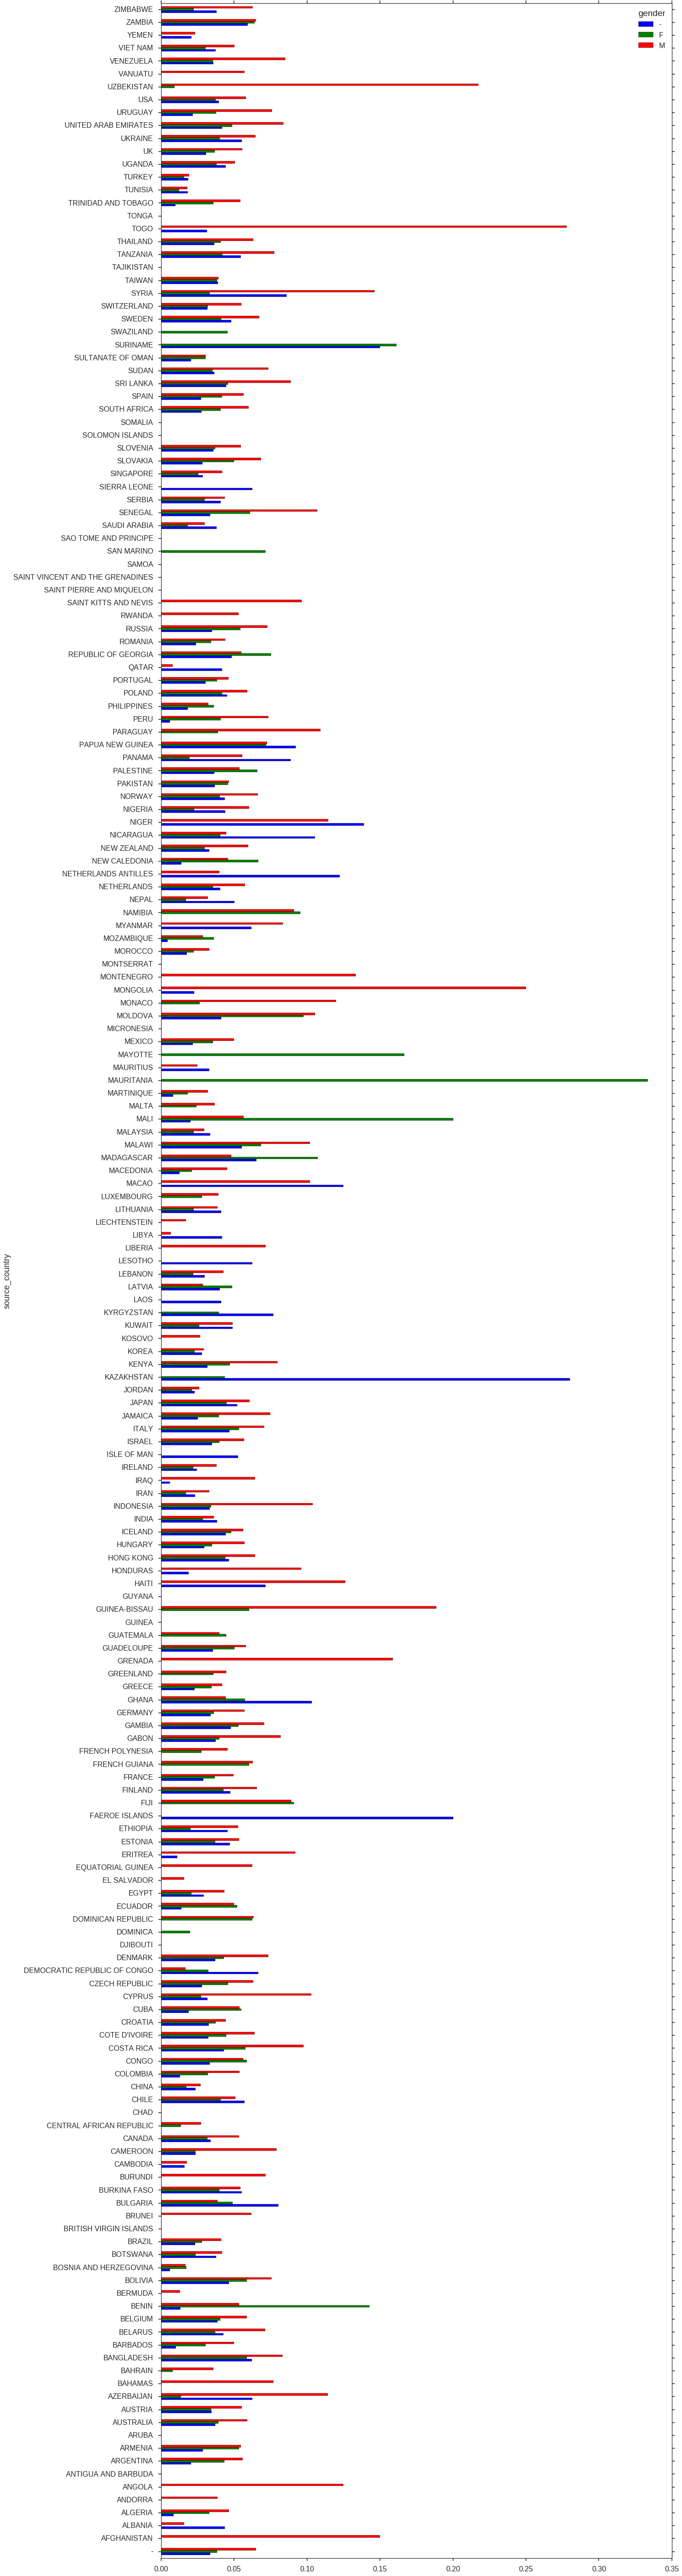

In [12]:
fig, ax = plt.subplots(figsize=(20,100))

t.plot(kind="barh", ax=ax)

In [13]:
t = df.pivot_table(columns="gender", index="eth1", values="is_self_cite", aggfunc=np.mean)
t*100

gender             -         F          M
eth1                                     
AFRICAN     3.327102  3.628753   4.465000
ARAB        3.068824  2.662455   3.956090
BALTIC      3.071672  3.299898   4.819097
CARIBBEAN   0.980392  1.842105  10.030030
CHINESE     3.597269  3.150663   3.936402
DUTCH       4.124788  3.605267   6.042766
ENGLISH     3.898337  3.932452   6.356646
FRENCH      3.355069  3.575720   5.288925
GERMAN      3.224926  3.666696   5.857746
GREEK       2.781076  3.222670   4.787014
HISPANIC    2.793293  3.622052   4.993805
HUNGARIAN   2.962130  3.687908   5.970330
INDIAN      4.026975  2.840438   3.955744
INDONESIAN  3.157895  2.687844   2.817623
ISRAELI     3.695497  3.847904   5.632203
ITALIAN     4.032243  4.766471   6.645103
JAPANESE    5.529328  4.368118   5.810325
KOREAN      3.055778  2.519214   3.094625
MONGOLIAN   1.481481       NaN   3.389831
NORDIC      5.099902  4.146778   6.884171
POLYNESIAN  0.000000       NaN   0.000000
ROMANIAN    2.161447  2.888415   4.364115
SLAV        3.792745  4.003661   5.911674
THAI        2.996901  3.233855   3.784770
TOOSHORT    0.000000       NaN        NaN
TURKISH     2.238569  1.909490   2.677832
UNKNOWN     2.637029  3.334267   5.234231
VIETNAMESE  3.568282  2.876220   3.738676

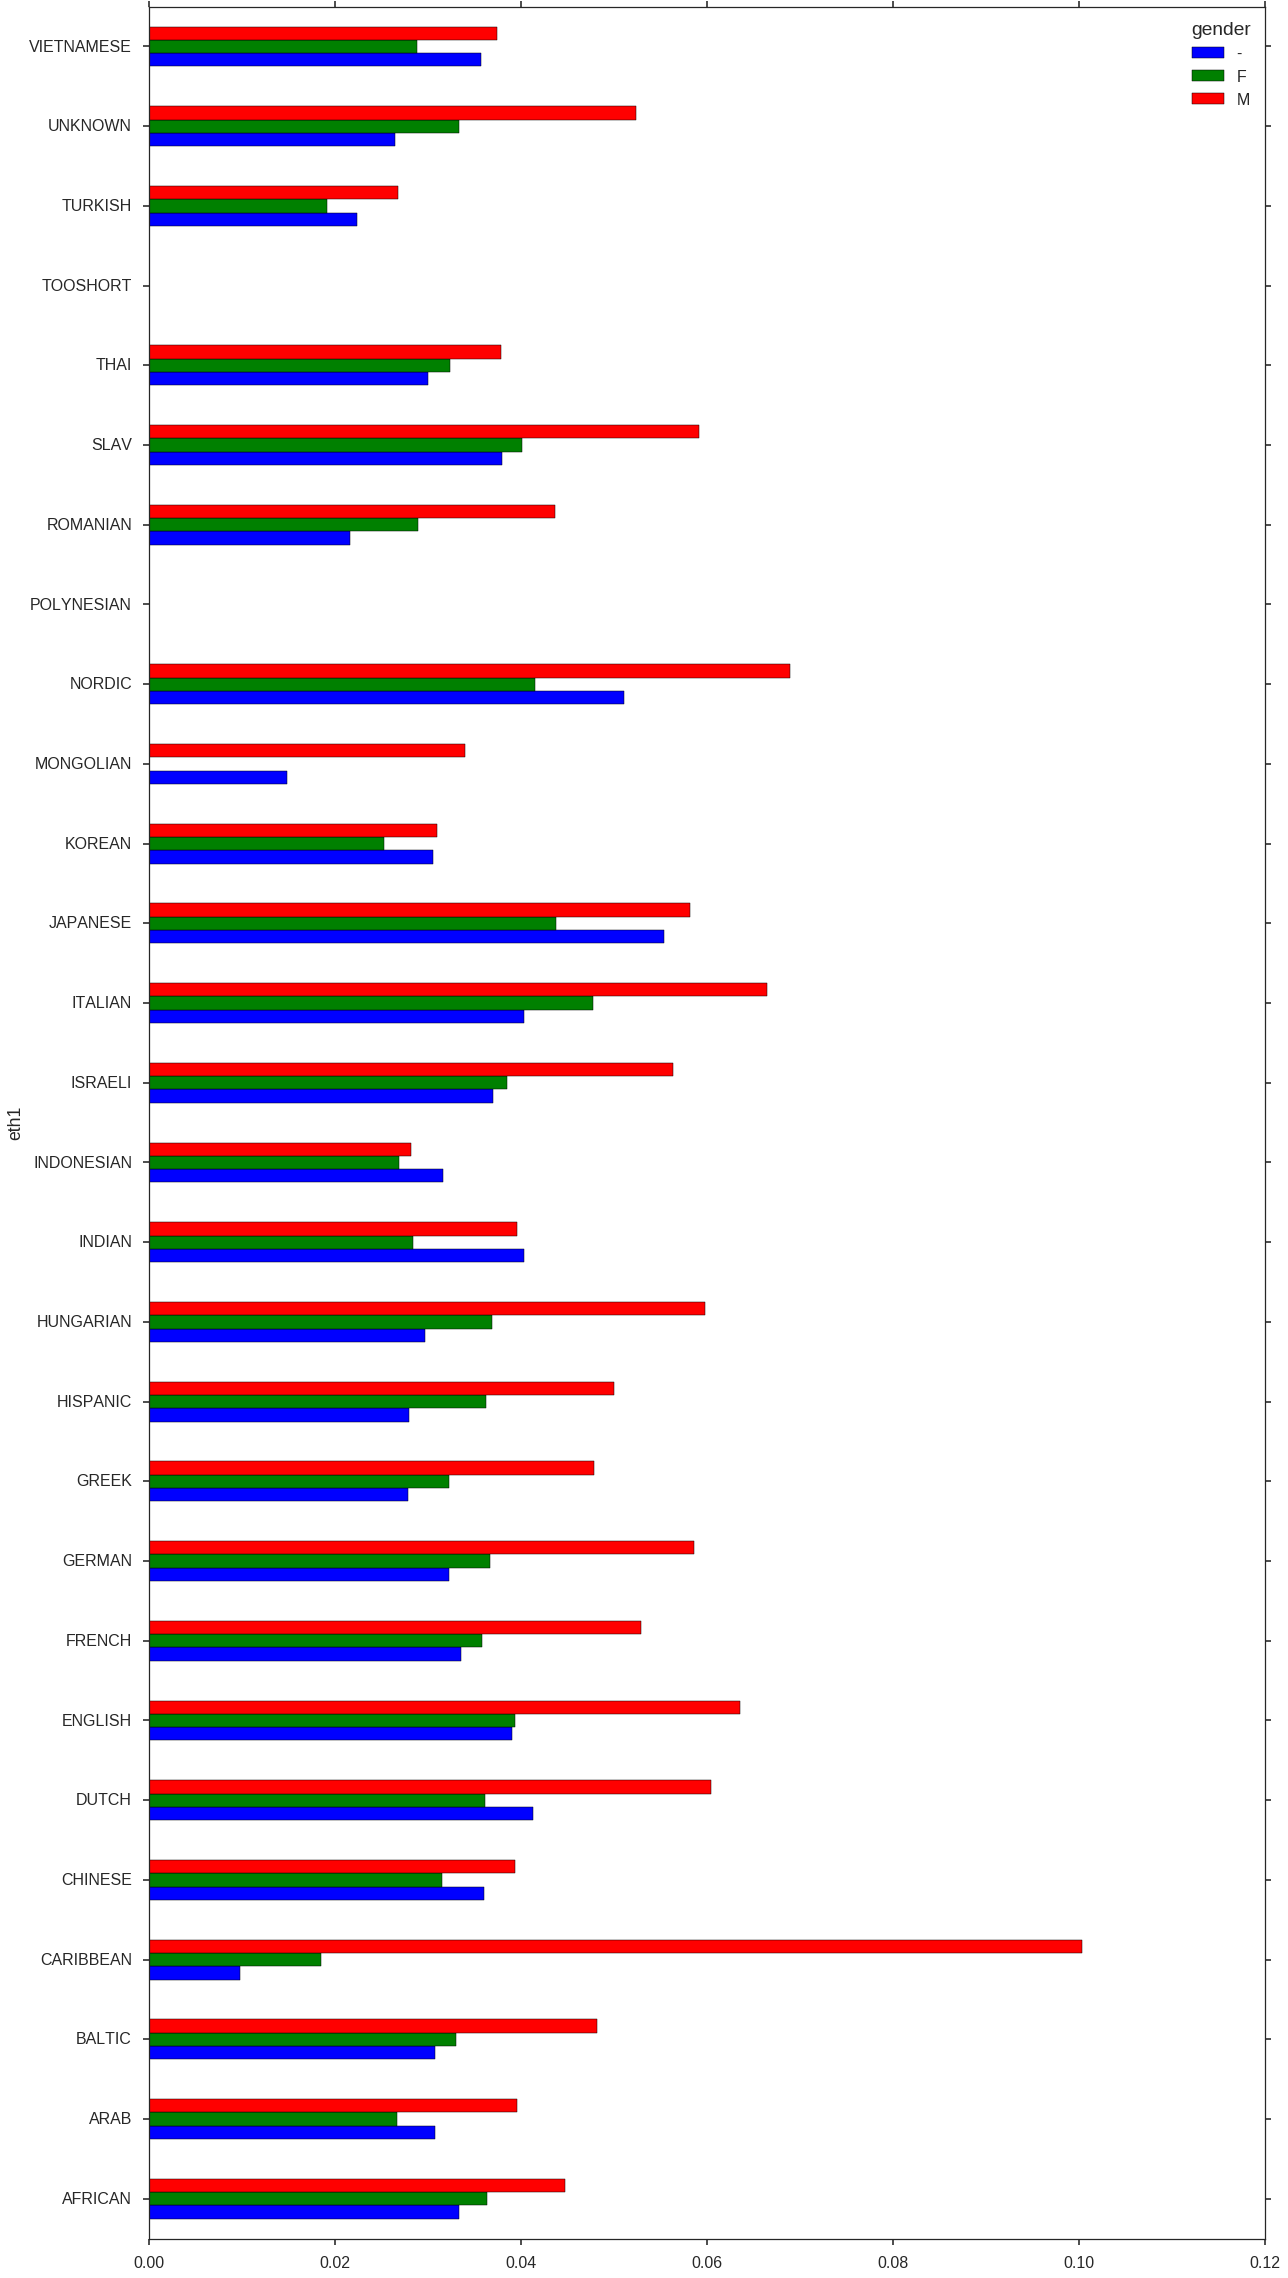

In [14]:
fig, ax = plt.subplots(figsize=(20,40))

t.plot(kind="barh", ax=ax)

In [26]:
t = df.pivot_table(columns="gender", index=pd.cut(df.auth_prev_papers, bins=range(-1,10) + range(10,100,10)
                                                 + range(100,1900, 200)), values="is_self_cite", aggfunc=np.mean)
t*100

gender                    -          F          M
auth_prev_papers                                 
(-1, 0]            0.297599   0.277248   0.357815
(0, 1]             1.632115   1.391720   1.586225
(1, 2]             2.399190   2.131060   2.383106
(2, 3]             2.948048   2.661516   2.938326
(3, 4]             3.419306   3.043477   3.262029
(4, 5]             3.739014   3.332339   3.619445
(5, 6]             3.992413   3.531637   3.789725
(6, 7]             4.298259   3.773699   4.054565
(7, 8]             4.448396   4.079693   4.286974
(8, 9]             4.671726   4.187607   4.552485
(9, 10]            4.983369   4.324612   4.786734
(10, 20]           5.660444   5.232136   5.584874
(20, 30]           6.959650   6.807212   7.105011
(30, 40]           8.296484   8.176366   8.074857
(40, 50]           9.208412   9.042021   8.983113
(50, 60]           9.764235   9.566412   9.763587
(60, 70]          10.739835  10.251205  10.686880
(70, 80]          10.551370  11.067768  11.434306
(80, 90]          11.900610  11.843183  11.828045
(90, 100]         12.361413  12.345679  11.965345
(100, 300]        14.310259  13.984284  14.059563
(300, 500]        18.955043  19.423868  18.331226
(500, 700]        34.498343  17.407407  21.954488
(700, 900]        55.586207  19.642857  23.816919
(900, 1100]             NaN        NaN  15.241018
(1100, 1300]            NaN  10.000000  23.292868
(1300, 1500]            NaN        NaN  50.000000
(1500, 1700]            NaN        NaN  28.645833

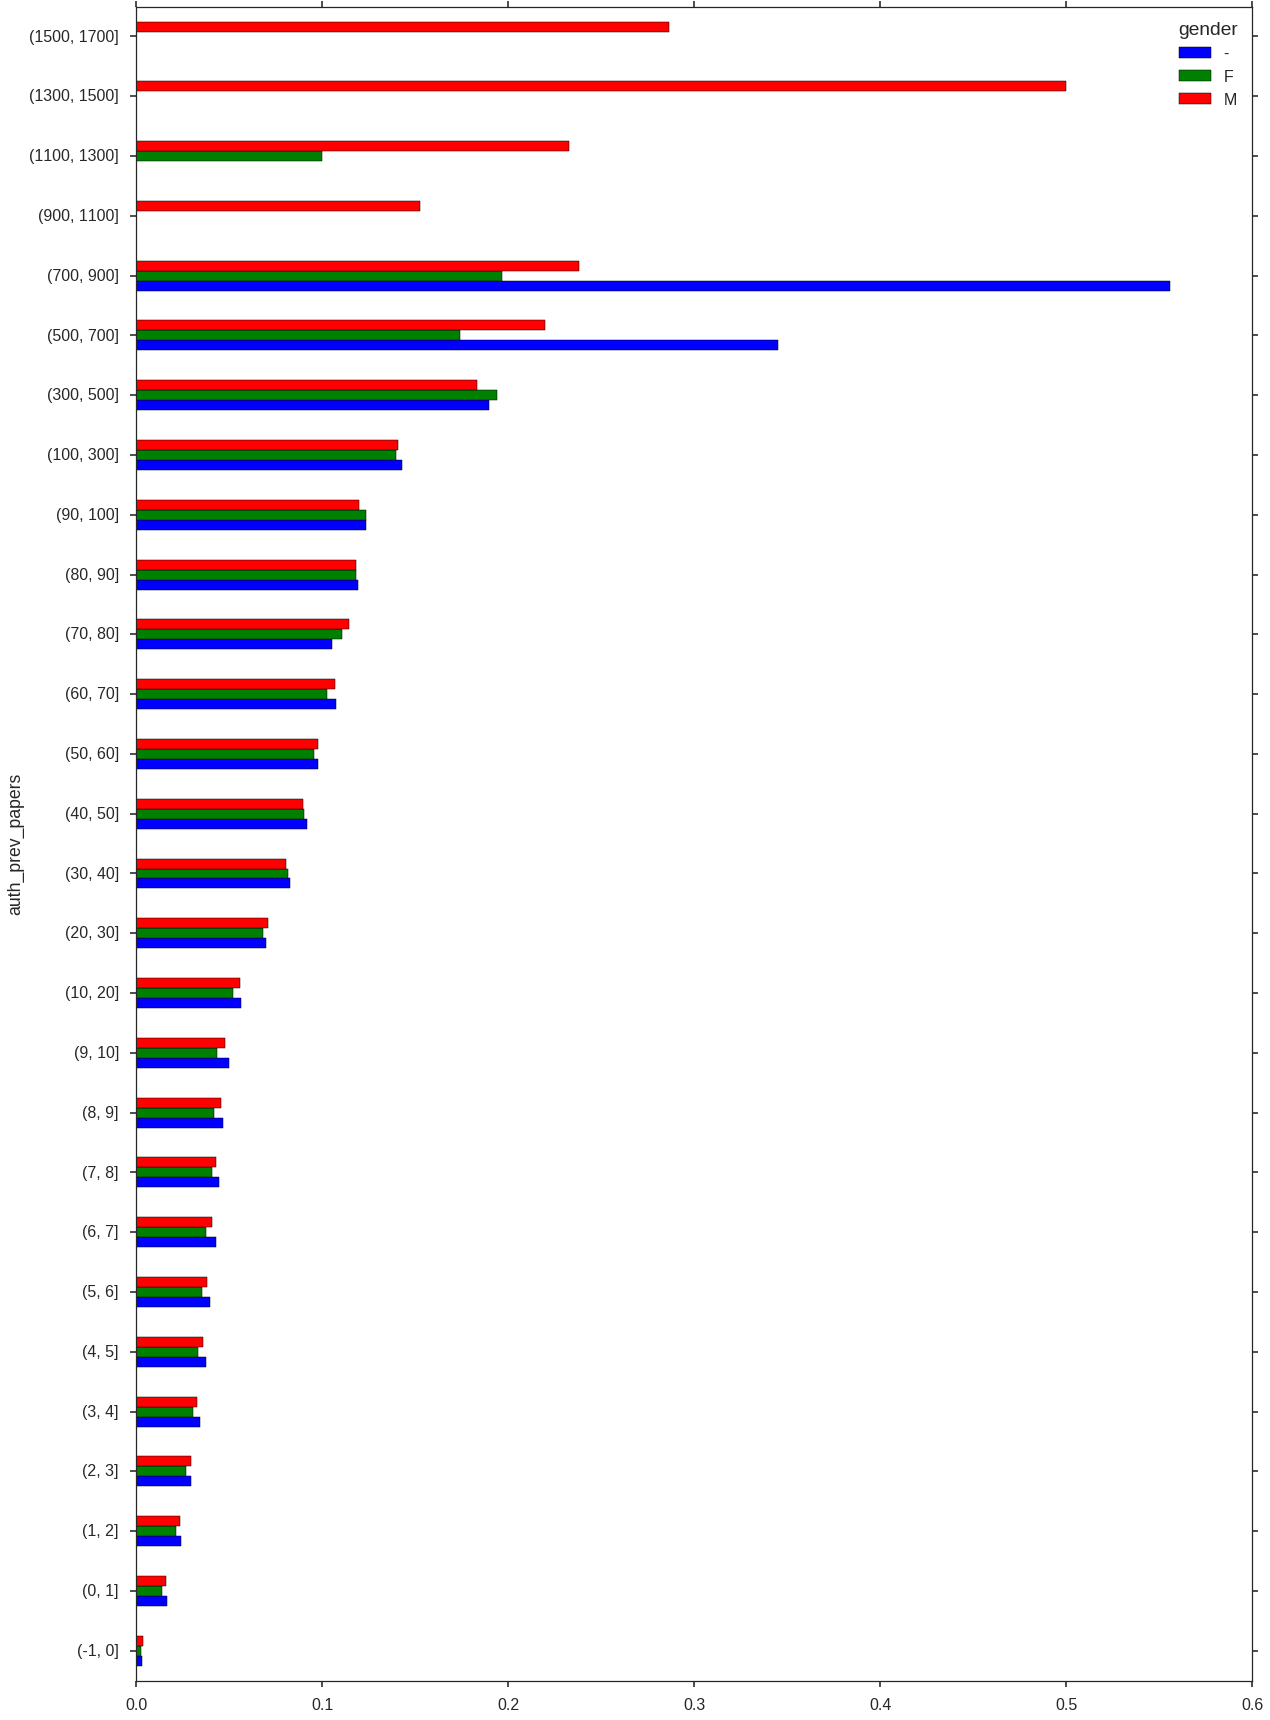

In [27]:
fig, ax = plt.subplots(figsize=(20,30))
t.plot(kind="barh", ax=ax)

In [28]:
t = df.pivot_table(columns="gender", index=pd.cut(df.source_n_authors, bins=range(0,10) + range(10,100,10)
                                                 + range(100,2000, 900)), values="is_self_cite", aggfunc=np.mean)
t*100

gender                    -         F         M
source_n_authors                               
(0, 1]                  NaN       NaN       NaN
(1, 2]             4.184035  3.851687  6.244973
(2, 3]             3.643234  3.641042  5.788413
(3, 4]             3.583883  3.719416  5.554515
(4, 5]             3.559980  3.690729  5.429693
(5, 6]             3.479355  3.724935  5.295630
(6, 7]             3.515162  3.795524  5.346249
(7, 8]             3.554361  3.896957  5.379715
(8, 9]             3.655651  3.936331  5.536755
(9, 10]            3.932483  3.926506  5.612897
(10, 20]           4.137996  4.244239  6.159389
(20, 30]           5.135350  4.273828  7.172842
(30, 40]           6.441394  3.879126  7.954545
(40, 50]          10.172745  7.118872  6.373117
(50, 60]           7.103825  9.154930  4.845815
(60, 70]          18.750000  2.666667  8.317930
(70, 80]           9.558824  5.555556  5.940594
(80, 90]          50.000000  3.278689  8.832808
(90, 100]          0.826446  1.834862  4.419890
(100, 1000]       24.110672  8.048780  7.237937
(1000, 1900]            NaN       NaN       NaN

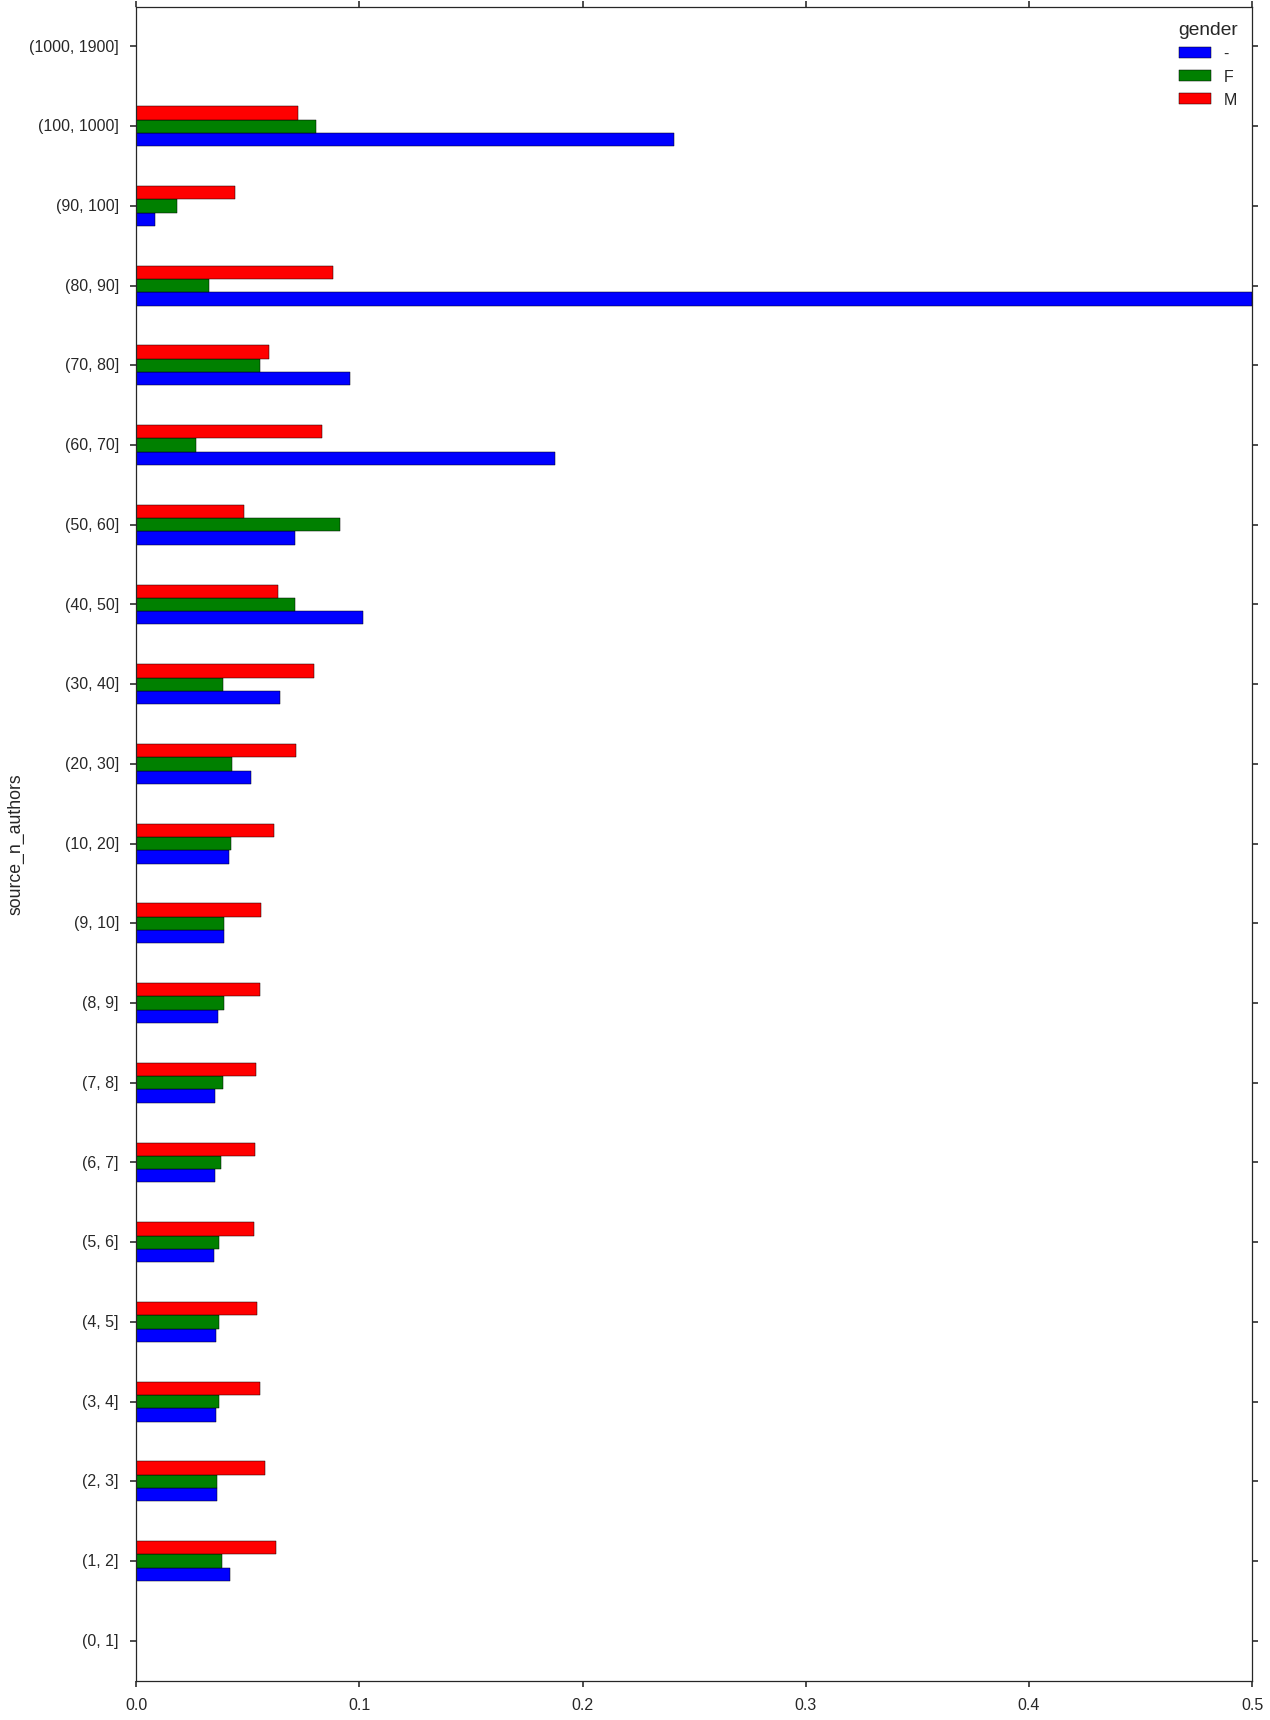

In [29]:
fig, ax = plt.subplots(figsize=(20,30))
t.plot(kind="barh", ax=ax)

In [30]:
t = df.pivot_table(columns="gender", index=df.journal_same, values="is_self_cite", aggfunc=np.mean)
t*100

gender               -         F          M
journal_same                               
0             3.156978  3.337125   5.097438
1             9.810239  9.201570  12.691000

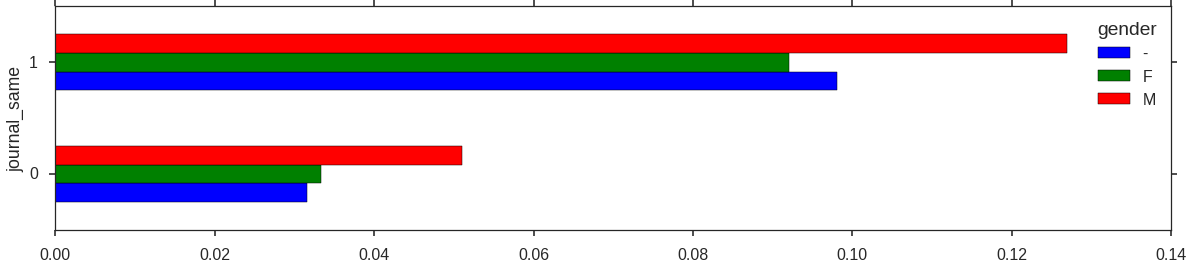

In [31]:
fig, ax = plt.subplots(figsize=(20,4))
t.plot(kind="barh", ax=ax)

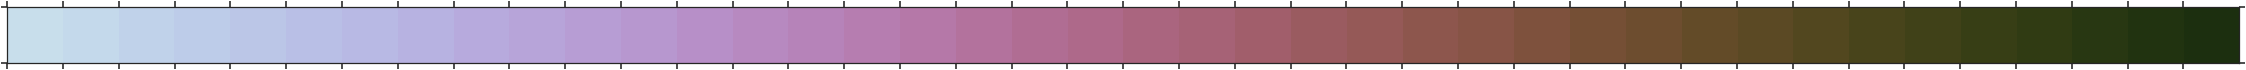

In [56]:
sns.palplot(sns.cubehelix_palette(40, start=2.2, rot=-1))

In [36]:
t = df.pivot_table(columns="eth1", index=pd.cut(df.auth_prev_papers, bins=range(-1,10) + range(10,100,10)
                                                 + range(100,1900, 200)), values="is_self_cite", aggfunc=np.mean)
t*100

eth1                AFRICAN       ARAB     BALTIC  CARIBBEAN    CHINESE  \
auth_prev_papers                                                          
(-1, 0]            0.291884   0.248834   0.331920   0.680272   0.343635   
(0, 1]             1.586545   1.354227   1.395104   1.315789   1.589207   
(1, 2]             2.471136   1.858033   2.510316   2.439024   2.397373   
(2, 3]             3.167853   2.495534   2.721088   4.687500   2.927269   
(3, 4]             3.662924   2.639033   4.159544   2.909091   3.419315   
(4, 5]             3.580010   3.233334   3.943045   1.111111   3.850734   
(5, 6]             3.825980   3.355326   6.241787   2.564103   4.175265   
(6, 7]             4.239447   3.498431   6.079027   4.568528   4.251828   
(7, 8]             3.595707   3.390587   4.637681   2.127660   4.616497   
(8, 9]             4.652544   3.753585   3.257790   0.000000   4.786789   
(9, 10]            5.831799   4.266585   8.382066   8.108108   5.058308   
(10, 20]           5.880365   4.822865   6.772607   4.945055   6.064131   
(20, 30]           6.828842   6.672332   8.784773   6.358382   7.437914   
(30, 40]           6.764326   7.724176   8.837209  20.000000   8.396545   
(40, 50]           7.242448   9.338043  16.118421  11.111111   9.136278   
(50, 60]           8.997331   9.232183  12.844037        NaN   9.305226   
(60, 70]           9.292228  10.503903  17.254902        NaN  10.554739   
(70, 80]           8.913468  10.275872  24.607330  13.114754  12.069401   
(80, 90]          12.839060  11.668036        NaN  11.864407  10.761292   
(90, 100]         16.452442  12.618785   8.000000  14.925373  10.908019   
(100, 300]        13.771760  13.890900   5.000000  23.783784  12.979135   
(300, 500]        16.000000  19.787303        NaN  25.949367  16.308649   
(500, 700]              NaN   9.933775        NaN        NaN   0.000000   
(700, 900]              NaN  11.111111        NaN        NaN  51.388889   
(900, 1100]             NaN  60.000000        NaN        NaN        NaN   
(1100, 1300]            NaN        NaN        NaN        NaN        NaN   
(1300, 1500]            NaN        NaN        NaN        NaN        NaN   
(1500, 1700]            NaN        NaN        NaN        NaN        NaN   

eth1                  DUTCH    ENGLISH     FRENCH     GERMAN      GREEK  \
auth_prev_papers                                                          
(-1, 0]            0.380459   0.293612   0.323059   0.290527   0.311209   
(0, 1]             1.556724   1.393295   1.601587   1.556477   1.339669   
(1, 2]             2.501025   2.138593   2.324074   2.368475   2.114033   
(2, 3]             3.061945   2.657129   2.858910   2.870655   2.672781   
(3, 4]             3.751029   3.027395   3.160178   3.189996   2.757809   
(4, 5]             3.972943   3.342662   3.338012   3.520343   2.907122   
(5, 6]             4.105211   3.518762   3.566331   3.687841   2.790269   
(6, 7]             4.535647   3.933605   3.515259   4.132487   3.174903   
(7, 8]             5.122408   4.144795   3.781295   4.284595   3.714859   
(8, 9]             4.838800   4.515932   4.098802   4.272170   3.562262   
(9, 10]            5.060788   4.657260   4.057208   4.817455   4.054054   
(10, 20]           5.745331   5.638368   4.860637   5.561655   4.591610   
(20, 30]           7.647984   7.434968   6.051437   7.068721   5.697275   
(30, 40]           8.711457   8.665335   7.036513   7.979051   6.702369   
(40, 50]           9.394984   9.902451   7.461333   9.121350   7.138741   
(50, 60]          10.682405  10.557550   7.861562   9.796562   9.501928   
(60, 70]          11.403987  11.701917   8.843500  10.744413   8.833223   
(70, 80]          12.036705  12.594134   9.392813  11.341181   9.199560   
(80, 90]          11.725979  12.917306   9.368959  11.834450   9.766355   
(90, 100]         12.289282  13.321637  10.910545  12.026049  11.156123   
(100, 300]        14.420562  14.995477  12.814338  13.831017  14.301443   
(300, 500]        16.439

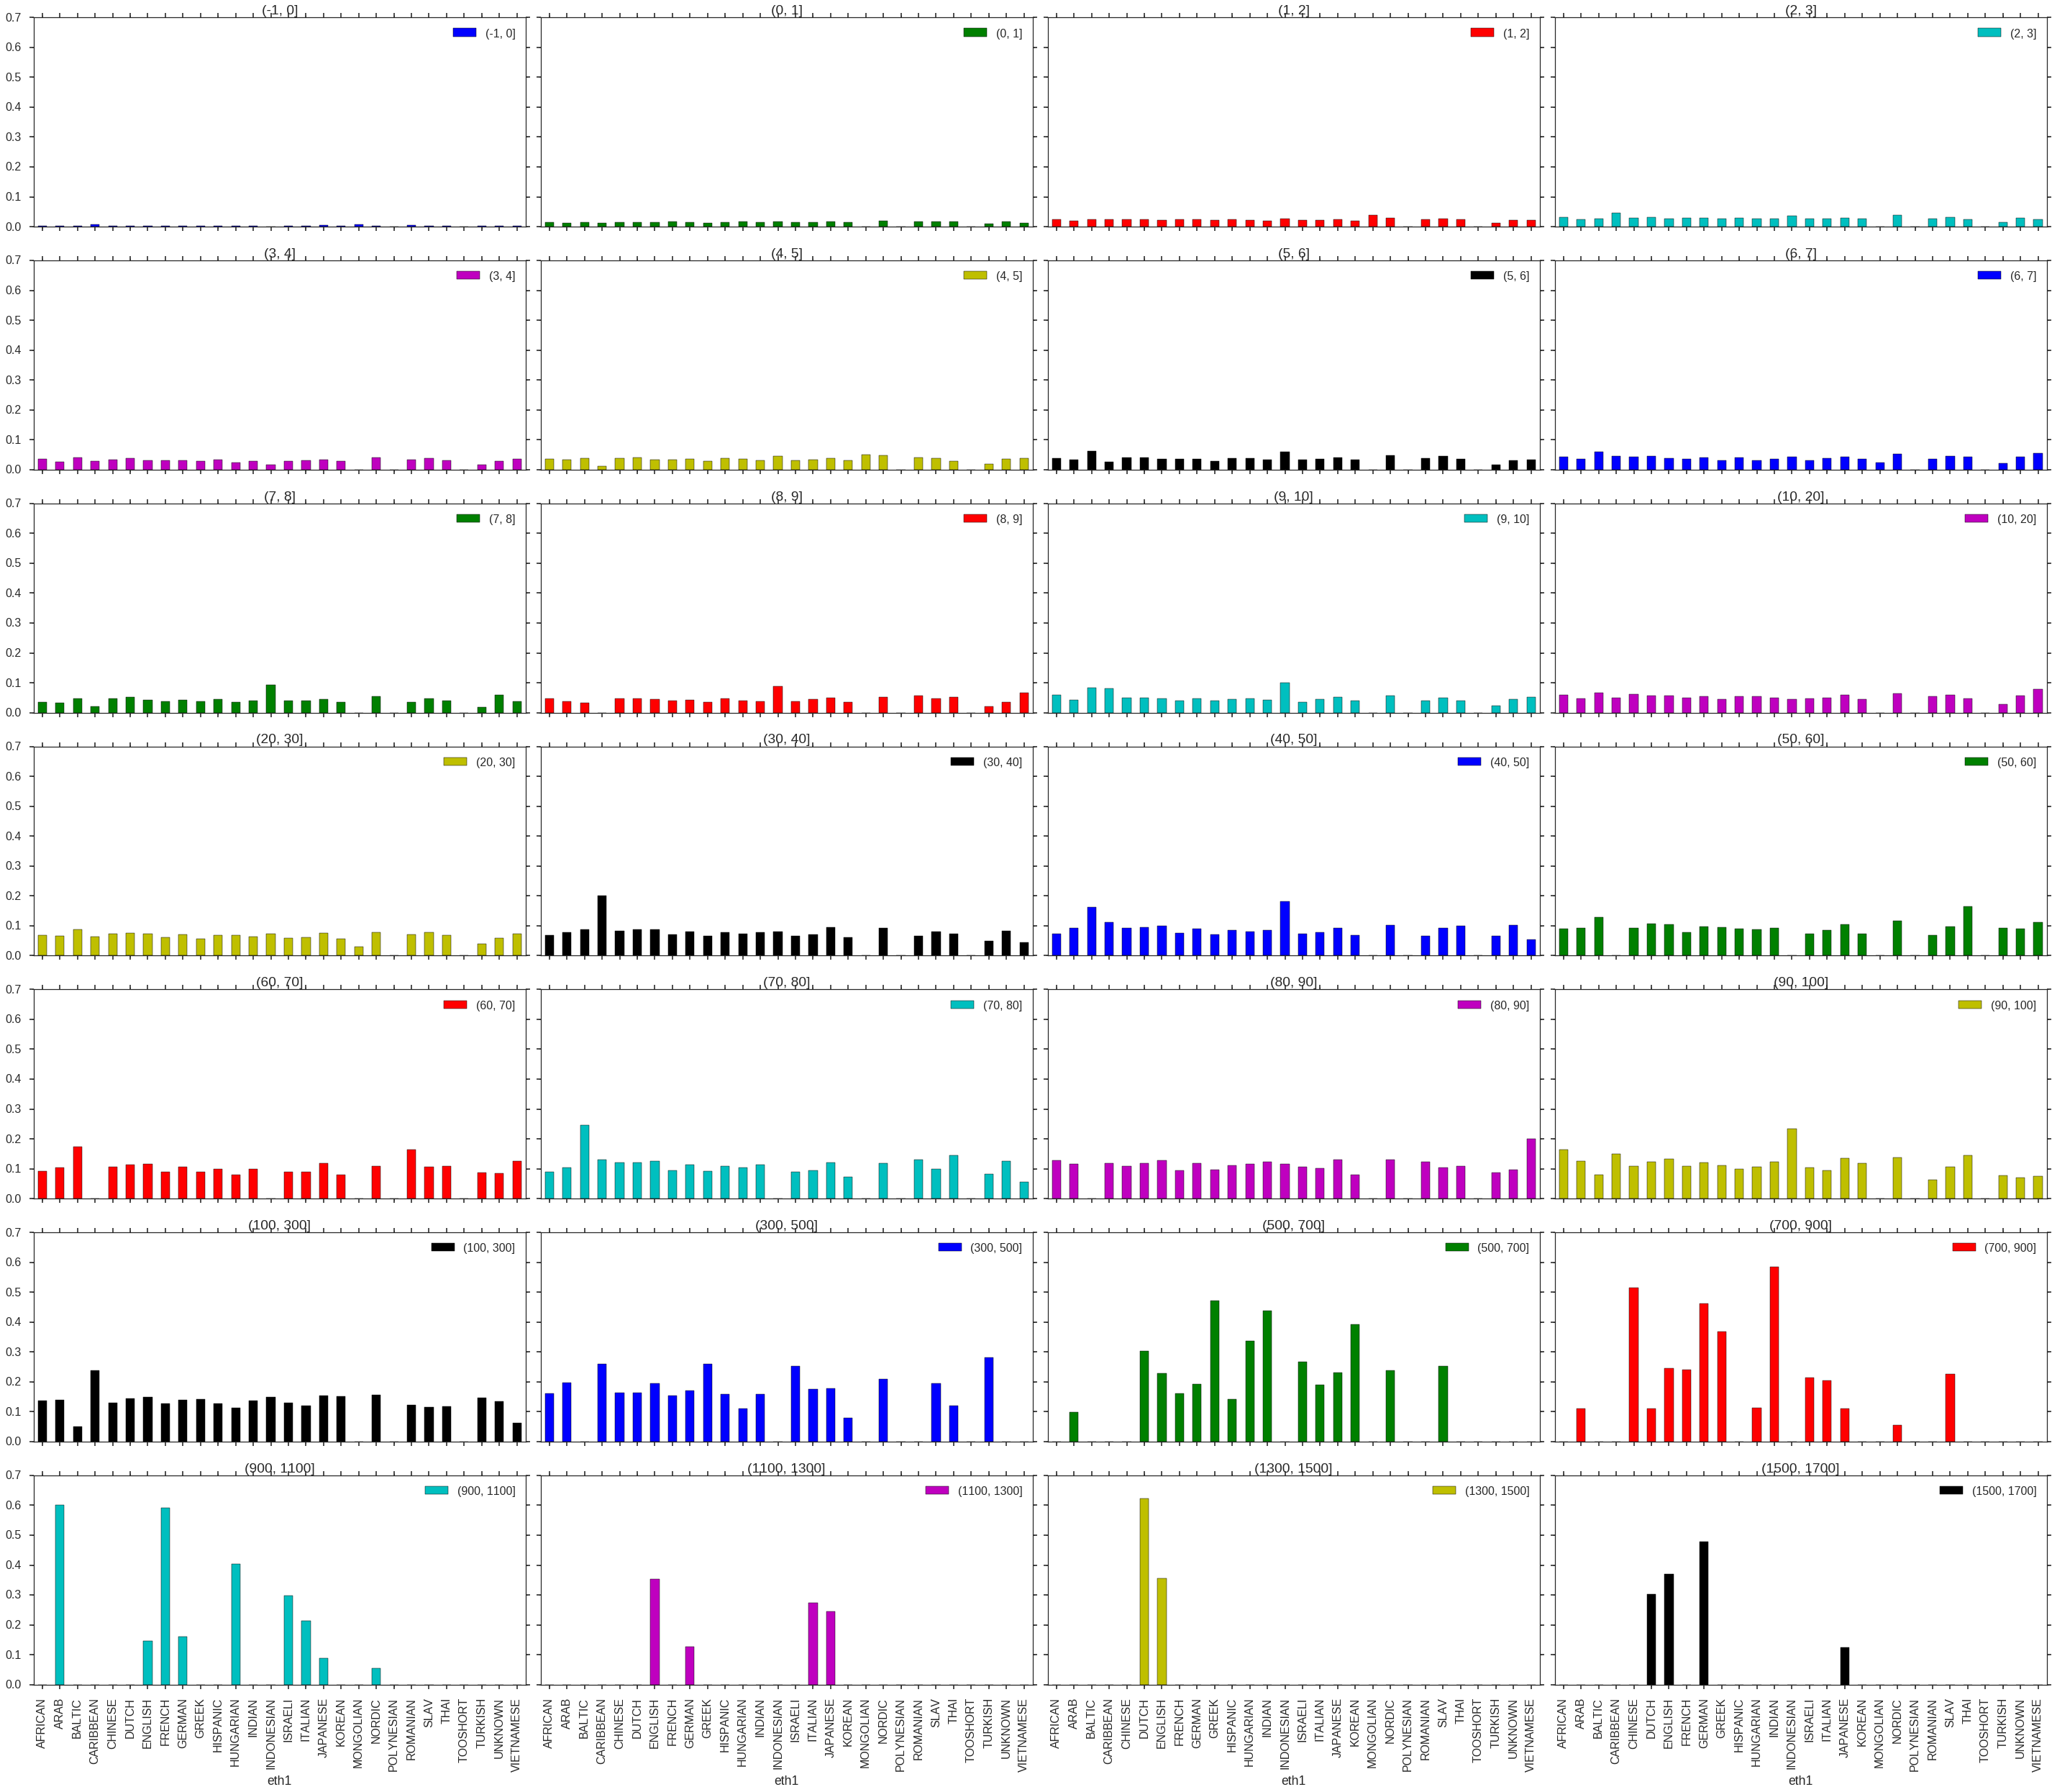

In [64]:
fig, ax = plt.subplots(t.shape[0]/4,4, sharex=True, sharey=True, figsize=(40,35))
ax = t.T.plot(kind="bar", subplots=True,
              ax=ax, alpha=1)
"""
for container in ax.containers:
    plt.setp(container, height=0.1)

y0, y1 = ax.get_ylim()
ax.set_ylim(y0 -0.5, y1 + 0.25)"""
plt.tight_layout()

In [60]:
ax.shape

(5, 5)

In [65]:
t = df.pivot_table(columns="gender", index=pd.cut(df.mesh_sim, bins=np.arange(-0.01,1.01,0.01)), values="is_self_cite", aggfunc=np.mean)
t*100

gender                -           F          M
mesh_sim                                      
(-0.01, 0]     3.397422    2.275785   4.717867
(0, 0.01]           NaN         NaN        NaN
(0.01, 0.02]   0.615764    1.095890   1.036014
(0.02, 0.03]   0.983375    0.886855   1.621141
(0.03, 0.04]   1.122380    1.167370   2.207220
(0.04, 0.05]   1.370675    1.436850   2.699927
(0.05, 0.06]   1.637681    1.585897   3.047682
(0.06, 0.07]   1.682370    1.640500   3.052364
(0.07, 0.08]   1.860163    1.865003   3.321919
(0.08, 0.09]   1.970874    1.998420   3.547811
(0.09, 0.1]    2.163660    2.211585   3.877330
(0.1, 0.11]    2.225581    2.373273   3.989687
(0.11, 0.12]   2.488632    2.611999   4.376330
(0.12, 0.13]   2.774162    2.789031   4.557371
(0.13, 0.14]   2.835908    2.938638   4.808553
(0.14, 0.15]   3.006052    3.181246   5.202668
(0.15, 0.16]   3.385892    3.393275   5.424856
(0.16, 0.17]   3.592146    3.682733   5.711427
(0.17, 0.18]   3.813908    3.962754   5.914748
(0.18, 0.19]   3.980999    4.071797   6.173341
(0.19, 0.2]    4.102142    4.292947   6.301343
(0.2, 0.21]    4.477499    4.480585   6.678694
(0.21, 0.22]   4.727511    4.765628   6.959376
(0.22, 0.23]   5.030133    5.090579   7.234643
(0.23, 0.24]   5.221965    5.271753   7.448029
(0.24, 0.25]   5.705195    5.629990   7.931314
(0.25, 0.26]   6.837782    6.842773   8.865995
(0.26, 0.27]   5.888958    5.954622   8.132886
(0.27, 0.28]   6.285418    6.220535   8.431250
(0.28, 0.29]   6.626723    6.681469   8.739695
...                 ...         ...        ...
(0.7, 0.71]   19.685039   27.160494  22.460658
(0.71, 0.72]  12.971698   18.617021  18.281037
(0.72, 0.73]  19.413919   25.242718  22.627119
(0.73, 0.74]  24.390244   28.252788  22.738095
(0.74, 0.75]  20.000000   18.313570  21.766562
(0.75, 0.76]  80.000000  100.000000  50.000000
(0.76, 0.77]  23.972603   27.358491  27.462687
(0.77, 0.78]  15.079365   27.853881  23.203593
(0.78, 0.79]  24.691358   29.197080  29.411765
(0.79, 0.8]   19.576720   25.401929  23.174294
(0.8, 0.81]   75.000000   80.000000  35.000000
(0.81, 0.82]  25.675676   27.007299  27.840909
(0.82, 0.83]  44.444444   25.000000  42.253521
(0.83, 0.84]  17.187500   21.004566  21.357616
(0.84, 0.85]  28.571429   36.956522  36.538462
(0.85, 0.86]  15.277778   27.343750  22.531646
(0.86, 0.87]  12.500000   69.230769  43.548387
(0.87, 0.88]  28.888889   22.388060  31.279621
(0.88, 0.89]  46.666667   39.682540  33.734940
(0.89, 0.9]   37.142857   40.540541  30.275229
(0.9, 0.91]   20.000000   37.037037  36.000000
(0.91, 0.92]  50.000000   16.666667  47.058824
(0.92, 0.93]  44.444444   54.166667  42.307692
(0.93, 0.94]  60.000000   75.000000  57.142857
(0.94, 0.95]  60.000000    0.000000  42.105263
(0.95, 0.96]  50.000000   50.000000  25.000000
(0.96, 0.97]        NaN         NaN        NaN
(0.97, 0.98]        NaN         NaN        NaN
(0.98, 0.99]        NaN         NaN        NaN
(0.99, 1]     93.170103   94.712644  93.409611

[101 rows x 3 columns]

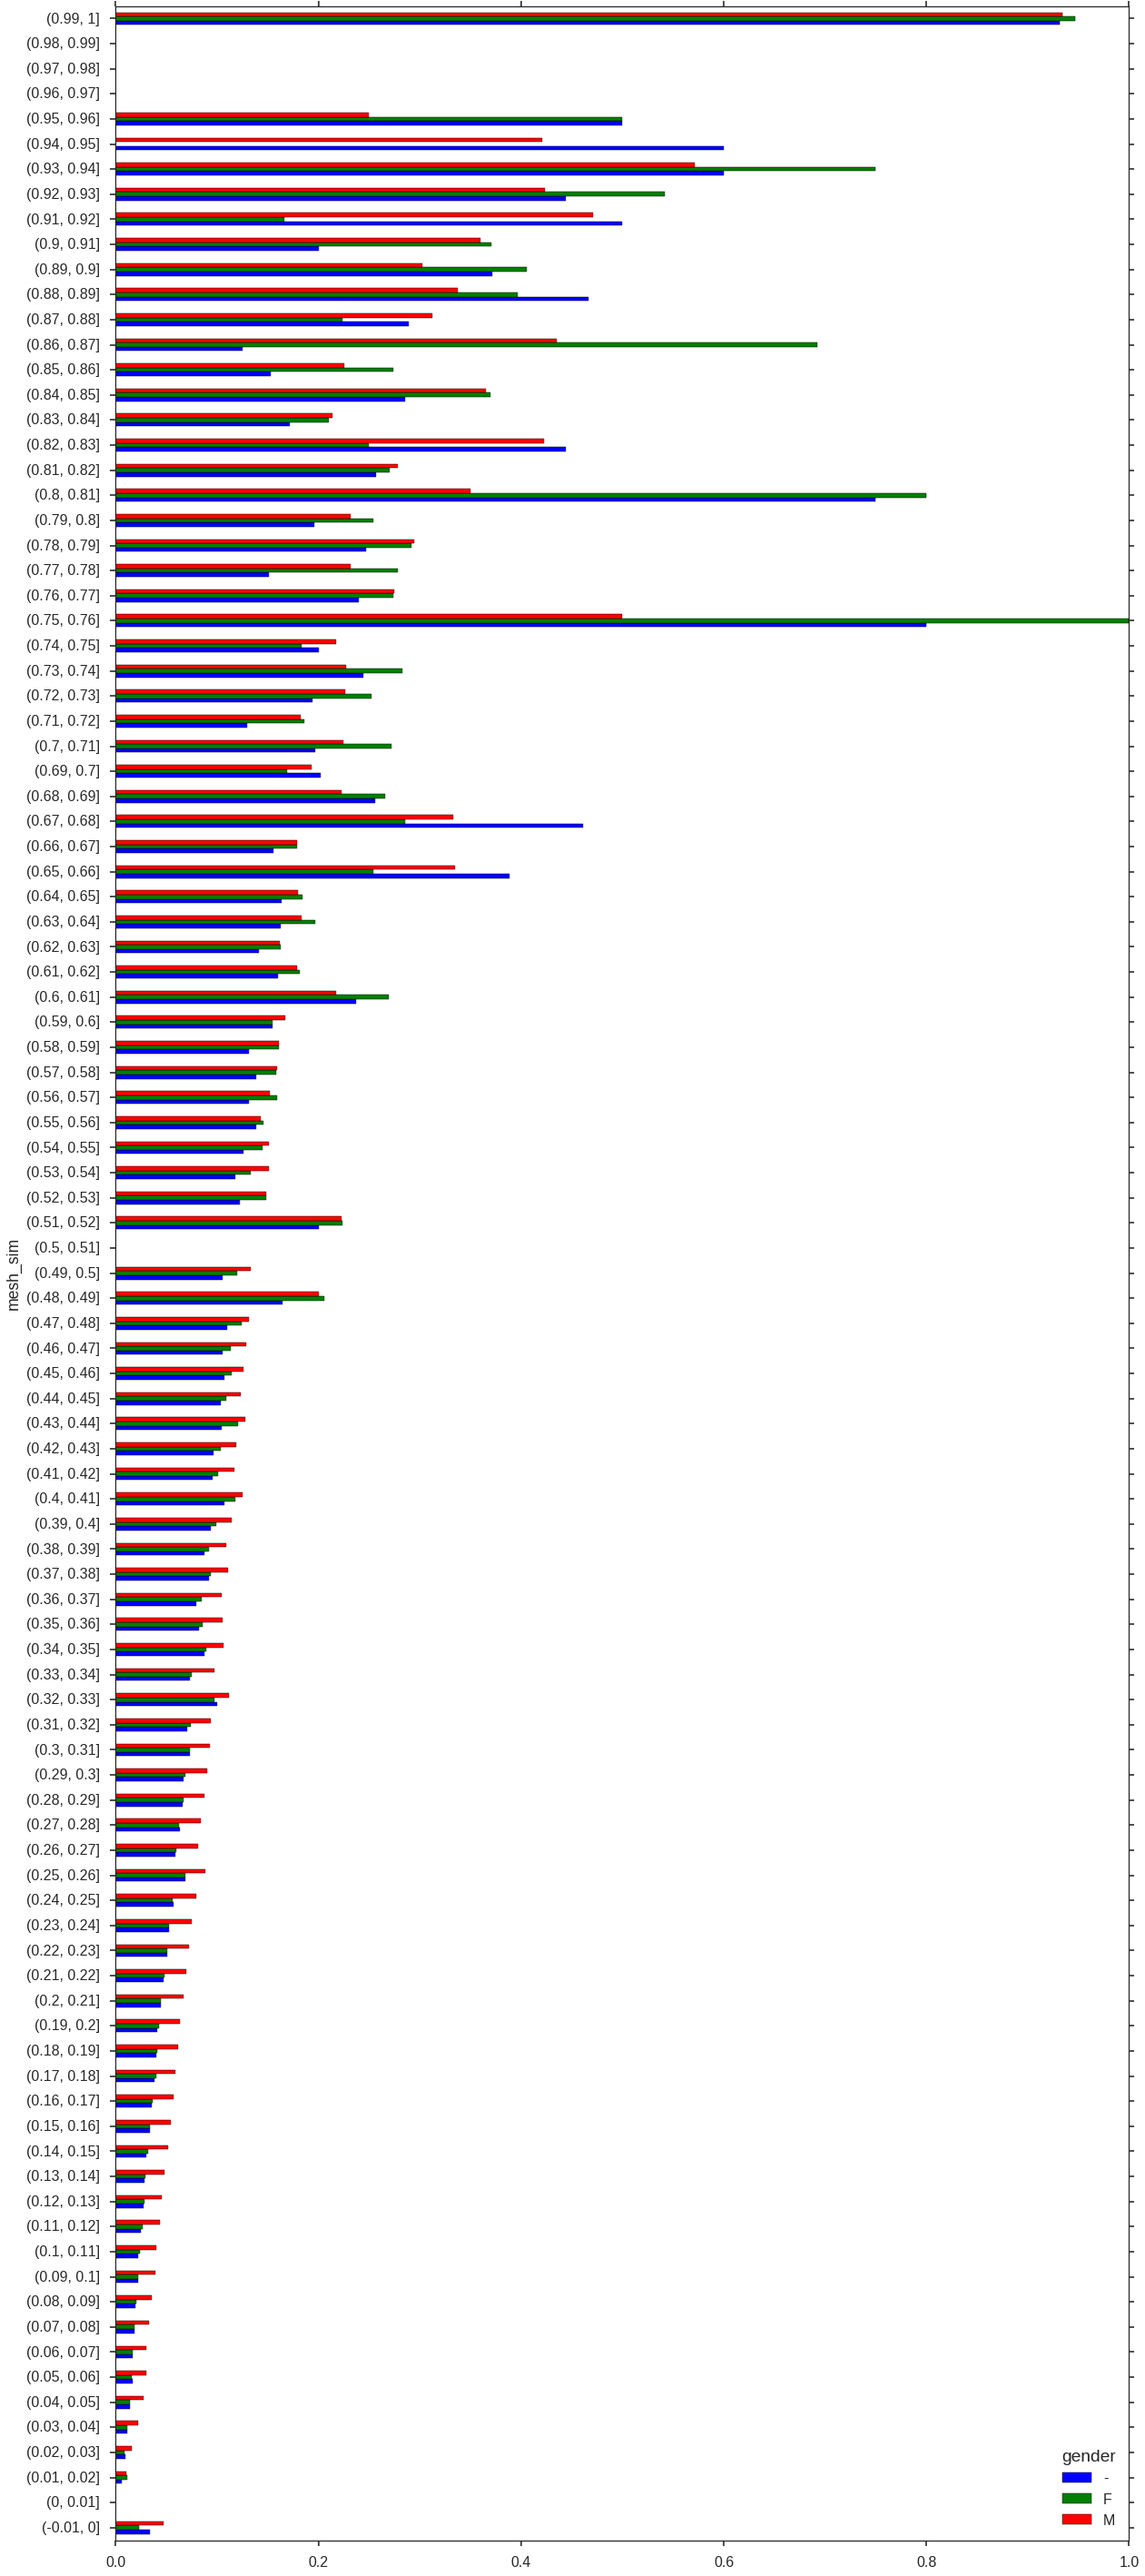

In [66]:
fig, ax = plt.subplots(figsize=(20,50))
t.plot(kind="barh", ax=ax)

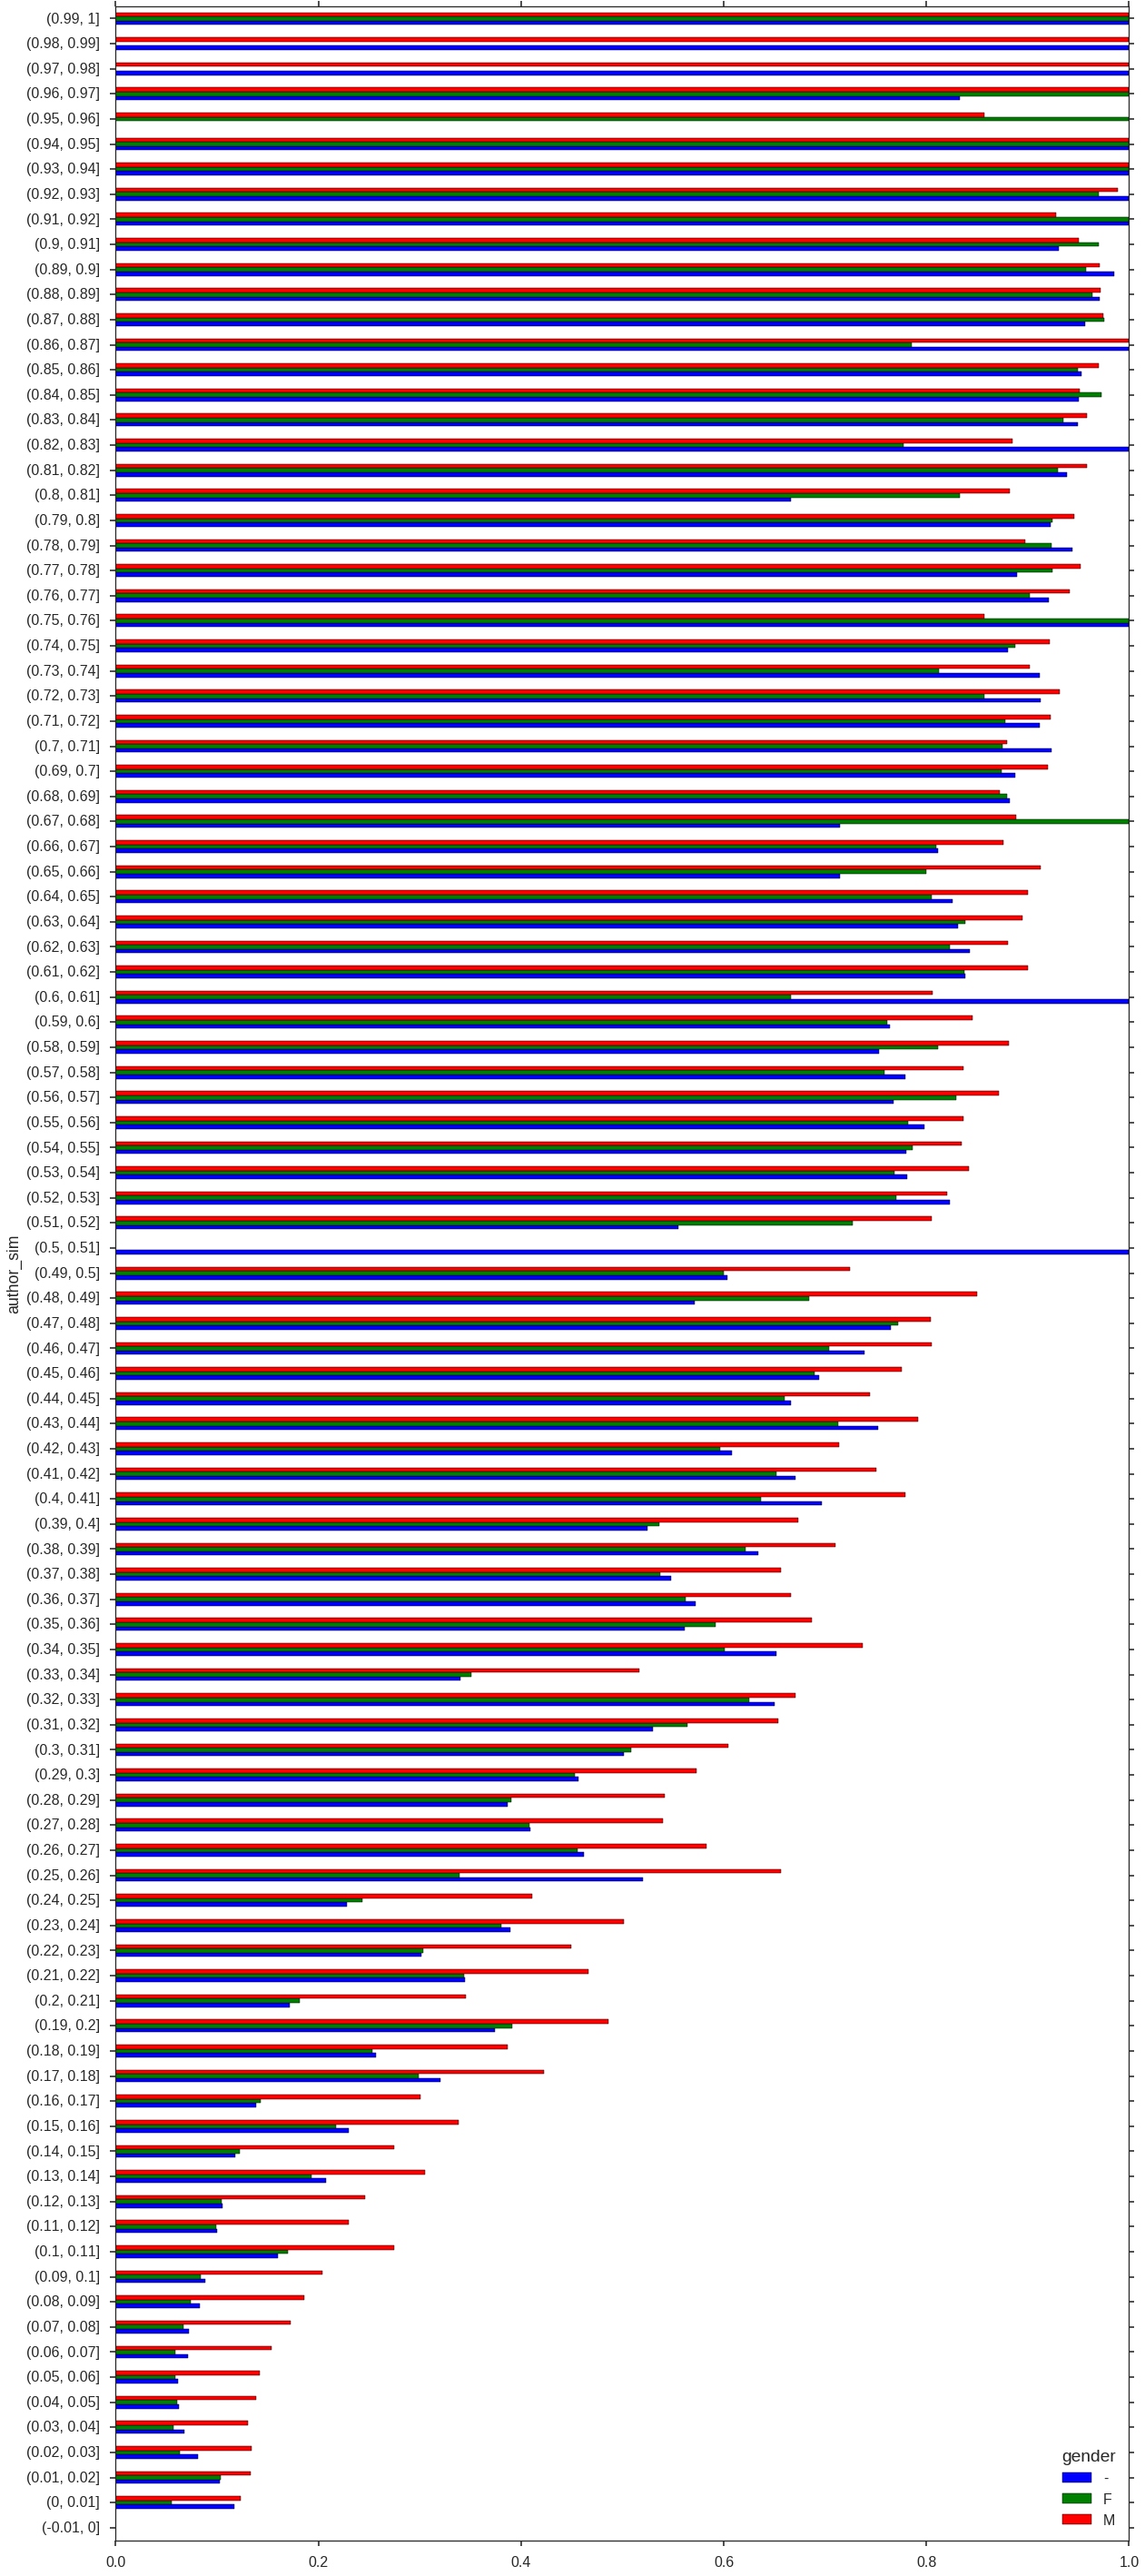

In [67]:
t = df.pivot_table(columns="gender", index=pd.cut(df.author_sim, bins=np.arange(-0.01,1.01,0.01)), values="is_self_cite", aggfunc=np.mean)
t*100
fig, ax = plt.subplots(figsize=(20,50))
t.plot(kind="barh", ax=ax)

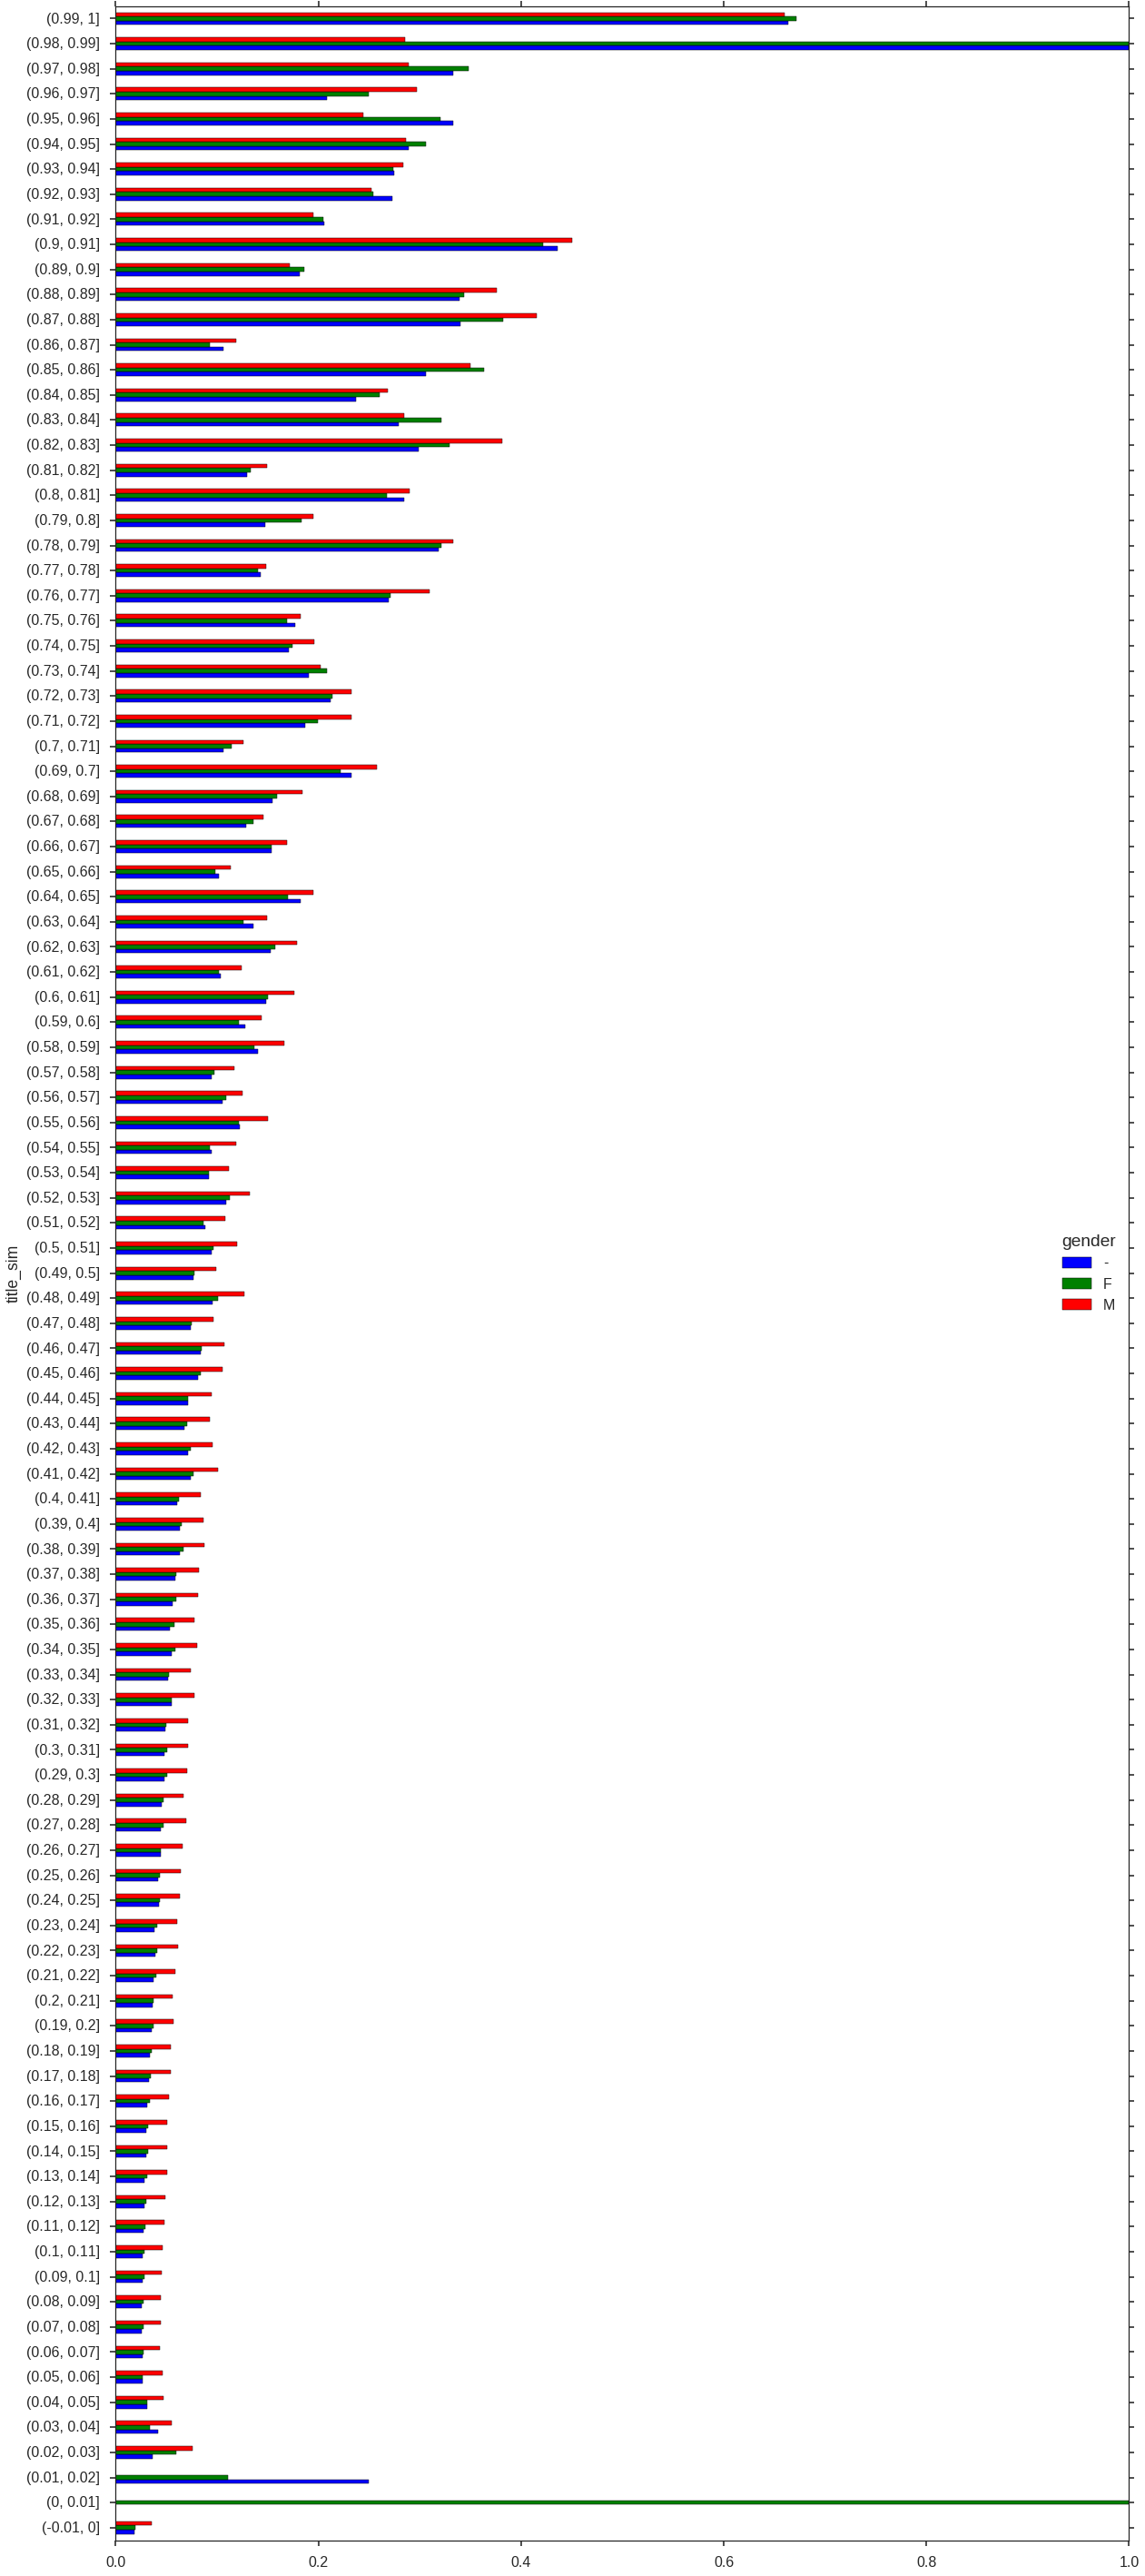

In [68]:
t = df.pivot_table(columns="gender", index=pd.cut(df.title_sim, bins=np.arange(-0.01,1.01,0.01)), values="is_self_cite", aggfunc=np.mean)
t*100
fig, ax = plt.subplots(figsize=(20,50))
t.plot(kind="barh", ax=ax)

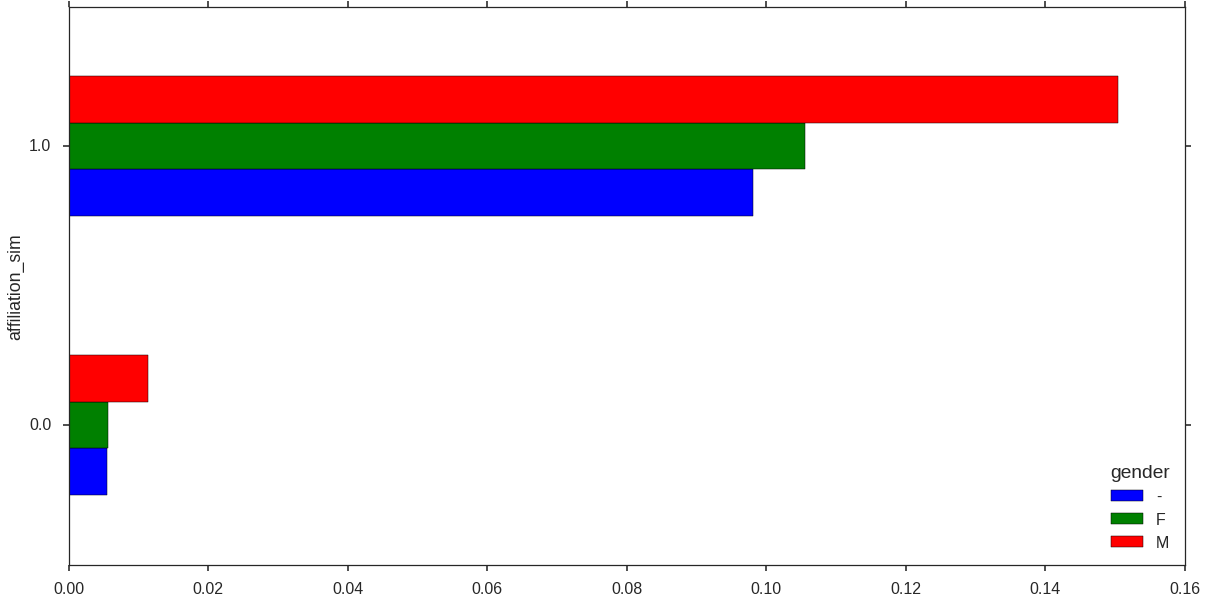

In [69]:
t = df.pivot_table(columns="gender", index=df.affiliation_sim, values="is_self_cite", aggfunc=np.mean)
t*100
fig, ax = plt.subplots(figsize=(20,10))
t.plot(kind="barh", ax=ax)

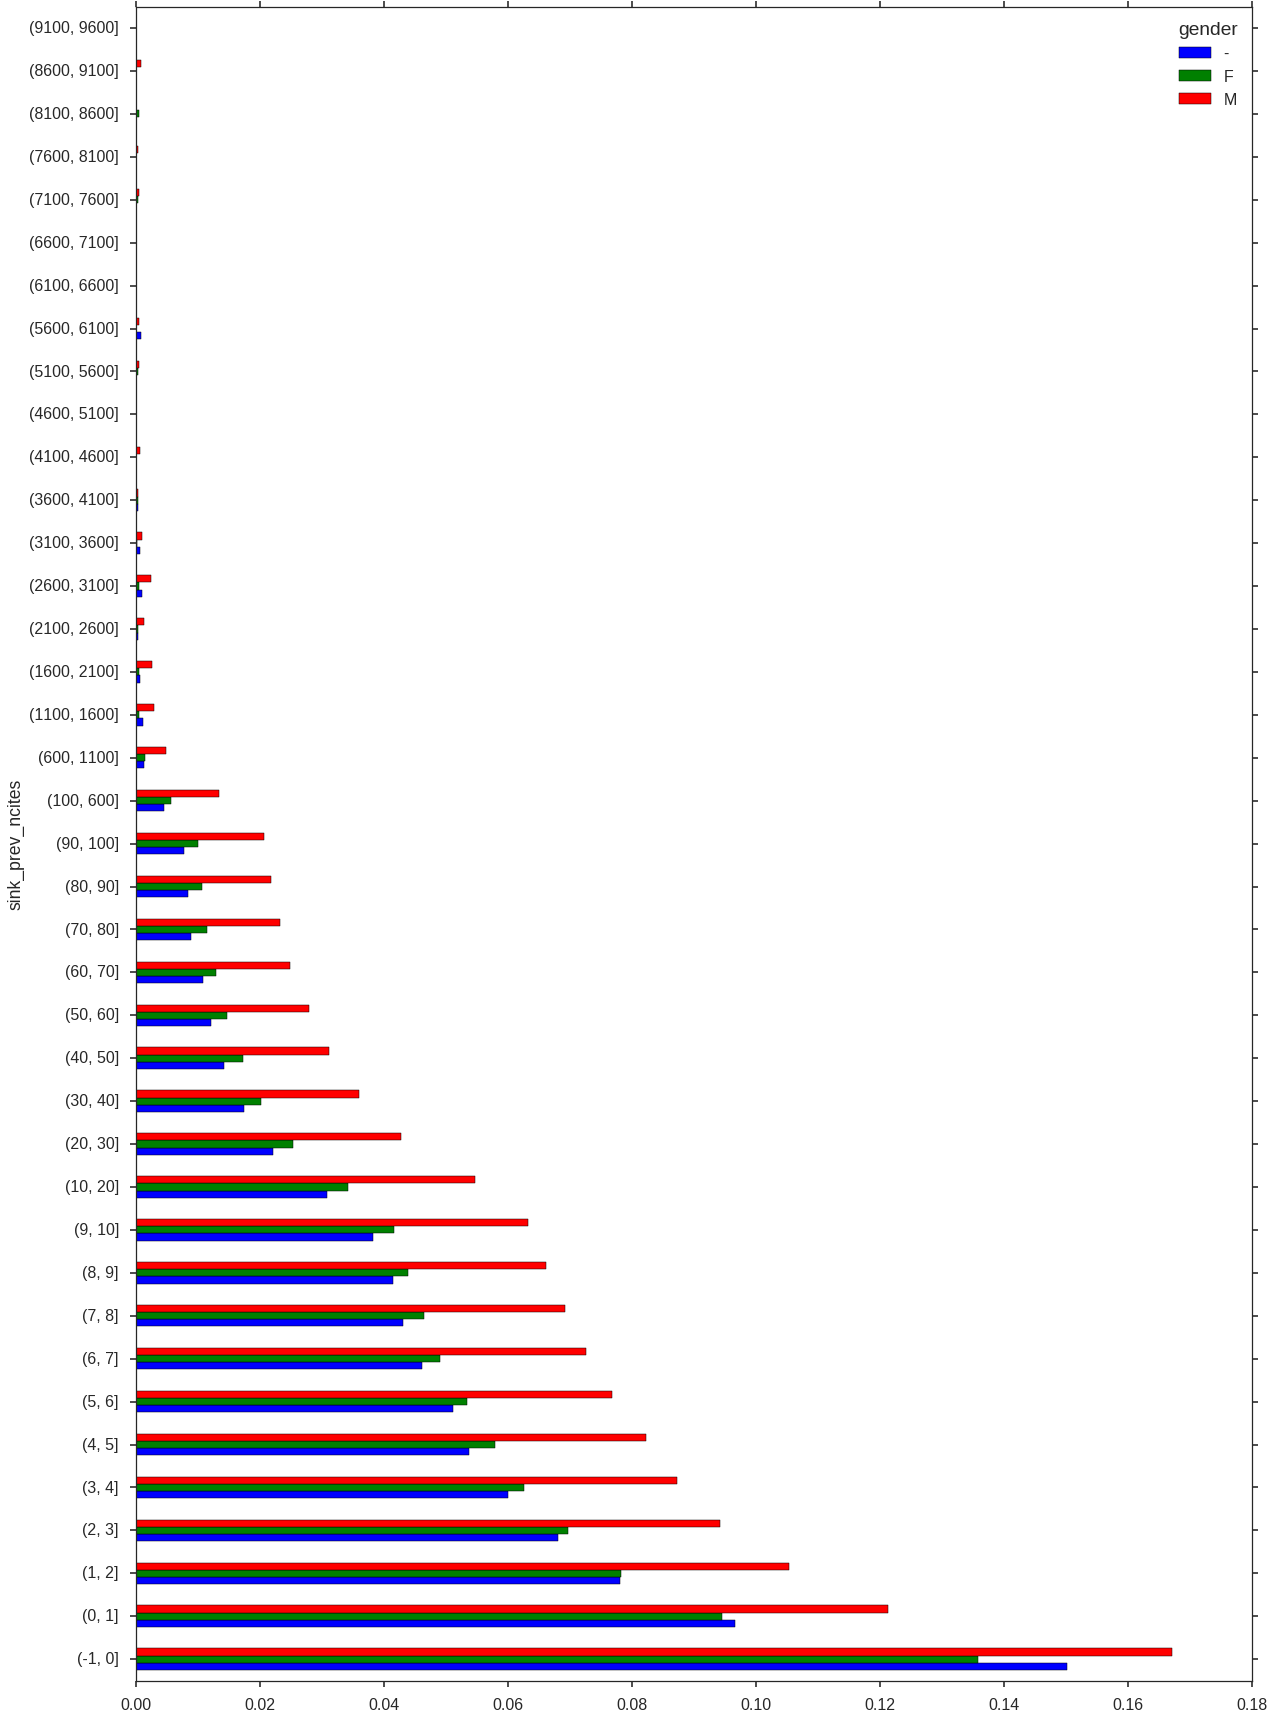

In [70]:
t = df.pivot_table(columns="gender", index=pd.cut(df.sink_prev_ncites, bins=range(-1,10) + range(10,100,10)
                                                 + range(100,10000, 500)), values="is_self_cite", aggfunc=np.mean)
t*100
fig, ax = plt.subplots(figsize=(20,30))
t.plot(kind="barh", ax=ax)

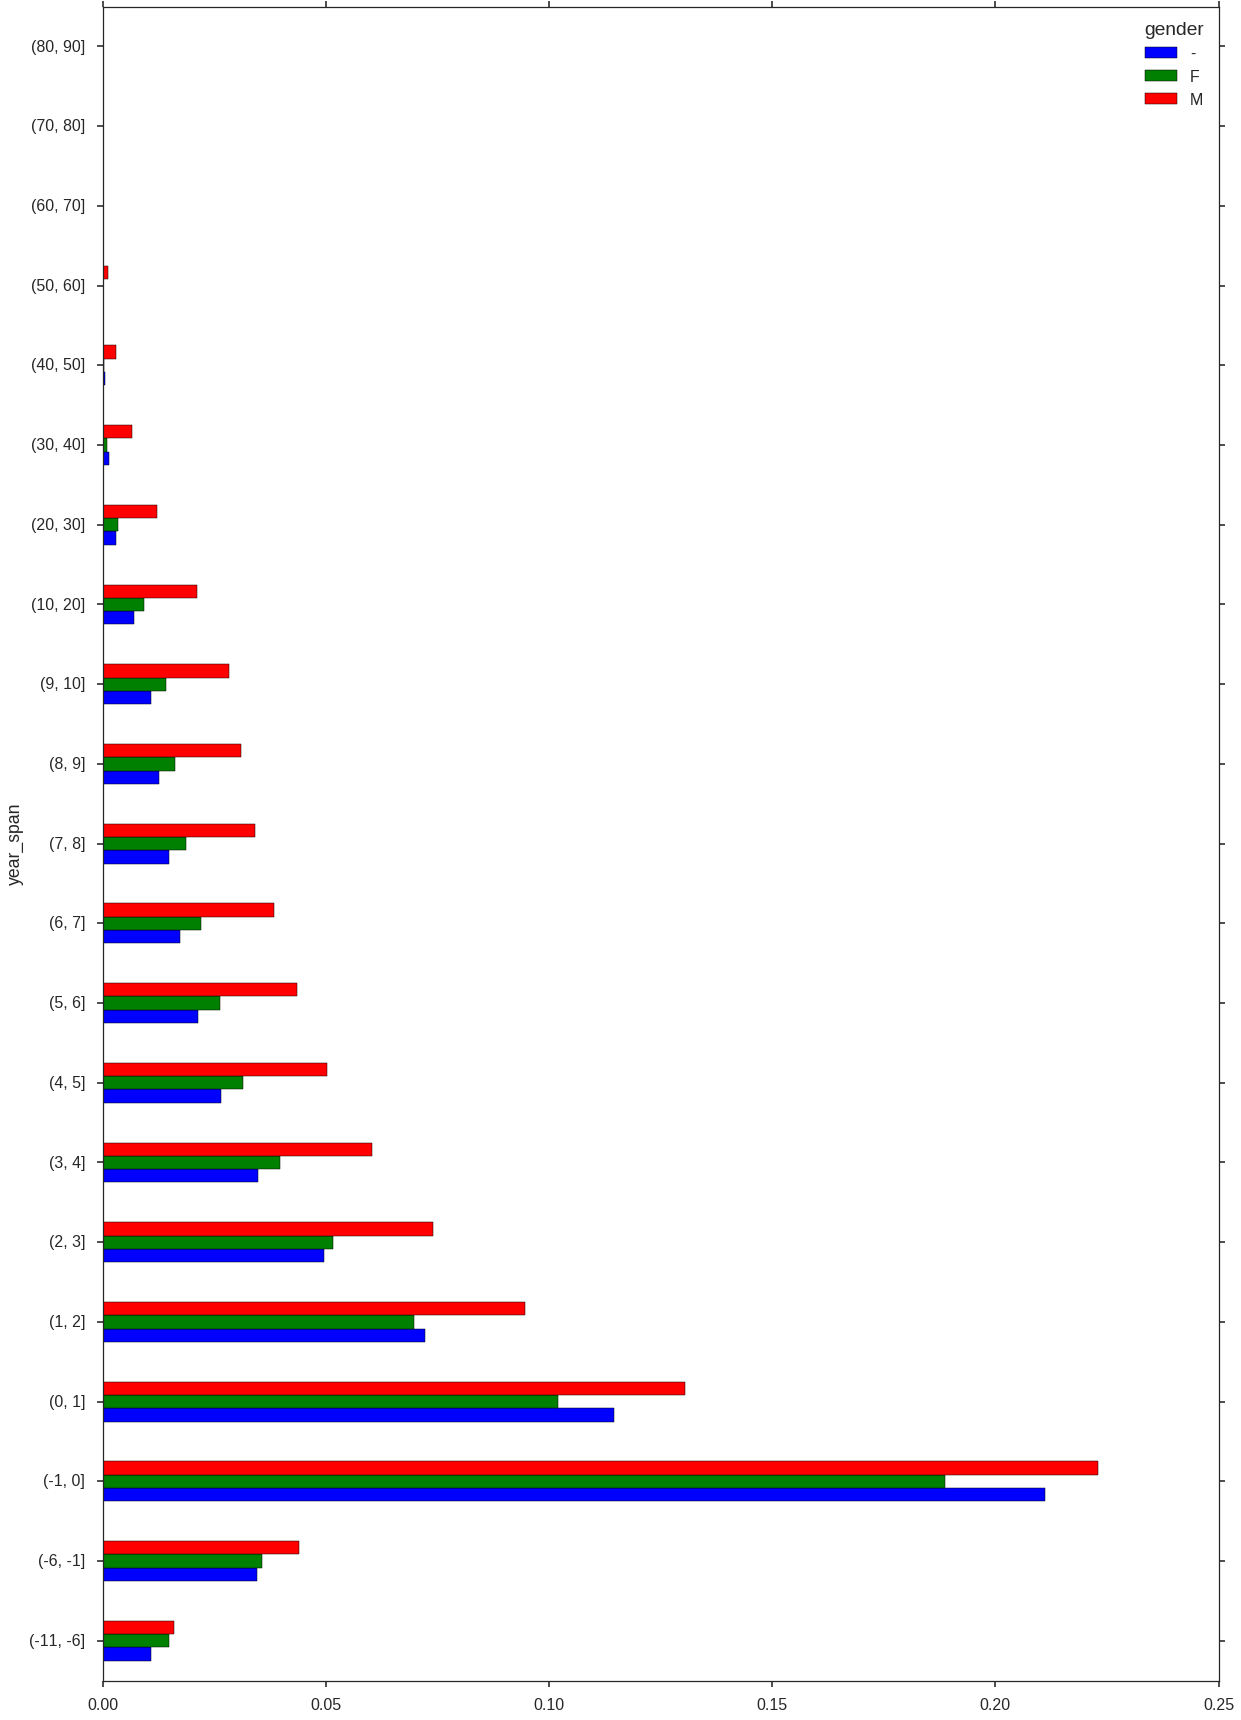

In [73]:
t = df.pivot_table(columns="gender", index=pd.cut(df.year_span, bins=range(-11,0,5) + range(0,10)
                                                 + range(10,100, 10)), values="is_self_cite", aggfunc=np.mean)
t*100
fig, ax = plt.subplots(figsize=(20,30))
t.plot(kind="barh", ax=ax)

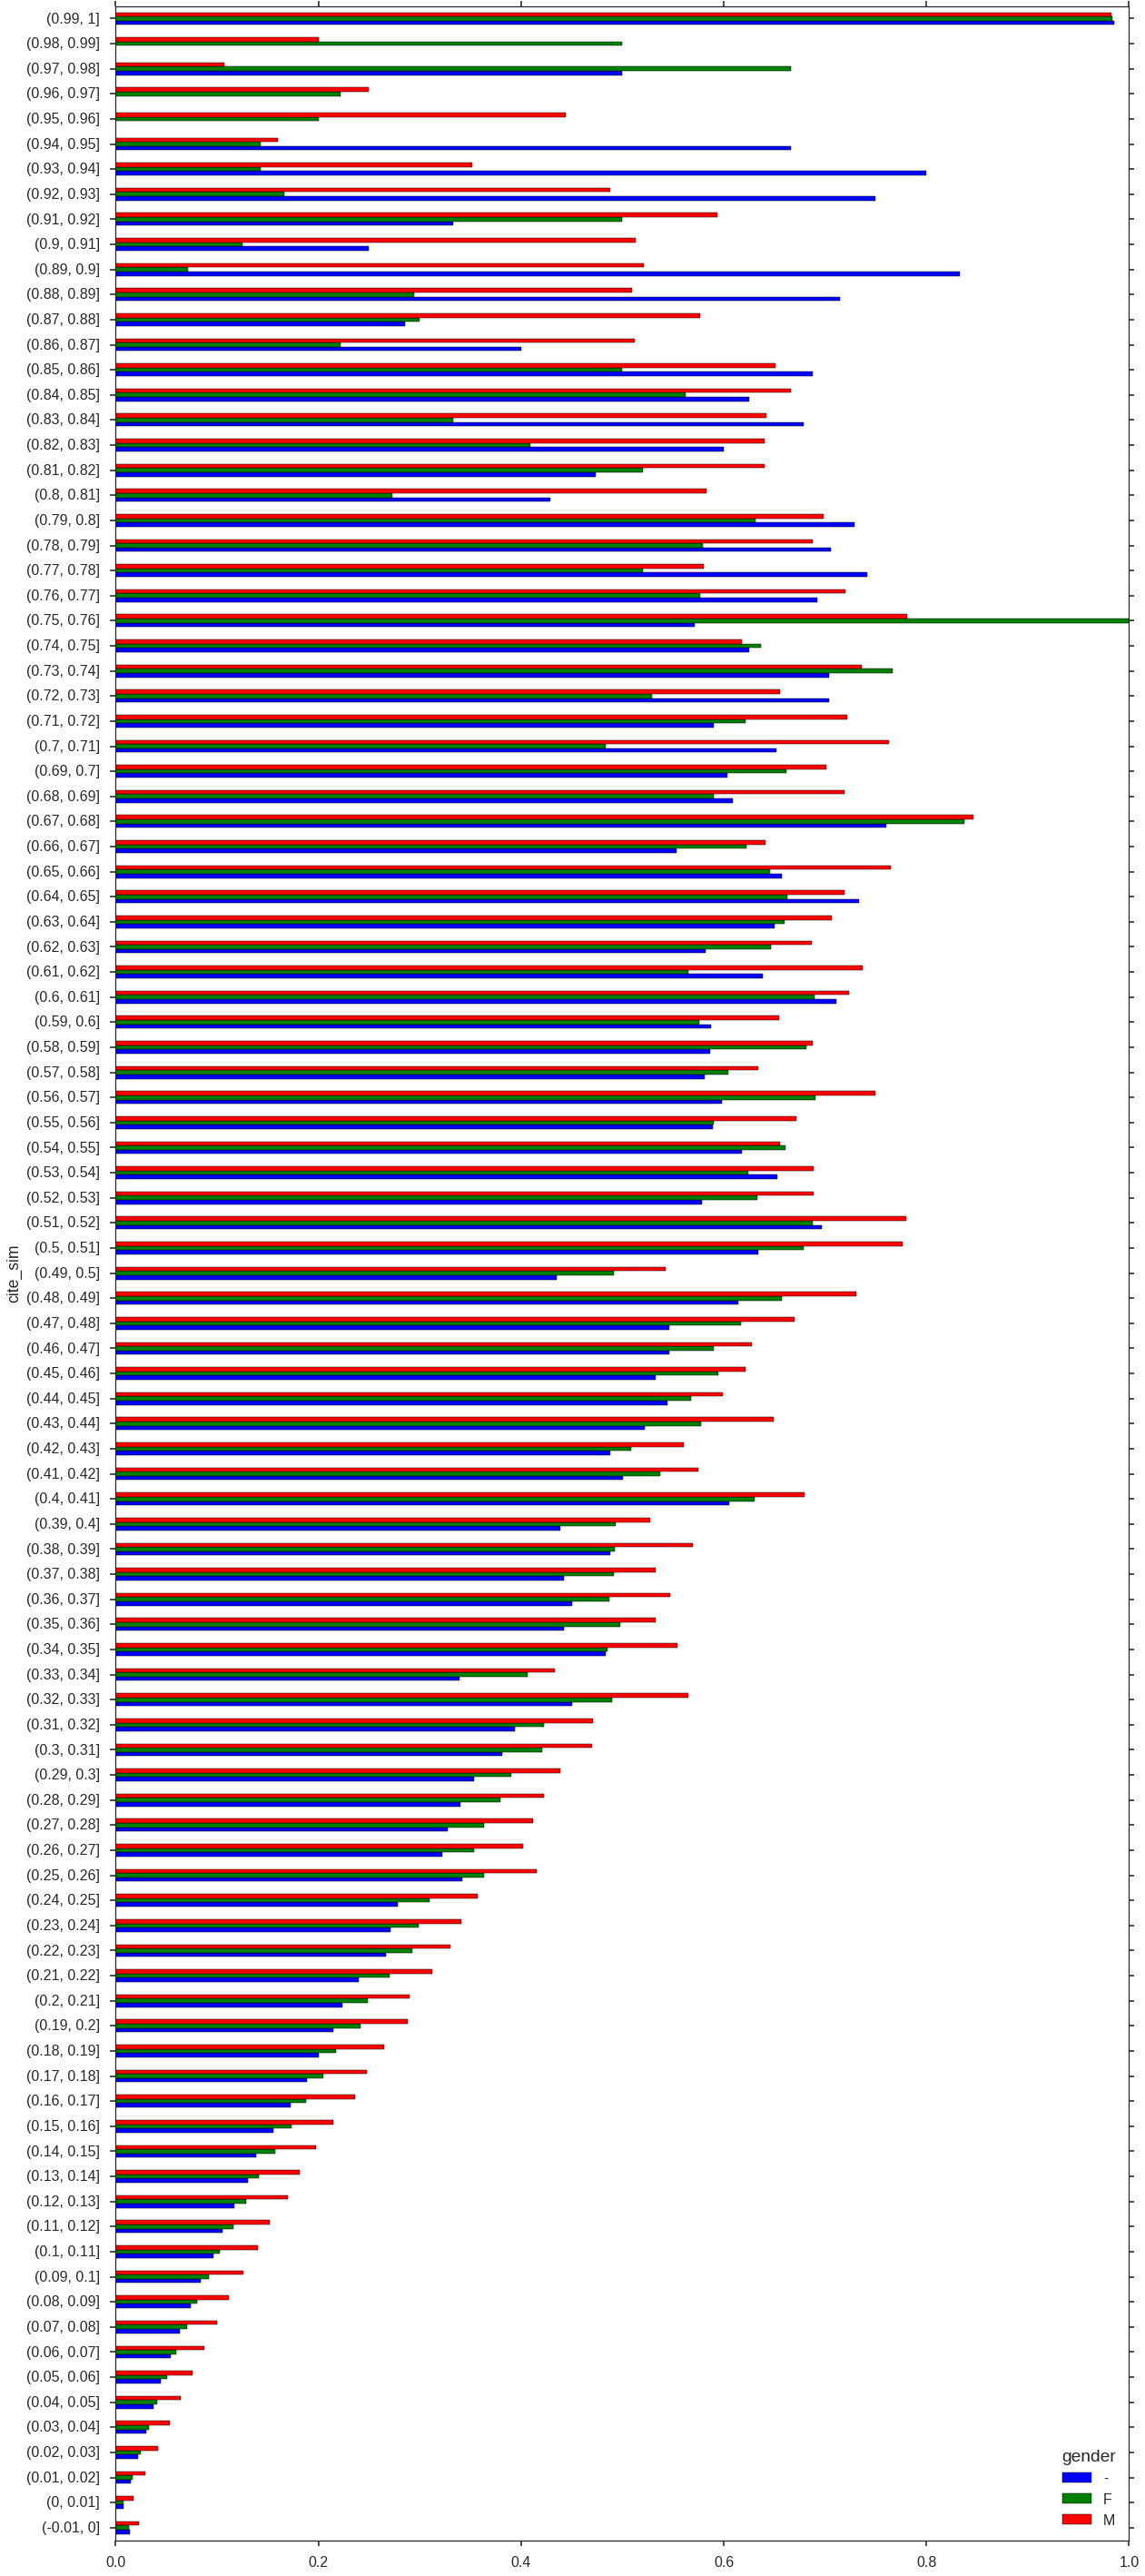

In [74]:
t = df.pivot_table(columns="gender", index=pd.cut(df.cite_sim, bins=np.arange(-0.01,1.01,0.01)), values="is_self_cite", aggfunc=np.mean)
t*100
fig, ax = plt.subplots(figsize=(20,50))
t.plot(kind="barh", ax=ax)

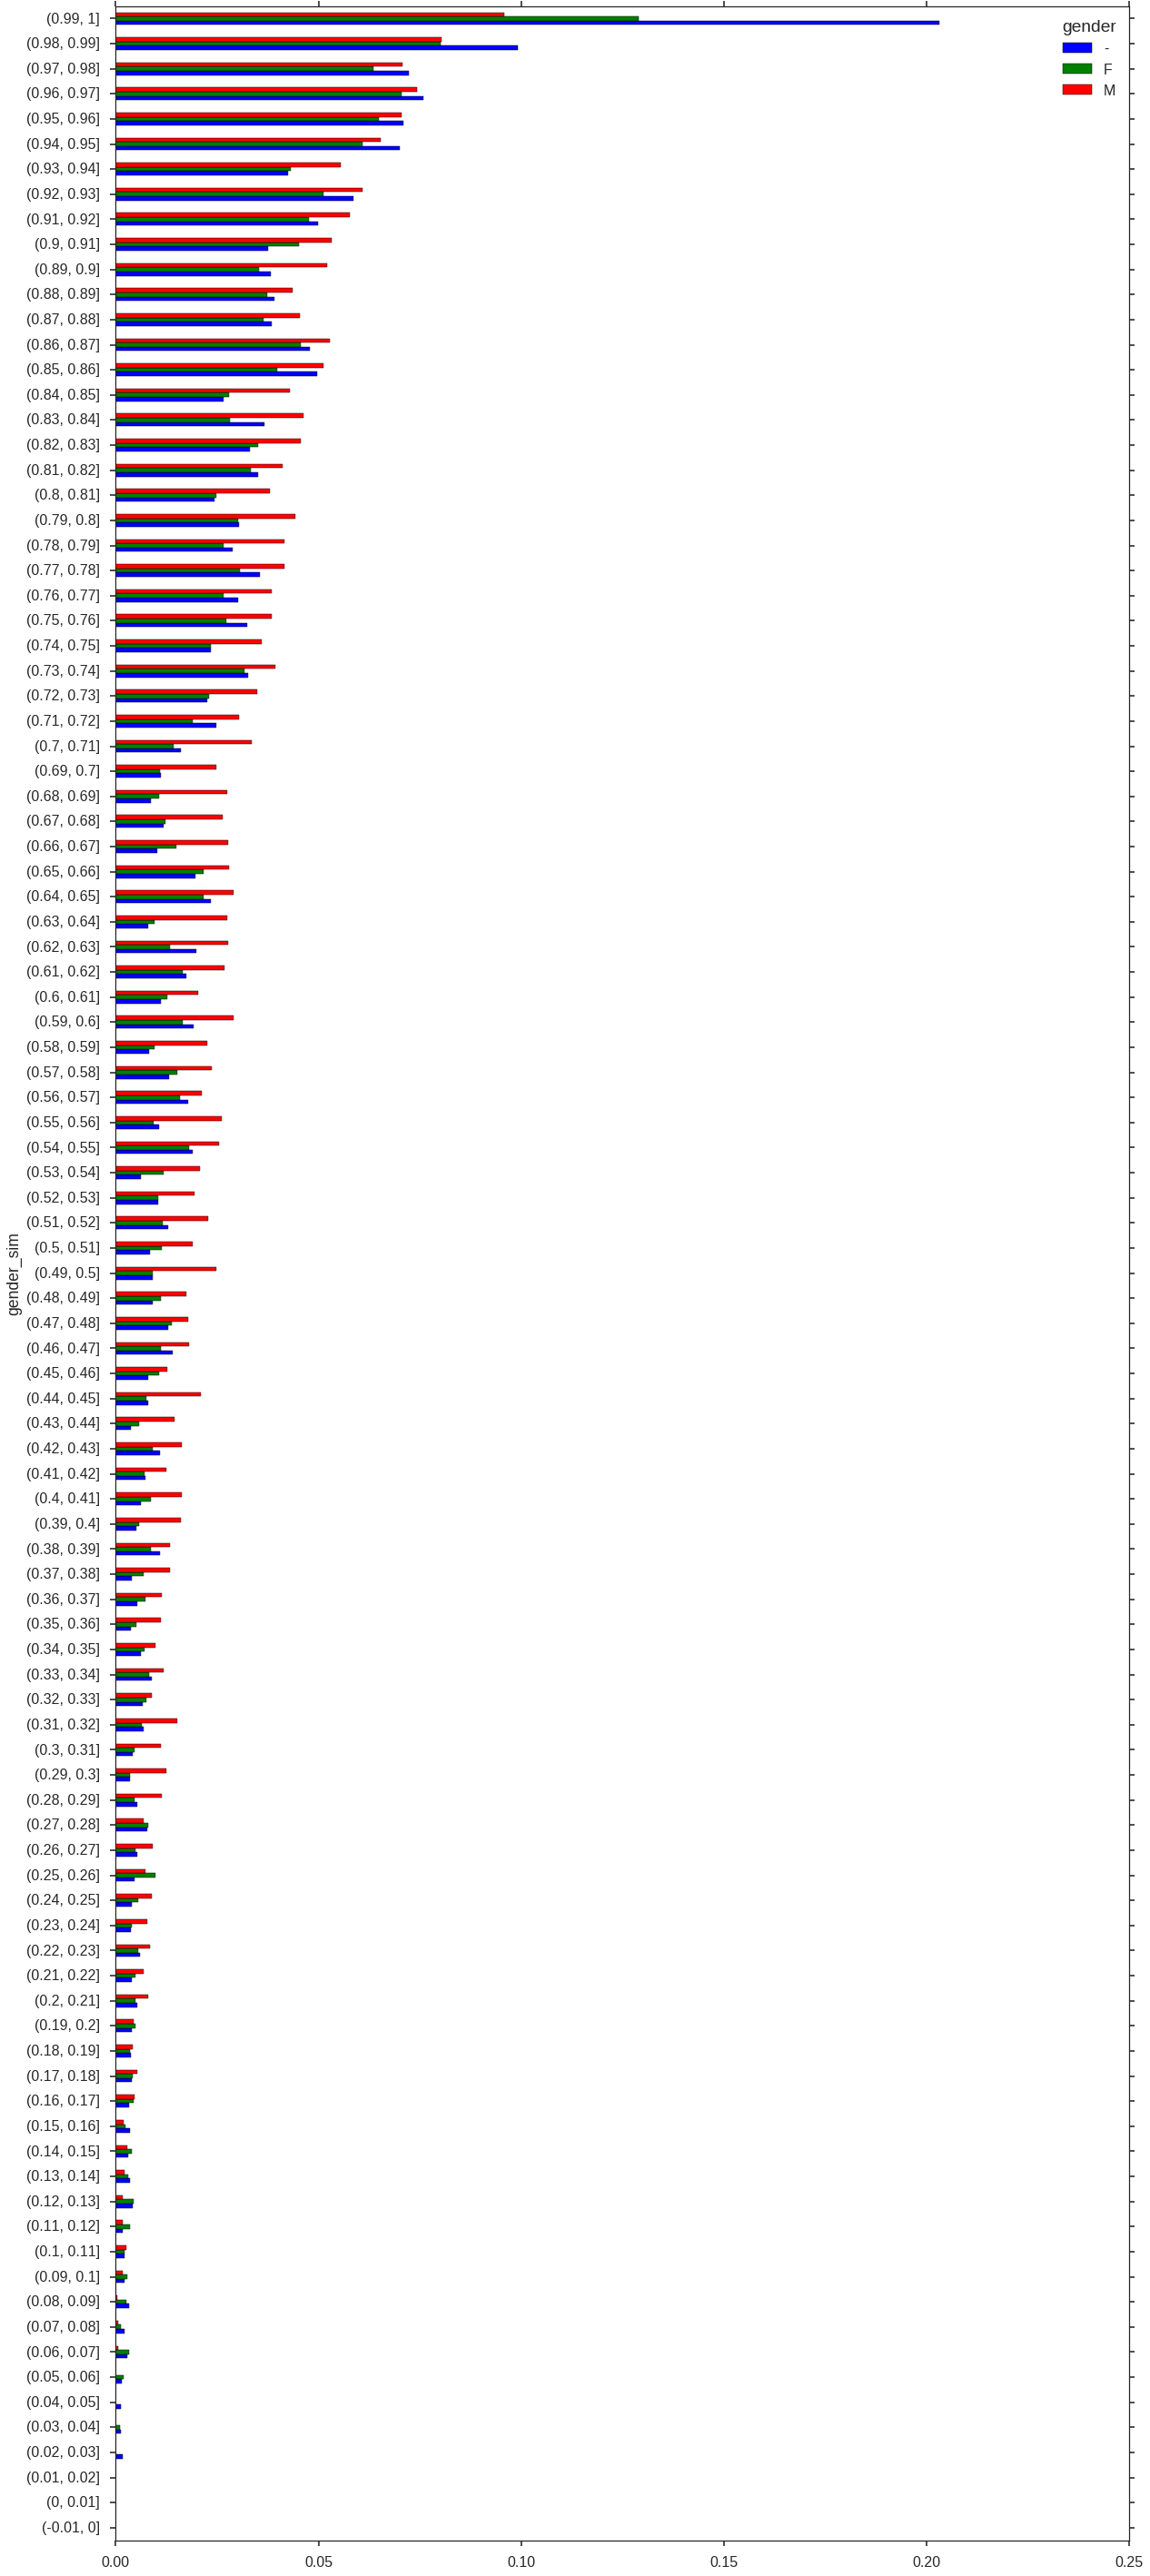

In [75]:
t = df.pivot_table(columns="gender", index=pd.cut(df.gender_sim, bins=np.arange(-0.01,1.01,0.01)), values="is_self_cite", aggfunc=np.mean)
t*100
fig, ax = plt.subplots(figsize=(20,50))
t.plot(kind="barh", ax=ax)

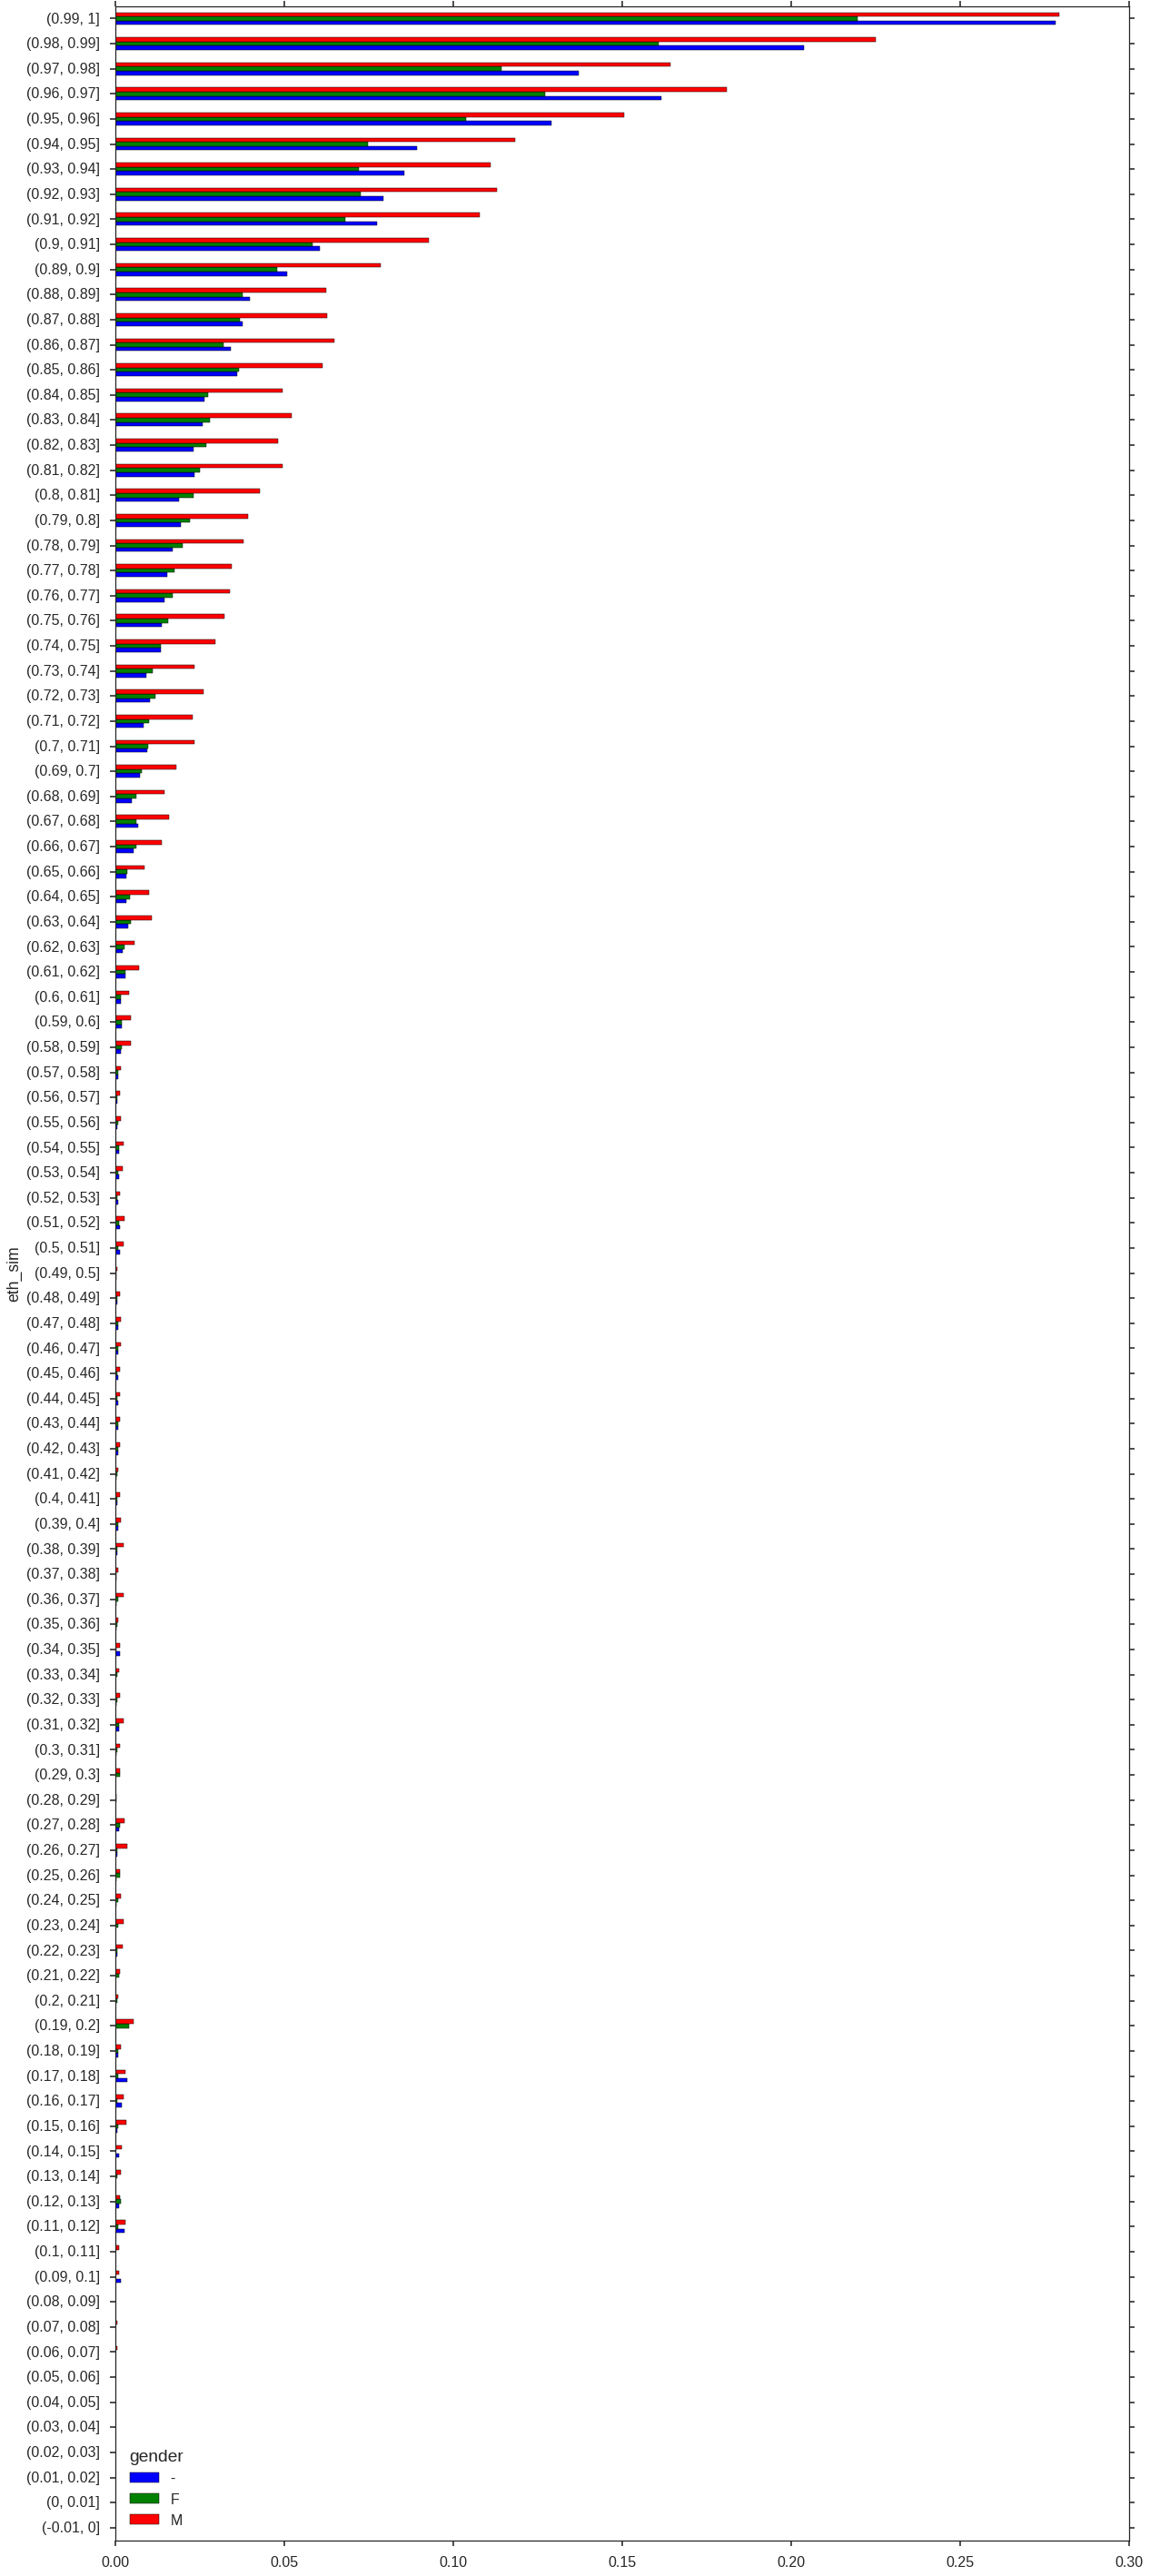

In [76]:
t = df.pivot_table(columns="gender", index=pd.cut(df.eth_sim, bins=np.arange(-0.01,1.01,0.01)), values="is_self_cite", aggfunc=np.mean)
t*100
fig, ax = plt.subplots(figsize=(20,50))
t.plot(kind="barh", ax=ax)

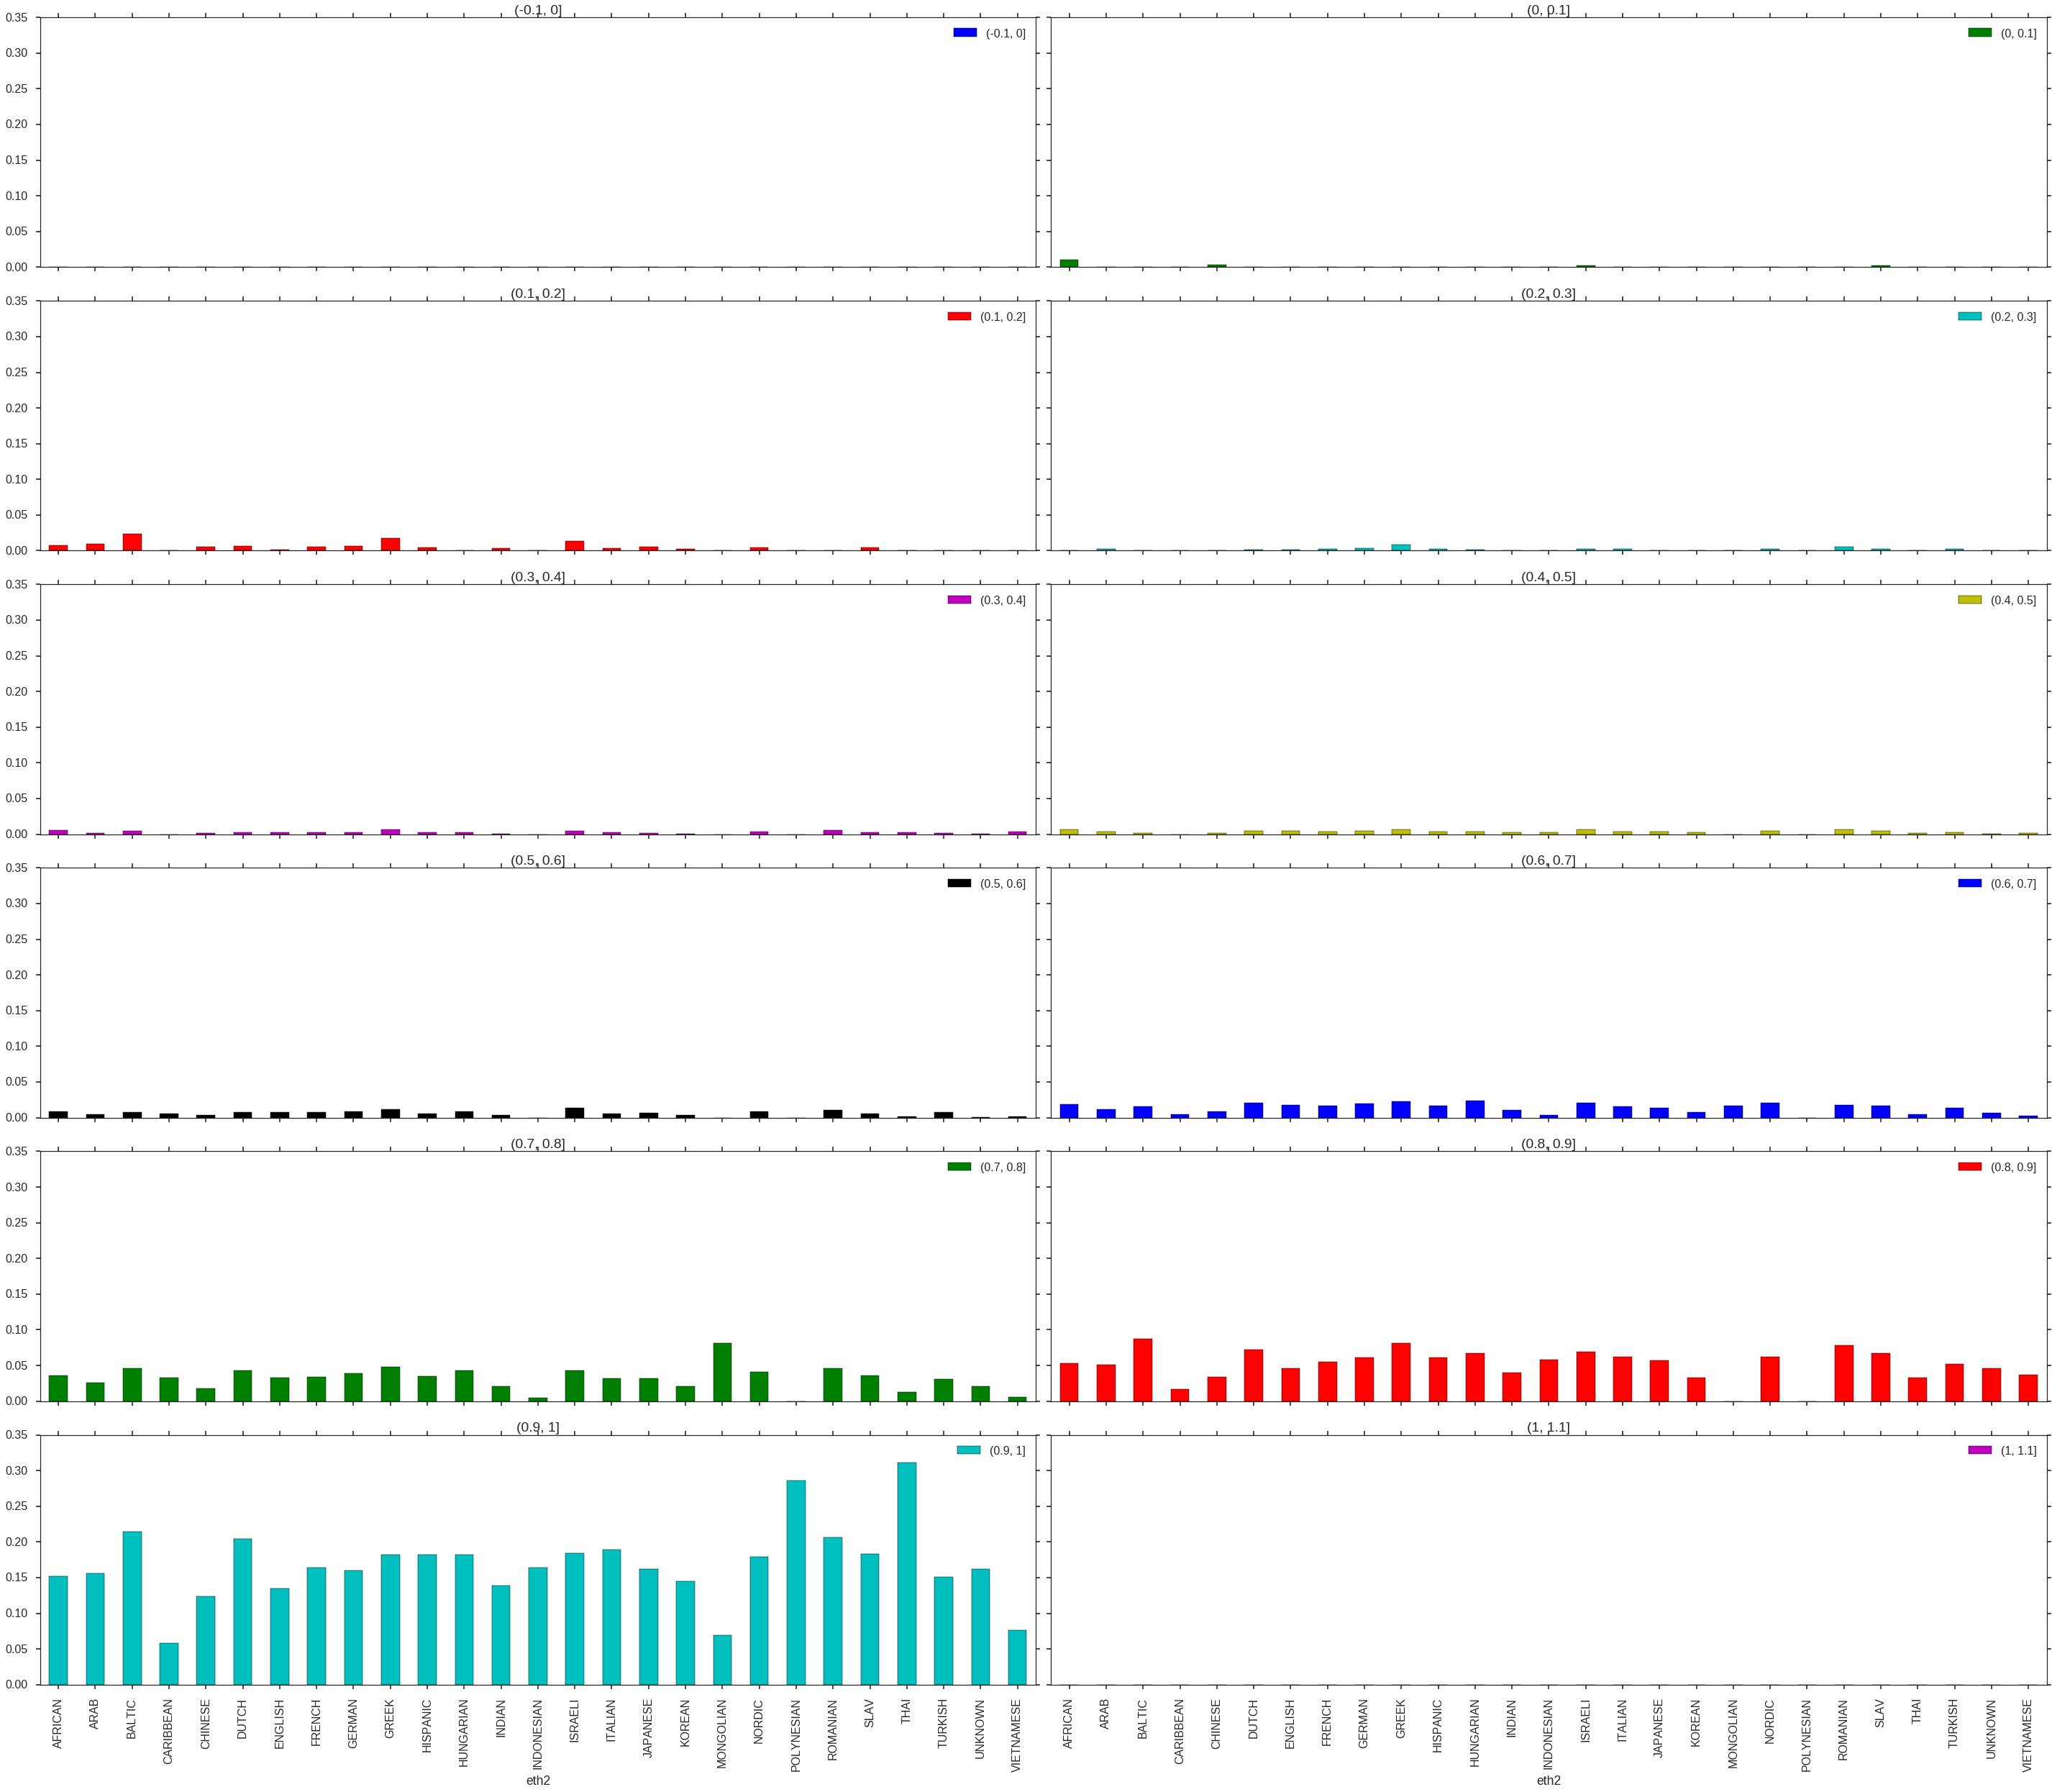

In [79]:
t = df.pivot_table(columns="eth2", index=pd.cut(df.eth_sim, bins=np.arange(-0.1,1.1,0.1)), values="is_self_cite", aggfunc=np.mean)
t*100
fig, ax = plt.subplots(t.shape[0]/2,2, sharex=True, sharey=True, figsize=(40,35))
ax = t.T.plot(kind="bar", subplots=True,
              ax=ax, alpha=1)
plt.tight_layout()

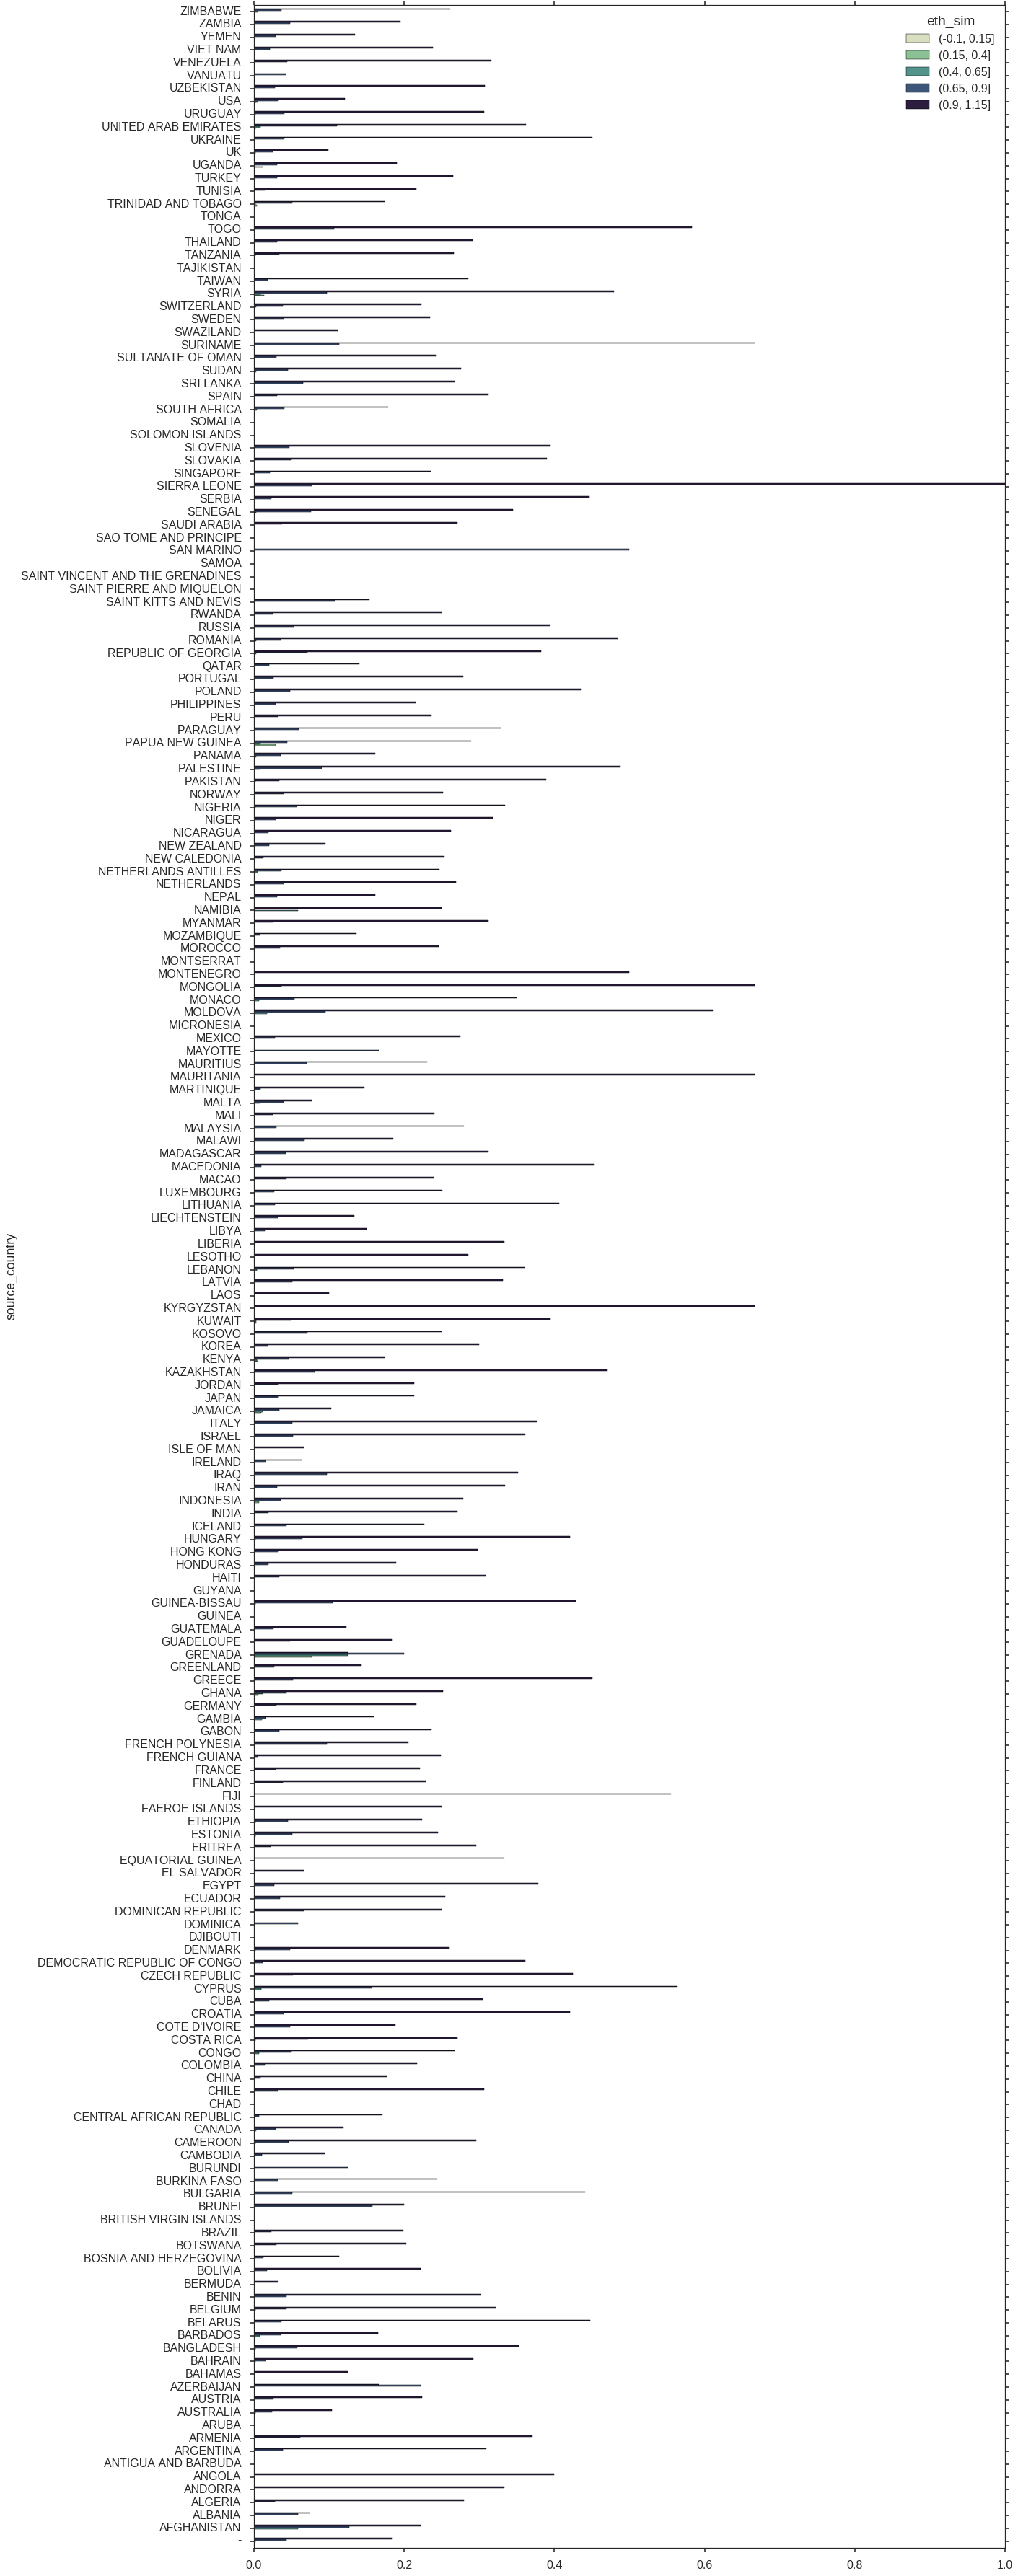

In [83]:
t = df.pivot_table(columns="source_country", index=pd.cut(df.eth_sim, bins=np.arange(-0.1,1.25,0.25)), values="is_self_cite", aggfunc=np.mean)
t*100
fig, ax = plt.subplots(figsize=(20,50))
ax = t.T.plot(kind="barh",
              ax=ax, alpha=1, colormap=sns.cubehelix_palette(5, start=0.5, rot=-0.75, as_cmap=True))
plt.tight_layout()

## General statistics about the data

* 41.6 million source sink pairs for at-least 2 co-authors
* 71 % articles include self citations
* Only 13.2 % source sink pairs are self-citations
* Only 4.6% source sink pairs are self-citations by first authors (might be because most first authors are young)



In [84]:
df.shape

(41618369, 56)

In [85]:
(df.n_common_authors == 0).value_counts()

True     36118953
False     5499416
Name: n_common_authors, dtype: int64

In [86]:
(df[["source_id", "n_common_authors"]].groupby("source_id")["n_common_authors"].max() == 0).value_counts()

False    1147754
True      470245
Name: n_common_authors, dtype: int64

In [88]:
470245 * 100. / (1147754 + 470245) # % of non-self citing papers

29.063367777112347

In [91]:
5499416 * 100. / 41618369 # % of source sink pairs which are self-citations

13.213915230556008

In [92]:
t = (df.is_self_cite == 1).value_counts()
t = t * 100. / t.sum()
t

False    95.148685
True      4.851315
Name: is_self_cite, dtype: float64

## Model analysis

In [93]:
from statsmodels.api import Logit
import patsy

In [94]:
df.columns.values

array(['source_id', 'source_year', 'source_j', 'source_n_mesh',
       'source_n_mesh_ex', 'source_is_eng', 'source_country',
       'source_is_journal', 'source_is_review', 'source_is_case_rep',
       'source_is_let_ed_com', 'source_T_novelty', 'source_V_novelty',
       'source_PT_novelty', 'source_PV_novelty', 'source_ncites',
       'source_n_authors', 'sink_id', 'sink_year', 'sink_j', 'sink_n_mesh',
       'sink_n_mesh_ex', 'sink_is_eng', 'sink_is_journal',
       'sink_is_review', 'sink_is_case_rep', 'sink_is_let_ed_com',
       'sink_T_novelty', 'sink_V_novelty', 'sink_PT_novelty',
       'sink_PV_novelty', 'sink_n_authors', 'year_span', 'journal_same',
       'mesh_sim', 'title_sim', 'lang_sim', 'affiliation_sim',
       'pubtype_sim', 'cite_sim', 'author_sim', 'gender_sim', 'eth_sim',
       'n_common_authors', 'auid', 'gender', 'eth1', 'eth2', 'pos',
       'pos_nice', 'sink_last_ncites', 'sink_prev_ncites',
       'auth_last_npapers', 'auth_prev_papers', 'jj_sim', 'is_self_

In [97]:
" + ".join(['journal_same',
       'mesh_sim', 'title_sim', 'lang_sim', 'affiliation_sim',
       'pubtype_sim', 'cite_sim', 'author_sim', 'gender_sim', 'eth_sim',])

'journal_same + mesh_sim + title_sim + lang_sim + affiliation_sim + pubtype_sim + cite_sim + author_sim + gender_sim + eth_sim'

In [98]:
formula = ("is_self_cite ~ journal_same + mesh_sim + title_sim"
           " + lang_sim + affiliation_sim + pubtype_sim + cite_sim + author_sim + gender_sim + eth_sim")
y,X = patsy.dmatrices(formula, data=df, return_type="dataframe")

In [99]:
model = Logit(y,X)
res = model.fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.084641
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:              Logit            Pseudo R-squared: 0.564       
Dependent Variable: is_self_cite     AIC:              7045248.6138
Date:               2016-05-10 02:33 BIC:              7045419.5983
No. Observations:   41618369         Log-Likelihood:   -3.5226e+06 
Df Model:           10               LL-Null:          -8.0787e+06 
Df Residuals:       41618358         LLR p-value:      0.0000      
Converged:          1.0000           Scale:            1.0000      
No. Iterations:     10.0000                                        
-------------------------------------------------------------------
                   Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Intercept         -8.2162   0.0130 -629.9107 0.0000 -8.2418 -8.1907
journal_same      -0.0279   0.0032   -8.8171 0.0000 -0.0341 -0.0217
mesh_sim           0.3898   0.0098   39.5931 0.0000  0.3705  0.4091
title_sim         -0.0297   0.0068   -4.3665 0.0000 -0.0430 -0.0164
lang_sim          -0.2929   0.0092  -31.8092 0.0000 -0.3109 -0.2748
affiliation_sim    0.8996   0.0029  309.9453 0.0000  0.8939  0.9053
pubtype_sim       -0.5637   0.0039 -142.7861 0.0000 -0.5715 -0.5560
cite_sim           3.4956   0.0161  217.7487 0.0000  3.4642  3.5271
author_sim        10.7435   0.0077 1404.3605 0.0000 10.7285 10.7585
gender_sim         0.7898   0.0067  118.7381 0.0000  0.7768  0.8028
eth_sim            3.6911   0.0099  371.5022 0.0000  3.6716  3.7105
===================================================================

"""

In [105]:
formula = ("is_self_cite ~ journal_same + mesh_sim + title_sim"
           " + lang_sim + affiliation_sim + pubtype_sim + cite_sim + gender_sim + eth_sim")
y,X = patsy.dmatrices(formula, data=df, return_type="dataframe")

In [106]:
model = Logit(y,X)
res = model.fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.124083
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:               Logit            Pseudo R-squared: 0.361        
Dependent Variable:  is_self_cite     AIC:              10328309.2532
Date:                2016-05-10 02:58 BIC:              10328464.6937
No. Observations:    41618369         Log-Likelihood:   -5.1641e+06  
Df Model:            9                LL-Null:          -8.0787e+06  
Df Residuals:        41618359         LLR p-value:      0.0000       
Converged:           1.0000           Scale:            1.0000       
No. Iterations:      10.0000                                         
---------------------------------------------------------------------
                 Coef.   Std.Err.     z      P>|z|   [0.025   0.975] 
---------------------------------------------------------------------
Intercept       -13.7615   0.0125 -1104.6516 0.0000 -13.7859 -13.7370
journal_same      0.2355   0.0024    98.8276 0.0000   0.2308   0.2401
mesh_sim          0.9401   0.0075   125.6740 0.0000   0.9254   0.9548
title_sim         0.6824   0.0052   130.5635 0.0000   0.6721   0.6926
lang_sim         -0.1718   0.0077   -22.2757 0.0000  -0.1869  -0.1567
affiliation_sim   1.4130   0.0024   592.0317 0.0000   1.4083   1.4176
pubtype_sim       0.4193   0.0030   139.4711 0.0000   0.4134   0.4252
cite_sim          8.9217   0.0123   724.6913 0.0000   8.8976   8.9459
gender_sim        2.7713   0.0063   438.4189 0.0000   2.7589   2.7837
eth_sim           7.8695   0.0096   823.2449 0.0000   7.8508   7.8882
=====================================================================

"""

In [107]:
formula = ("is_self_cite ~ journal_same + mesh_sim + title_sim"
           " + lang_sim + affiliation_sim + pubtype_sim + gender_sim + eth_sim")
y,X = patsy.dmatrices(formula, data=df, return_type="dataframe")

In [108]:
model = Logit(y,X)
res = model.fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.130886
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:               Logit            Pseudo R-squared: 0.326        
Dependent Variable:  is_self_cite     AIC:              10894578.2713
Date:                2016-05-10 08:21 BIC:              10894718.1678
No. Observations:    41618369         Log-Likelihood:   -5.4473e+06  
Df Model:            8                LL-Null:          -8.0787e+06  
Df Residuals:        41618360         LLR p-value:      0.0000       
Converged:           1.0000           Scale:            1.0000       
No. Iterations:      10.0000                                         
---------------------------------------------------------------------
                 Coef.   Std.Err.     z      P>|z|   [0.025   0.975] 
---------------------------------------------------------------------
Intercept       -14.2341   0.0123 -1153.9767 0.0000 -14.2582 -14.2099
journal_same      0.3690   0.0023   163.4569 0.0000   0.3645   0.3734
mesh_sim          1.9405   0.0070   278.1806 0.0000   1.9269   1.9542
title_sim         1.4837   0.0049   304.5011 0.0000   1.4742   1.4933
lang_sim         -0.1590   0.0075   -21.1931 0.0000  -0.1737  -0.1443
affiliation_sim   1.4600   0.0023   625.6089 0.0000   1.4554   1.4645
pubtype_sim       0.6518   0.0029   226.3494 0.0000   0.6462   0.6575
gender_sim        2.9828   0.0062   477.8359 0.0000   2.9706   2.9951
eth_sim           8.1174   0.0095   855.6945 0.0000   8.0988   8.1360
=====================================================================

"""

In [110]:
genders = ["-", "F", "M"]

In [111]:
formula = ("is_self_cite ~ C(gender, levels=genders)")
y,X = patsy.dmatrices(formula, data=df, return_type="dataframe")

In [112]:
model = Logit(y,X)
res = model.fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.193090
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
=================================================================================
Model:                   Logit                Pseudo R-squared:     0.005        
Dependent Variable:      is_self_cite         AIC:                  16072172.4045
Date:                    2016-05-10 08:33     BIC:                  16072219.0366
No. Observations:        41618369             Log-Likelihood:       -8.0361e+06  
Df Model:                2                    LL-Null:              -8.0787e+06  
Df Residuals:            41618366             LLR p-value:          0.0000       
Converged:               1.0000               Scale:                1.0000       
No. Iterations:          7.0000                                                  
---------------------------------------------------------------------------------
                                Coef.  Std.Err.     z      P>|z|   [0.025  0.975]
---------------------------------------------------------------------------------
Intercept                      -3.2577   0.0022 -1462.9191 0.0000 -3.2621 -3.2534
C(gender, levels=genders)[T.F]  0.0206   0.0027     7.6970 0.0000  0.0154  0.0259
C(gender, levels=genders)[T.M]  0.4506   0.0024   187.8927 0.0000  0.4459  0.4553
=================================================================================

"""

In [113]:
formula = ("is_self_cite ~ journal_same + mesh_sim + title_sim"
           " + lang_sim + affiliation_sim + pubtype_sim + gender_sim + eth_sim"
          " + np.log10(auth_prev_papers + 1) + np.log10(sink_prev_ncites + 1)")
y,X = patsy.dmatrices(formula, data=df, return_type="dataframe")
model = Logit(y,X)
res = model.fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.106526
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                   Results: Logit
====================================================================================
Model:                     Logit                 Pseudo R-squared:      0.451       
Dependent Variable:        is_self_cite          AIC:                   8866892.0465
Date:                      2016-05-10 08:56      BIC:                   8867063.0310
No. Observations:          41618369              Log-Likelihood:        -4.4334e+06 
Df Model:                  10                    LL-Null:               -8.0787e+06 
Df Residuals:              41618358              LLR p-value:           0.0000      
Converged:                 1.0000                Scale:                 1.0000      
No. Iterations:            10.0000                                                  
------------------------------------------------------------------------------------
                                Coef.   Std.Err.     z      P>|z|   [0.025   0.975] 
------------------------------------------------------------------------------------
Intercept                      -15.1624   0.0134 -1129.5456 0.0000 -15.1887 -15.1360
journal_same                     0.2898   0.0025   114.8472 0.0000   0.2848   0.2947
mesh_sim                         1.1908   0.0077   154.7635 0.0000   1.1757   1.2059
title_sim                        1.5258   0.0054   284.0571 0.0000   1.5152   1.5363
lang_sim                         0.3259   0.0082    39.9458 0.0000   0.3099   0.3419
affiliation_sim                  1.5400   0.0025   614.6253 0.0000   1.5350   1.5449
pubtype_sim                      1.0856   0.0032   339.1767 0.0000   1.0793   1.0918
gender_sim                       2.8298   0.0065   433.5910 0.0000   2.8170   2.8426
eth_sim                          7.7826   0.0096   807.8855 0.0000   7.7637   7.8015
np.log10(auth_prev_papers + 1)   1.6747   0.0016  1070.0314 0.0000   1.6717   1.6778
np.log10(sink_prev_ncites + 1)  -1.1791   0.0014  -833.5129 0.0000  -1.1818  -1.1763
====================================================================================

"""

In [114]:
formula = ("is_self_cite ~ journal_same + mesh_sim + title_sim"
           " + lang_sim + affiliation_sim + pubtype_sim + gender_sim + eth_sim"
          " + np.log10(auth_prev_papers + 1) + np.log10(sink_prev_ncites + 1)"
          " + C(gender, levels=genders)")
y,X = patsy.dmatrices(formula, data=df, return_type="dataframe")
model = Logit(y,X)
res = model.fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.106453
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                   Results: Logit
====================================================================================
Model:                     Logit                 Pseudo R-squared:      0.452       
Dependent Variable:        is_self_cite          AIC:                   8860813.2163
Date:                      2016-05-10 09:18      BIC:                   8861015.2890
No. Observations:          41618369              Log-Likelihood:        -4.4304e+06 
Df Model:                  12                    LL-Null:               -8.0787e+06 
Df Residuals:              41618356              LLR p-value:           0.0000      
Converged:                 1.0000                Scale:                 1.0000      
No. Iterations:            10.0000                                                  
------------------------------------------------------------------------------------
                                Coef.   Std.Err.     z      P>|z|   [0.025   0.975] 
------------------------------------------------------------------------------------
Intercept                      -15.0608   0.0136 -1107.9608 0.0000 -15.0875 -15.0342
C(gender, levels=genders)[T.F]  -0.1170   0.0033   -35.8255 0.0000  -0.1234  -0.1106
C(gender, levels=genders)[T.M]  -0.2185   0.0030   -72.3499 0.0000  -0.2244  -0.2126
journal_same                     0.2894   0.0025   114.6273 0.0000   0.2844   0.2943
mesh_sim                         1.1919   0.0077   154.7340 0.0000   1.1768   1.2070
title_sim                        1.5205   0.0054   282.8350 0.0000   1.5099   1.5310
lang_sim                         0.3124   0.0082    38.2669 0.0000   0.2964   0.3284
affiliation_sim                  1.5362   0.0025   612.8631 0.0000   1.5312   1.5411
pubtype_sim                      1.0774   0.0032   336.2128 0.0000   1.0711   1.0836
gender_sim                       2.8964   0.0066   437.4295 0.0000   2.8834   2.9094
eth_sim                          7.7781   0.0096   806.7634 0.0000   7.7592   7.7970
np.log10(auth_prev_papers + 1)   1.7028   0.0016  1052.3621 0.0000   1.6996   1.7059
np.log10(sink_prev_ncites + 1)  -1.1785   0.0014  -832.8024 0.0000  -1.1813  -1.1758
====================================================================================

"""

In [116]:
t = df[["source_is_eng", "is_self_cite"]].groupby("source_is_eng")["is_self_cite"].mean()
t*100

source_is_eng
0    3.174831
1    4.881590
Name: is_self_cite, dtype: float64

In [117]:
df[["year_span", "sink_prev_ncites"]].corr()

year_span  sink_prev_ncites
year_span          1.000000          0.151355
sink_prev_ncites   0.151355          1.000000

In [118]:
formula = ("is_self_cite ~ I(year_span < -1)"
          )
y,X = patsy.dmatrices(formula, data=df, return_type="dataframe")
model = Logit(y,X)
res = model.fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.194091
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
============================================================================
Model:                  Logit              Pseudo R-squared:   0.000        
Dependent Variable:     is_self_cite       AIC:                16155539.9283
Date:                   2016-05-10 09:43   BIC:                16155571.0164
No. Observations:       41618369           Log-Likelihood:     -8.0778e+06  
Df Model:               1                  LL-Null:            -8.0787e+06  
Df Residuals:           41618367           LLR p-value:        0.0000       
Converged:              1.0000             Scale:              1.0000       
No. Iterations:         8.0000                                              
----------------------------------------------------------------------------
                           Coef.  Std.Err.     z      P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
Intercept                 -2.9748   0.0007 -4120.8095 0.0000 -2.9762 -2.9734
I(year_span < -1)[T.True] -0.8112   0.0215   -37.6902 0.0000 -0.8534 -0.7691
============================================================================

"""

In [ ]:
formula = ("is_self_cite ~ journal_same + mesh_sim + title_sim"
           " + lang_sim + affiliation_sim + pubtype_sim + gender_sim + eth_sim"
          " + np.log10(auth_prev_papers + 1) + np.log10(sink_prev_ncites + 1)"
           " + np.log10(source_ncites) + np.log10(source_n_authors) + np.log10(source_n_mesh + 1)"
          " + C(gender, levels=genders)")
y,X = patsy.dmatrices(formula, data=df, return_type="dataframe")
model = Logit(y,X)
res = model.fit()
res.summary2()

In [121]:
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Logit
===================================================================================
Model:                    Logit                 Pseudo R-squared:      0.457       
Dependent Variable:       is_self_cite          AIC:                   8769054.5360
Date:                     2016-05-10 10:16      BIC:                   8769303.2408
No. Observations:         41618369              Log-Likelihood:        -4.3845e+06 
Df Model:                 15                    LL-Null:               -8.0787e+06 
Df Residuals:             41618353              LLR p-value:           0.0000      
Converged:                1.0000                Scale:                 1.0000      
No. Iterations:           10.0000                                                  
-----------------------------------------------------------------------------------
                                Coef.   Std.Err.     z     P>|z|   [0.025   0.975] 
-----------------------------------------------------------------------------------
Intercept                      -14.0671   0.0145 -968.3310 0.0000 -14.0956 -14.0386
C(gender, levels=genders)[T.F]  -0.1137   0.0033  -34.5746 0.0000  -0.1202  -0.1073
C(gender, levels=genders)[T.M]  -0.2570   0.0030  -84.3550 0.0000  -0.2630  -0.2510
journal_same                     0.2495   0.0026   97.4500 0.0000   0.2445   0.2546
mesh_sim                         1.2809   0.0079  161.6336 0.0000   1.2653   1.2964
title_sim                        1.4672   0.0054  271.5843 0.0000   1.4567   1.4778
lang_sim                         0.3601   0.0082   43.8533 0.0000   0.3440   0.3762
affiliation_sim                  1.5465   0.0025  616.2475 0.0000   1.5415   1.5514
pubtype_sim                      1.1260   0.0032  349.9367 0.0000   1.1197   1.1323
gender_sim                       3.0578   0.0067  458.3155 0.0000   3.0448   3.0709
eth_sim                          7.9183   0.0097  814.7525 0.0000   7.8993   7.9374
np.log10(auth_prev_papers + 1)   1.7419   0.0016 1058.4461 0.0000   1.7387   1.7451
np.log10(sink_prev_ncites + 1)  -1.1307   0.0014 -788.1940 0.0000  -1.1335  -1.1279
np.log10(source_ncites)         -0.3622   0.0026 -139.1405 0.0000  -0.3673  -0.3571
np.log10(source_n_authors)      -0.9579   0.0039 -244.0234 0.0000  -0.9656  -0.9502
np.log10(source_n_mesh + 1)     -0.2236   0.0042  -53.4422 0.0000  -0.2318  -0.2154
===================================================================================

"""

## Empirical distributions

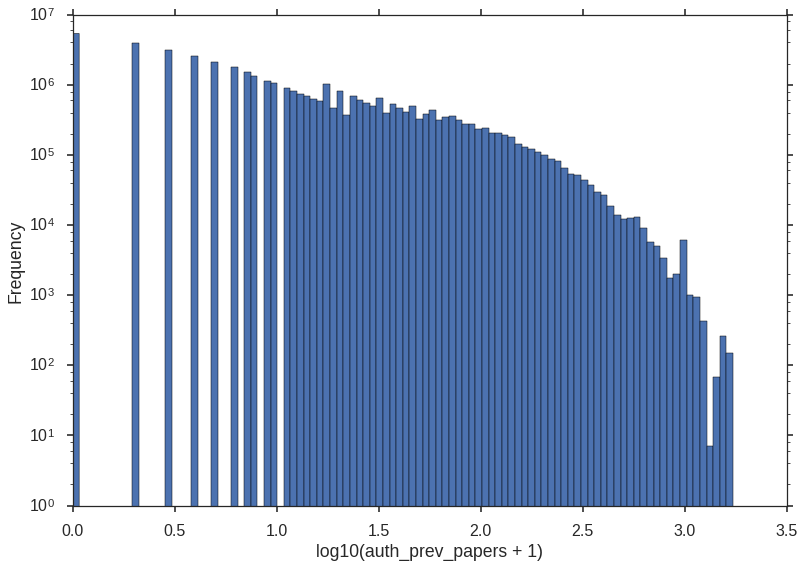

In [124]:
plt.hist(np.log10(df.auth_prev_papers + 1), bins=100, log=True)
plt.xlabel("log10(auth_prev_papers + 1)")
plt.ylabel("Frequency")

In [125]:
pd.DataFrame(df.dtypes)

0
source_id               int64
source_year             int64
source_j               object
source_n_mesh           int64
source_n_mesh_ex        int64
source_is_eng           int64
source_country         object
source_is_journal       int64
source_is_review        int64
source_is_case_rep      int64
source_is_let_ed_com    int64
source_T_novelty      float64
source_V_novelty      float64
source_PT_novelty     float64
source_PV_novelty     float64
source_ncites           int64
source_n_authors        int64
sink_id                 int64
sink_year               int64
sink_j                 object
sink_n_mesh             int64
sink_n_mesh_ex          int64
sink_is_eng             int64
sink_is_journal         int64
sink_is_review          int64
sink_is_case_rep        int64
sink_is_let_ed_com      int64
sink_T_novelty        float64
sink_V_novelty        float64
sink_PT_novelty       float64
sink_PV_novelty       float64
sink_n_authors          int64
year_span               int64
journal_same            int64
mesh_sim              float64
title_sim             float64
lang_sim              float64
affiliation_sim       float64
pubtype_sim           float64
cite_sim              float64
author_sim            float64
gender_sim            float64
eth_sim               float64
n_common_authors        int64
auid                   object
gender                 object
eth1                   object
eth2                   object
pos                     int64
pos_nice                int64
sink_last_ncites        int64
sink_prev_ncites        int64
auth_last_npapers       int64
auth_prev_papers        int64
jj_sim                float64
is_self_cite            int64

In [131]:
t = df[["gender", "is_self_cite"]].groupby("gender")["is_self_cite"].agg([np.mean, len])

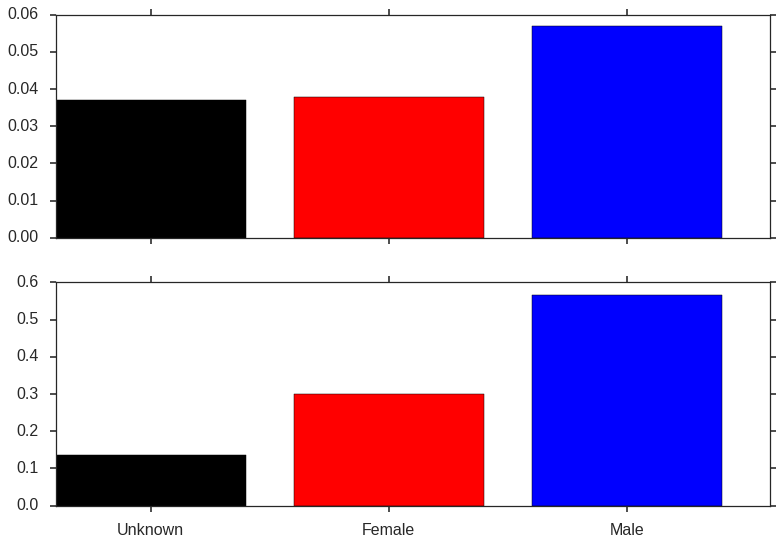

In [152]:
fig, ax = plt.subplots(2,1,sharex=True)
width = 0.8
ind = np.arange(t.shape[0])
xticks = ["Unknown", "Female", "Male"]
colors = ["k", "r", "b"]
ax[0].bar(ind, t["mean"], width, color=colors)
ax[1].bar(ind, t["len"] * 1. / t["len"].sum(), width, color=colors)
ax[1].set_xticks(ind + width/2.)
ax[1].set_xticklabels(xticks)


In [150]:
df.columns

Index([u'source_id', u'source_year', u'source_j', u'source_n_mesh',
       u'source_n_mesh_ex', u'source_is_eng', u'source_country',
       u'source_is_journal', u'source_is_review', u'source_is_case_rep',
       u'source_is_let_ed_com', u'source_T_novelty', u'source_V_novelty',
       u'source_PT_novelty', u'source_PV_novelty', u'source_ncites',
       u'source_n_authors', u'sink_id', u'sink_year', u'sink_j',
       u'sink_n_mesh', u'sink_n_mesh_ex', u'sink_is_eng', u'sink_is_journal',
       u'sink_is_review', u'sink_is_case_rep', u'sink_is_let_ed_com',
       u'sink_T_novelty', u'sink_V_novelty', u'sink_PT_novelty',
       u'sink_PV_novelty', u'sink_n_authors', u'year_span', u'journal_same',
       u'mesh_sim', u'title_sim', u'lang_sim', u'affiliation_sim',
       u'pubtype_sim', u'cite_sim', u'author_sim', u'gender_sim', u'eth_sim',
       u'n_common_authors', u'auid', u'gender', u'eth1', u'eth2', u'pos',
       u'pos_nice', u'sink_last_ncites', u'sink_prev_ncites',
       u'auth_l

In [174]:
t = df[[c, "gender","is_self_cite"]].groupby([c, "gender"])["is_self_cite"].agg([np.mean, len])

In [190]:
print t.unstack(1)["len"].index
t.unstack(1)["len"] * 1./ t["len"].sum()
"U" in t.unstack(1)["len"]

Int64Index([0, 1], dtype='int64', name=u'sink_is_let_ed_com')


False

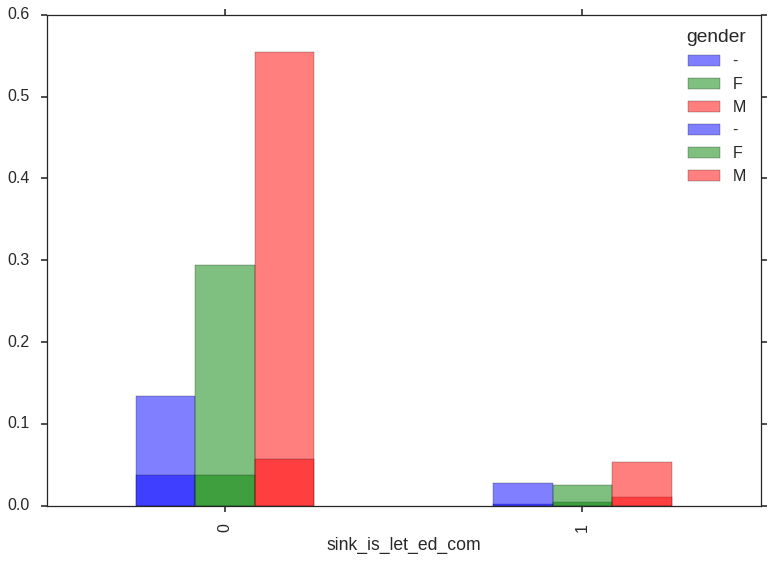

In [187]:
fig, ax = plt.subplots()
(t.unstack(1)["len"] * 1./ t["len"].sum()).plot(kind="bar", ax = ax, alpha=0.5)
t.unstack(1)["mean"].plot(kind="bar", ax = ax, alpha=0.5)

source_is_eng ['False', 'True']
source_is_journal ['False', 'True']
source_is_review ['False', 'True']
source_is_case_rep ['False', 'True']
source_is_let_ed_com ['False', 'True']
journal_same ['False', 'True']
affiliation_sim ['False', 'True']
sink_is_eng ['False', 'True']
sink_is_journal ['False', 'True']
sink_is_review ['False', 'True']
sink_is_case_rep ['False', 'True']
sink_is_let_ed_com ['False', 'True']


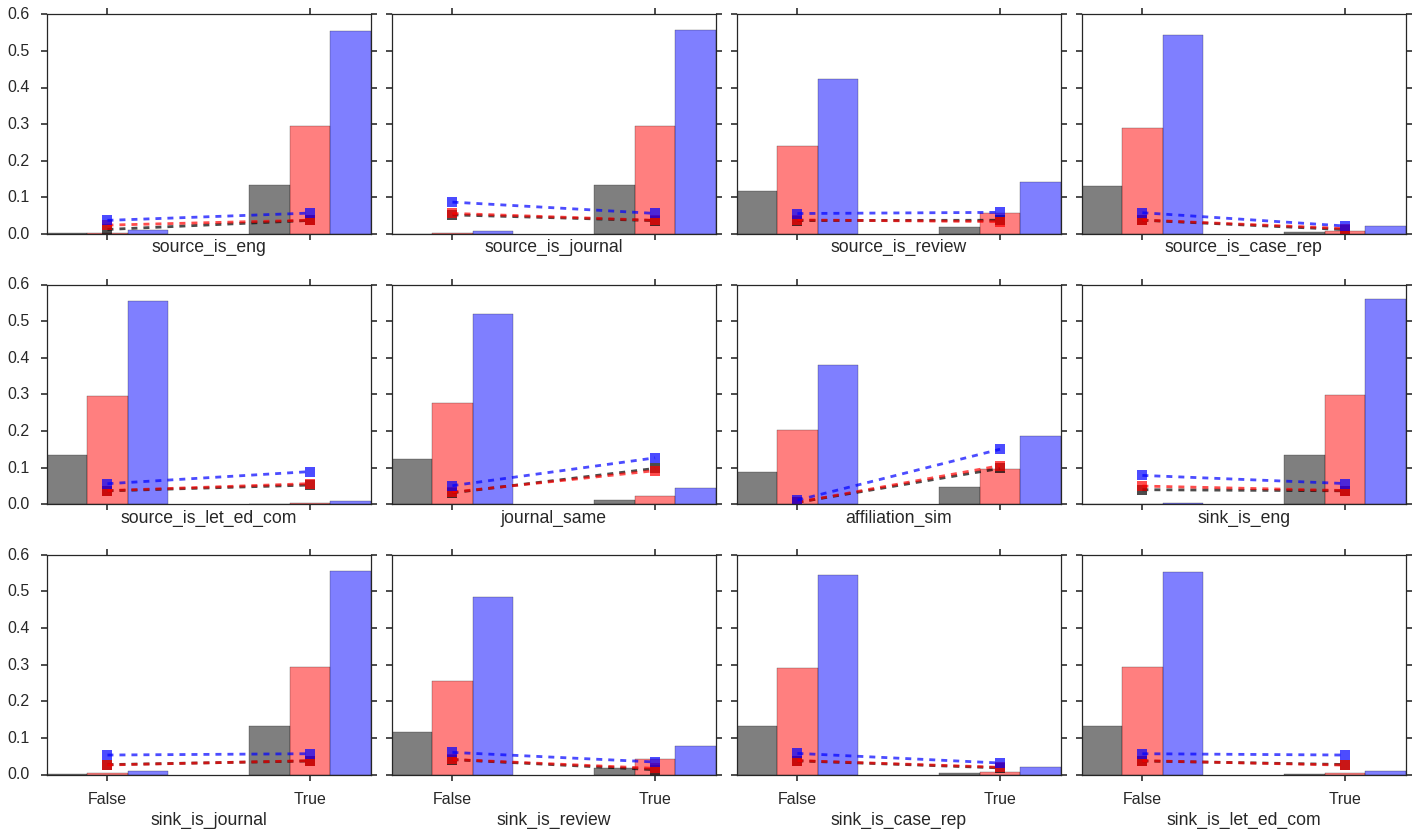

In [194]:
colnames = [u'source_is_eng', u'source_is_journal', u'source_is_review', u'source_is_case_rep',
       u'source_is_let_ed_com', u'journal_same', u'affiliation_sim', # Source features
            u'sink_is_eng', u'sink_is_journal', u'sink_is_review', u'sink_is_case_rep', u'sink_is_let_ed_com', # Sink features
           ]
width = 0.6
xticks = ["Unknown", "Female", "Male"]
genders = ["-", "F", "M"]
colors = ["k", "r", "b"]
xticks = ["False", "True"]
nrows, ncols = len(colnames)/4, 4
fig, ax = plt.subplots(nrows, ncols, figsize=(ncols*5,nrows*4), sharex=True, sharey=True)
for i, (axi, c) in enumerate(zip(ax.flatten(), colnames)):
    t = df[[c, "gender","is_self_cite"]].groupby([c, "gender"])["is_self_cite"].agg([np.mean, len])
    t_sum = t["len"].sum()
    ind = np.arange(2)
    print c, xticks
    t = t.unstack(1)
    for j, g in enumerate(genders):
        if g in t["len"]:
            axi.bar((ind - width/2.) + j*(width/3.),
                    t["len"][g] * 1. / t_sum, width/3., facecolor=colors[j], alpha=0.5)
            #axi2 = axi.twinx()
            axi.plot(ind, t["mean"][g], color=colors[j], marker="s", markersize=10, linestyle="--", alpha=0.7)
    axi.set_xticks(ind)
    axi.set_xticklabels(xticks)
    axi.set_xlabel(c)
    """
    for tl in axi2.get_yticklabels():
        tl.set_color('r')"""
fig.tight_layout()

In [205]:
t = df[["auth_prev_papers", "gender","is_self_cite"]].pivot_table(
    index=pd.cut(df["auth_prev_papers"],
                 bins=range(-1,10) + range(10,100,10) + range(100,601,500)),
    columns="gender", values="is_self_cite", aggfunc=[np.mean, len])
t

mean                          len                  
gender                   -         F         M        -        F        M
auth_prev_papers                                                         
(-1, 0]           0.002976  0.002772  0.003578  1146845  1966829  2264856
(0, 1]            0.016321  0.013917  0.015862   718148  1418029  1784488
(1, 2]            0.023992  0.021311  0.023831   530679  1118270  1463468
(2, 3]            0.029480  0.026615  0.029383   405353   891071  1236997
(3, 4]            0.034193  0.030435  0.032620   326733   717206  1053884
(4, 5]            0.037390  0.033323  0.036194   260443   593187   925059
(5, 6]            0.039924  0.035316  0.037897   213530   505488   798897
(6, 7]            0.042983  0.037737  0.040546   178677   429446   711963
(7, 8]            0.044484  0.040797  0.042870   159698   354659   630608
(8, 9]            0.046717  0.041876  0.045525   138086   332696   577992
(9, 10]           0.049834  0.043246  0.047867   115444   280002   513022
(10, 20]          0.056604  0.052321  0.055849   648094  1672166  3412288
(20, 30]          0.069596  0.068072  0.071050   274396   752496  1886190
(30, 40]          0.082965  0.081764  0.080749   159887   430558  1234994
(40, 50]          0.092084  0.090420  0.089831    88973   260705   890571
(50, 60]          0.097642  0.095664  0.097636    62647   180517   668576
(60, 70]          0.107398  0.102512  0.106869    43334   124639   538071
(70, 80]          0.105514  0.110678  0.114343    29200    87416   420043
(80, 90]          0.119006  0.118432  0.118280    25234    67161   341020
(90, 100]         0.123614  0.123457  0.119653    19302    50301   281630
(100, 600]        0.149410  0.142150  0.145726   105602   210707  1852149

In [206]:
t["len"].sum().sum()

41580620

sink_is_let_ed_com [(-1, 0], (0, 1], (1, 2], (2, 3], (3, 4], ..., (60, 70], (70, 80], (80, 90], (90, 100], (100, 600]]
Length: 21
Categories (21, object): [(-1, 0] < (0, 1] < (1, 2] < (2, 3] ... (70, 80] < (80, 90] < (90, 100] < (100, 600]]


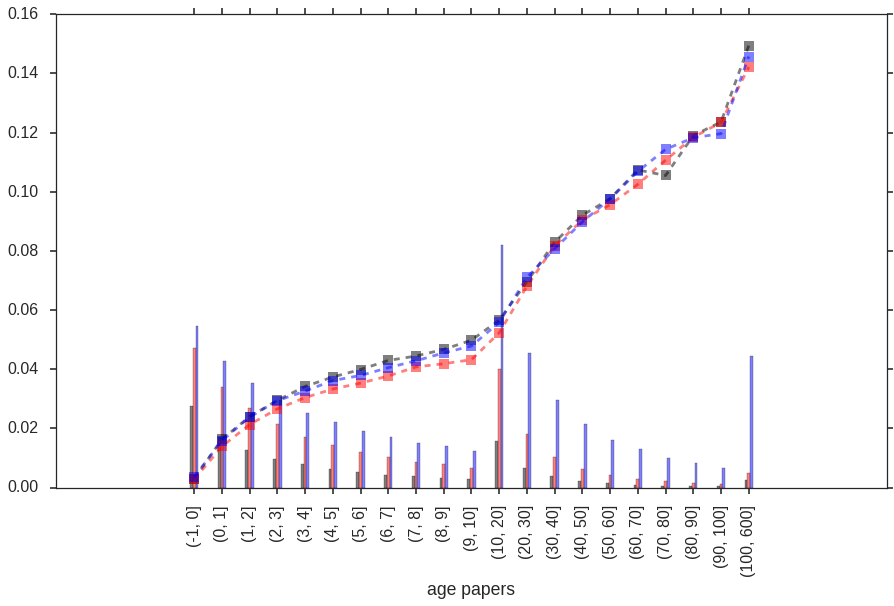

In [207]:
fig, axi = plt.subplots()
t_sum = t["len"].sum().sum()
ind = np.arange(t.shape[0])
xticks = t.index.values
print c, xticks
width = 0.3
for j, g in enumerate(genders):
    if g in t["len"]:
        axi.bar((ind - width/2.) + j*(width/3.),
                t["len"][g] * 1. / t_sum, width/3., facecolor=colors[j], alpha=0.5)
        #axi2 = axi.twinx()
        axi.plot(ind, t["mean"][g], color=colors[j], marker="s", markersize=10, linestyle="--", alpha=0.5)
axi.set_xticks(ind)
axi.set_xticklabels(xticks, rotation='vertical')
axi.set_xlabel("age papers")
fig.tight_layout()

In [208]:
t = df[["sink_prev_ncites", "gender","is_self_cite"]].pivot_table(
    index=pd.cut(df["sink_prev_ncites"],
                 bins=range(-1,10) + range(10,100,10) + range(100,10000,500)),
    columns="gender", values="is_self_cite", aggfunc=[np.mean, len])
t

mean                         len                  
gender                   -         F         M       -        F        M
sink_prev_ncites                                                        
(-1, 0]           0.150066  0.135860  0.167129  398206   824035  1698763
(0, 1]            0.096612  0.094503  0.121307  234423   508447  1015854
(1, 2]            0.078117  0.078259  0.105290  195539   424631   841767
(2, 3]            0.068086  0.069670  0.094093  172194   378986   743318
(3, 4]            0.059975  0.062530  0.087208  156416   345068   672618
(4, 5]            0.053674  0.057896  0.082271  143403   320041   618795
(5, 6]            0.051161  0.053413  0.076723  132993   296518   570180
(6, 7]            0.046094  0.049045  0.072541  124594   277482   530253
(7, 8]            0.043005  0.046463  0.069169  116011   261110   497662
(8, 9]            0.041483  0.043858  0.066146  110022   247023   468799
(9, 10]           0.038147  0.041625  0.063204  102813   233585   441710
(10, 20]          0.030789  0.034125  0.054578  781523  1773780  3341473
(20, 30]          0.022008  0.025355  0.042704  510670  1158705  2166098
(30, 40]          0.017350  0.020065  0.035947  362015   819439  1524323
(40, 50]          0.014166  0.017158  0.031116  271079   612359  1134795
(50, 60]          0.012069  0.014712  0.027888  210958   473210   876960
(60, 70]          0.010718  0.012919  0.024811  168227   377578   702751
(70, 80]          0.008846  0.011474  0.023257  139492   309563   572505
(80, 90]          0.008410  0.010574  0.021769  114621   253826   470941
(90, 100]         0.007652  0.010043  0.020548   95788   212490   391232
(100, 600]        0.004417  0.005663  0.013387  912225  1944734  3568297
(600, 1100]       0.001234  0.001356  0.004891   97235   190241   340653
(1100, 1600]      0.001031  0.000507  0.002835   34918    67062   116401
(1600, 2100]      0.000631  0.000488  0.002592   17419    32755    56333
(2100, 2600]      0.000231  0.000258  0.001192    8670    15488    26850
(2600, 3100]      0.000967  0.000490  0.002369    5173    10206    18154
(3100, 3600]      0.000586  0.000155  0.000967    3412     6467    11378
(3600, 4100]      0.000320  0.000326  0.000378    3125     6132    10579
(4100, 4600]      0.000000  0.000000  0.000666    2252     4510     7511
(4600, 5100]      0.000000  0.000000  0.000000    1387     2951     4584
(5100, 5600]      0.000000  0.000264  0.000480    1817     3795     6255
(5600, 6100]      0.000842  0.000000  0.000478    1187     2584     4182
(6100, 6600]      0.000000  0.000000  0.000000    1580     3224     5768
(6600, 7100]      0.000000  0.000000  0.000000     878     1818     3007
(7100, 7600]      0.000000  0.000356  0.000433    1286     2809     4617
(7600, 8100]      0.000000  0.000000  0.000357     793     1742     2800
(8100, 8600]      0.000000  0.000474  0.000000    1050     2108     3500
(8600, 9100]      0.000000  0.000000  0.000798     598      912     1253
(9100, 9600]      0.000000  0.000000  0.000000     721     1384     2212

sink_is_let_ed_com [(-1, 0], (0, 1], (1, 2], (2, 3], (3, 4], ..., (7100, 7600], (7600, 8100], (8100, 8600], (8600, 9100], (9100, 9600]]
Length: 39
Categories (39, object): [(-1, 0] < (0, 1] < (1, 2] < (2, 3] ... (7600, 8100] < (8100, 8600] < (8600, 9100] < (9100, 9600]]


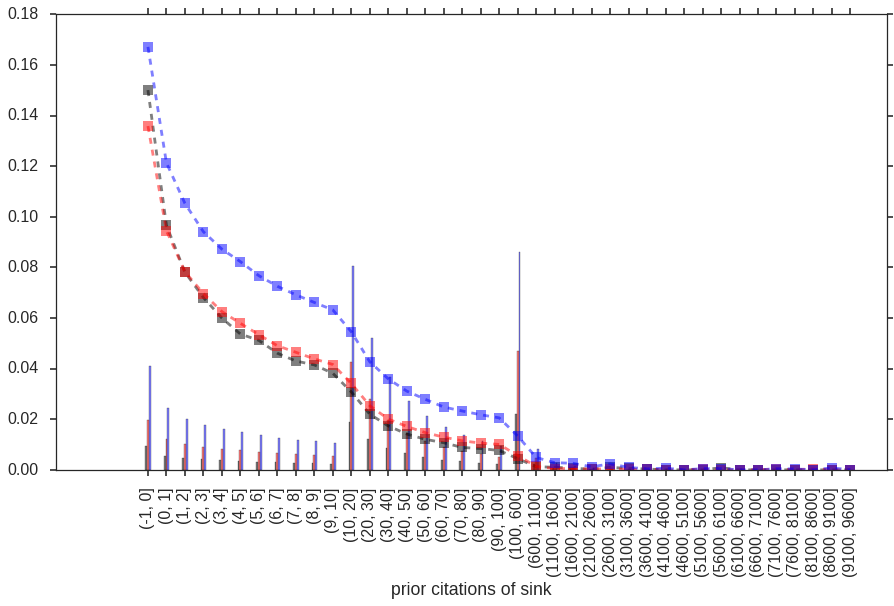

In [209]:
fig, axi = plt.subplots()
t_sum = t["len"].sum().sum()
ind = np.arange(t.shape[0])
xticks = t.index.values
print c, xticks
width = 0.3
for j, g in enumerate(genders):
    if g in t["len"]:
        axi.bar((ind - width/2.) + j*(width/3.),
                t["len"][g] * 1. / t_sum, width/3., facecolor=colors[j], alpha=0.5)
        #axi2 = axi.twinx()
        axi.plot(ind, t["mean"][g], color=colors[j], marker="s", markersize=10, linestyle="--", alpha=0.5)
axi.set_xticks(ind)
axi.set_xticklabels(xticks, rotation='vertical')
axi.set_xlabel("prior citations of sink")
fig.tight_layout()

In [217]:
t = df[["source_n_authors", "gender","is_self_cite"]].pivot_table(
    index=pd.cut(df["source_n_authors"],
                 bins=range(2,10) + range(10,50,10)),
    columns="gender", values="is_self_cite", aggfunc=[np.mean, len])
t

mean                         len                  
gender                   -         F         M       -        F        M
source_n_authors                                                        
(2, 3]            0.036432  0.036410  0.057884  969578  2098026  4006124
(3, 4]            0.035839  0.037194  0.055545  930555  2000529  3578134
(4, 5]            0.035600  0.036907  0.054297  810791  1738464  3022786
(5, 6]            0.034794  0.037249  0.052956  668256  1417394  2523949
(6, 7]            0.035152  0.037955  0.053462  464815  1006027  1810129
(7, 8]            0.035544  0.038970  0.053797  312208   704909  1311166
(8, 9]            0.036557  0.039363  0.055368  211727   464341   863159
(9, 10]           0.039325  0.039265  0.056129  144616   307398   619680
(10, 20]          0.041380  0.042442  0.061594  243717   535573  1162875
(20, 30]          0.051354  0.042738  0.071728    7536    21152    49311
(30, 40]          0.064414  0.038791  0.079545     947     4666     8712

sink_is_let_ed_com [(2, 3], (3, 4], (4, 5], (5, 6], (6, 7], ..., (8, 9], (9, 10], (10, 20], (20, 30], (30, 40]]
Length: 11
Categories (11, object): [(2, 3] < (3, 4] < (4, 5] < (5, 6] ... (9, 10] < (10, 20] < (20, 30] < (30, 40]]


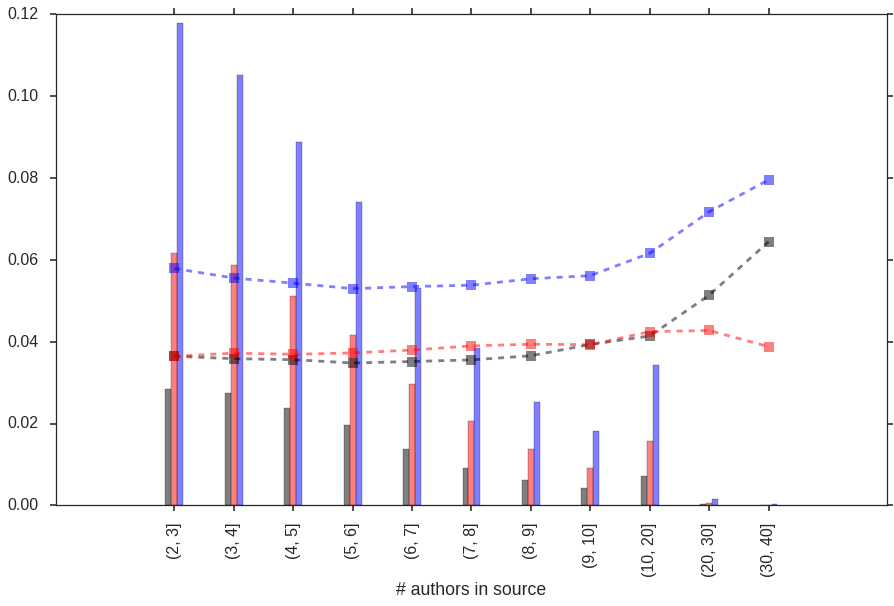

In [218]:
fig, axi = plt.subplots()
t_sum = t["len"].sum().sum()
ind = np.arange(t.shape[0])
xticks = t.index.values
print c, xticks
width = 0.3
for j, g in enumerate(genders):
    if g in t["len"]:
        axi.bar((ind - width/2.) + j*(width/3.),
                t["len"][g] * 1. / t_sum, width/3., facecolor=colors[j], alpha=0.5)
        #axi2 = axi.twinx()
        axi.plot(ind, t["mean"][g], color=colors[j], marker="s", markersize=10, linestyle="--", alpha=0.5)
axi.set_xticks(ind)
axi.set_xticklabels(xticks, rotation='vertical')
axi.set_xlabel("# authors in source")
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots()

(t.unstack(1)["len"] * 1./ t["len"].sum()).plot(kind="bar", ax = ax, alpha=0.5)
t.unstack(1)["mean"].plot(kind="bar", ax = ax, alpha=0.5)

In [220]:
t = df[["source_n_mesh", "gender","is_self_cite"]].fillna(-1).pivot_table(
    index=pd.cut(df["source_n_mesh"],
                 bins=range(-2,10) + range(10,70,10)),
    columns="gender", values="is_self_cite", aggfunc=[np.mean, len])
t

mean                          len                   
gender                -         F         M        -        F         M
source_n_mesh                                                          
(-2, -1]            NaN       NaN       NaN      NaN      NaN       NaN
(-1, 0]        0.072958  0.055062  0.093597   128608   140732    428892
(0, 1]         0.065026  0.058862  0.086861      569     1546      1370
(1, 2]         0.061860  0.031442  0.067089     4300    10718     25891
(2, 3]         0.038022  0.032673  0.064797    17779    41135    110222
(3, 4]         0.042688  0.036233  0.061885    50530   118068    319562
(4, 5]         0.040463  0.037415  0.063650   105925   240304    608797
(5, 6]         0.038745  0.037347  0.061999   174243   406242    980974
(6, 7]         0.037062  0.037812  0.061360   248045   556885   1308599
(7, 8]         0.039357  0.038410  0.060681   305032   701644   1567699
(8, 9]         0.038062  0.038926  0.058903   359622   824929   1749994
(9, 10]        0.038276  0.039342  0.058710   393223   913860   1845430
(10, 20]       0.035667  0.037725  0.054772  3241581  7292972  12760304
(20, 30]       0.032995  0.034585  0.047554   566632  1108241   1691685
(30, 40]       0.029081  0.032565  0.038416    52440    81899    116723
(40, 50]       0.023342  0.027621  0.025390     3513     4598      5829
(50, 60]       0.013514  0.018868  0.063830      148      106       329

sink_is_let_ed_com ['(-2, -1]' '(-1, 0]' '(0, 1]' '(1, 2]' '(2, 3]' '(3, 4]' '(4, 5]' '(5, 6]'
 '(6, 7]' '(7, 8]' '(8, 9]' '(9, 10]' '(10, 20]' '(20, 30]' '(30, 40]'
 '(40, 50]' '(50, 60]']


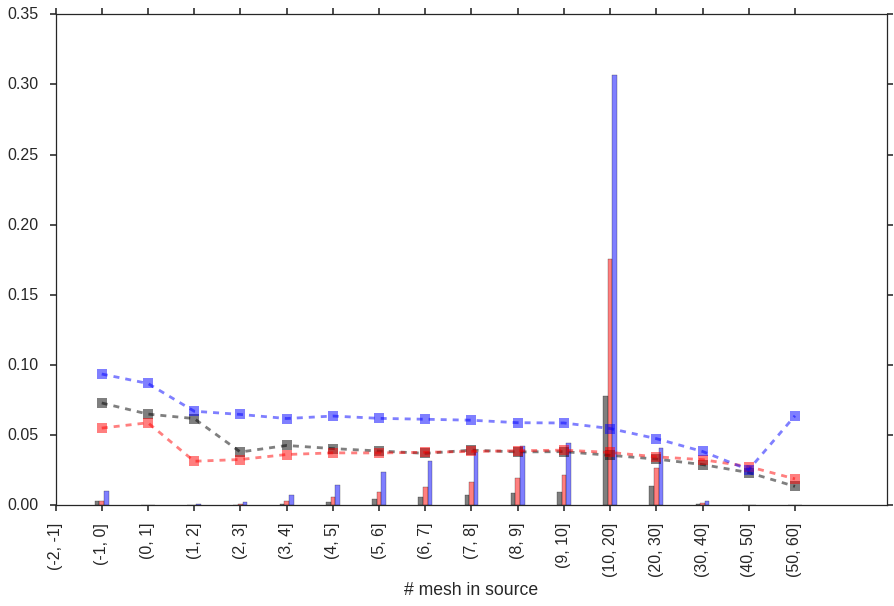

In [221]:
fig, axi = plt.subplots()
t_sum = t["len"].sum().sum()
ind = np.arange(t.shape[0])
xticks = t.index.values
print c, xticks
width = 0.3
for j, g in enumerate(genders):
    if g in t["len"]:
        axi.bar((ind - width/2.) + j*(width/3.),
                t["len"][g] * 1. / t_sum, width/3., facecolor=colors[j], alpha=0.5)
        #axi2 = axi.twinx()
        axi.plot(ind, t["mean"][g], color=colors[j], marker="s", markersize=10, linestyle="--", alpha=0.5)
axi.set_xticks(ind)
axi.set_xticklabels(xticks, rotation='vertical')
axi.set_xlabel("# mesh in source")
fig.tight_layout()

## Analysis of variance

In [128]:
from scipy import stats

In [129]:
stats.f_oneway(*[
        df[df.gender == "M"].is_self_cite,
        df[df.gender == "F"].is_self_cite,
        df[df.gender == "-"].is_self_cite,
    ])

F_onewayResult(statistic=41709.144906565336, pvalue=0.0)

In [222]:
formula = ("is_self_cite ~ C(gender, levels=genders)")
y,X = patsy.dmatrices(formula, data=df, return_type="dataframe")

In [223]:
model = Logit(y,X)

In [224]:
model.fit_regularized?

In [225]:
res = model.fit_regularized(alpha=0.5)
res.summary2()

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.193089887284
            Iterations: 26
            Function evaluations: 26
            Gradient evaluations: 26
QC check did not pass for 2 out of 3 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
Could not trim params automatically due to failed QC check.  Trimming using trim_mode == 'size' will still work.


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
=================================================================================
Model:                   Logit                Pseudo R-squared:     0.005        
Dependent Variable:      is_self_cite         AIC:                  16072172.4045
Date:                    2016-05-14 01:00     BIC:                  16072219.0366
No. Observations:        41618369             Log-Likelihood:       -8.0361e+06  
Df Model:                2                    LL-Null:              -8.0787e+06  
Df Residuals:            41618366             LLR p-value:          0.0000       
Converged:               True                 Scale:                1.0000       
No. Iterations:          26.0000                                                 
---------------------------------------------------------------------------------
                                Coef.  Std.Err.     z      P>|z|   [0.025  0.975]
---------------------------------------------------------------------------------
Intercept                      -3.2577   0.0022 -1462.9173 0.0000 -3.2621 -3.2534
C(gender, levels=genders)[T.F]  0.0206   0.0027     7.6973 0.0000  0.0154  0.0259
C(gender, levels=genders)[T.M]  0.4506   0.0024   187.8953 0.0000  0.4459  0.4553
=================================================================================

"""

In [226]:
formula = ("is_self_cite ~ journal_same + mesh_sim"
           " + lang_sim + affiliation_sim + pubtype_sim + gender_sim + eth_sim"
          " + np.log10(auth_prev_papers + 1) + np.log10(sink_prev_ncites + 1)"
           " + np.log10(source_ncites) + np.log10(source_n_authors) + np.log10(source_n_mesh + 1)"
          " + C(gender, levels=genders)")
y,X = patsy.dmatrices(formula, data=df, return_type="dataframe")
model = Logit(y,X)
res = model.fit_regularized(alpha=0.5)
res.summary2()

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.106231768803
            Iterations: 128
            Function evaluations: 128
            Gradient evaluations: 128
QC check did not pass for 15 out of 15 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
Could not trim params automatically due to failed QC check.  Trimming using trim_mode == 'size' will still work.


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Logit
===================================================================================
Model:                    Logit                 Pseudo R-squared:      0.453       
Dependent Variable:       is_self_cite          AIC:                   8842272.0018
Date:                     2016-05-14 01:50      BIC:                   8842505.1626
No. Observations:         41618369              Log-Likelihood:        -4.4211e+06 
Df Model:                 14                    LL-Null:               -8.0787e+06 
Df Residuals:             41618354              LLR p-value:           0.0000      
Converged:                True                  Scale:                 1.0000      
No. Iterations:           128.0000                                                 
-----------------------------------------------------------------------------------
                                Coef.   Std.Err.     z     P>|z|   [0.025   0.975] 
-----------------------------------------------------------------------------------
Intercept                      -13.8718   0.0145 -957.6463 0.0000 -13.9002 -13.8434
C(gender, levels=genders)[T.F]  -0.1300   0.0033  -39.7490 0.0000  -0.1364  -0.1235
C(gender, levels=genders)[T.M]  -0.2741   0.0030  -90.4990 0.0000  -0.2800  -0.2681
journal_same                     0.2838   0.0025  111.6936 0.0000   0.2788   0.2888
mesh_sim                         2.0173   0.0074  273.9119 0.0000   2.0029   2.0318
lang_sim                         0.3666   0.0082   44.6876 0.0000   0.3505   0.3827
affiliation_sim                  1.5476   0.0025  619.1594 0.0000   1.5427   1.5525
pubtype_sim                      1.1660   0.0032  364.3548 0.0000   1.1598   1.1723
gender_sim                       3.1124   0.0067  466.5306 0.0000   3.0993   3.1255
eth_sim                          7.9645   0.0097  819.0346 0.0000   7.9455   7.9836
np.log10(auth_prev_papers + 1)   1.7230   0.0016 1054.9004 0.0000   1.7198   1.7262
np.log10(sink_prev_ncites + 1)  -1.1418   0.0014 -800.0890 0.0000  -1.1446  -1.1390
np.log10(source_ncites)         -0.3926   0.0026 -151.6142 0.0000  -0.3977  -0.3875
np.log10(source_n_authors)      -0.9344   0.0039 -239.2682 0.0000  -0.9420  -0.9267
np.log10(source_n_mesh + 1)     -0.2926   0.0042  -70.3140 0.0000  -0.3008  -0.2845
===================================================================================

"""

In [227]:
formula = ("is_self_cite ~ journal_same + mesh_sim"
           " + lang_sim + pubtype_sim"
          " + np.log10(auth_prev_papers + 1) + np.log10(sink_prev_ncites + 1)"
           " + np.log10(source_ncites) + np.log10(source_n_authors) + np.log10(source_n_mesh + 1)"
          " + C(gender, levels=genders)")
y,X = patsy.dmatrices(formula, data=df, return_type="dataframe")
model = Logit(y,X)
res = model.fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.153363
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
================================================================================
Model:                  Logit                Pseudo R-squared:     0.210        
Dependent Variable:     is_self_cite         AIC:                  12765459.2188
Date:                   2016-05-14 02:07     BIC:                  12765645.7474
No. Observations:       41618369             Log-Likelihood:       -6.3827e+06  
Df Model:               11                   LL-Null:              -8.0787e+06  
Df Residuals:           41618357             LLR p-value:          0.0000       
Converged:              1.0000               Scale:                1.0000       
No. Iterations:         8.0000                                                  
--------------------------------------------------------------------------------
                                Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------
Intercept                      -4.6109   0.0088 -526.1361 0.0000 -4.6281 -4.5938
C(gender, levels=genders)[T.F] -0.0124   0.0028   -4.3500 0.0000 -0.0180 -0.0068
C(gender, levels=genders)[T.M] -0.0312   0.0026  -11.9875 0.0000 -0.0364 -0.0261
journal_same                    0.5948   0.0022  272.3252 0.0000  0.5905  0.5991
mesh_sim                        2.5405   0.0061  415.1693 0.0000  2.5285  2.5525
lang_sim                        0.7296   0.0069  105.7606 0.0000  0.7161  0.7431
pubtype_sim                     1.5959   0.0027  585.0413 0.0000  1.5906  1.6012
np.log10(auth_prev_papers + 1)  1.4962   0.0014 1093.1237 0.0000  1.4935  1.4989
np.log10(sink_prev_ncites + 1) -1.1749   0.0012 -948.3722 0.0000 -1.1773 -1.1724
np.log10(source_ncites)        -0.4908   0.0022 -223.3934 0.0000 -0.4951 -0.4865
np.log10(source_n_authors)     -0.2632   0.0034  -77.6903 0.0000 -0.2698 -0.2566
np.log10(source_n_mesh + 1)    -0.0489   0.0037  -13.3962 0.0000 -0.0561 -0.0418
================================================================================

"""

In [228]:
X.head()

Intercept  C(gender, levels=genders)[T.F]  C(gender, levels=genders)[T.M]  \
0          1                               0                               1   
1          1                               0                               1   
2          1                               0                               1   
3          1                               0                               1   
4          1                               0                               1   

   journal_same  mesh_sim  lang_sim  pubtype_sim  \
0             0  0.266667         1     0.500000   
1             0  0.272727         1     1.000000   
2             0  0.052632         1     0.666667   
3             0  0.090909         1     0.200000   
4             0  0.071429         1     0.500000   

   np.log10(auth_prev_papers + 1)  np.log10(sink_prev_ncites + 1)  \
0                        1.322219                        0.301030   
1                        1.322219                        0.477121   
2                        0.903090                        0.954243   
3                        0.903090                        1.255273   
4                        0.903090                        1.361728   

   np.log10(source_ncites)  np.log10(source_n_authors)  \
0                  0.30103                     0.60206   
1                  0.30103                     0.60206   
2                  2.00000                     0.69897   
3                  2.00000                     0.69897   
4                  2.00000                     0.69897   

   np.log10(source_n_mesh + 1)  
0                     1.079181  
1                     1.079181  
2                     1.255273  
3                     1.255273  
4                     1.255273

In [229]:
res.llf

-6382717.6093822196

In [230]:
res.llr

3391964.2028024457

In [231]:
res.llnull

-8078699.7107834425